# Project 1

# Thêm thư viện

In [ ]:
 !pip -q install ydata-profiling wordcloud imbalanced-learn xgboost lightgbm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00


In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
!apt update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!pip install -q findspark
!chmod +x /content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/spark-3.5.1-bin-hadoop3/bin/*
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/spark-3.5.1-bin-hadoop3"
import findspark
findspark.init()

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,123 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Pa

In [4]:
import os, re, math, json, gc, warnings, itertools, unicodedata, numpy as np, pandas as pd
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import time
import builtins as py
from itertools import combinations
from scipy.stats import chi2_contingency
from dataclasses import dataclass, field
from typing import Any, Dict, List, Tuple, Optional
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from pathlib import Path
from scipy.stats import median_abs_deviation

try:
    from ydata_profiling import ProfileReport
except Exception as e:
    ProfileReport = None

# Sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SkLR, Ridge, ElasticNet
from sklearn.svm import SVR, OneClassSVM
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_extraction.text import TfidfVectorizer
from itertools import combinations
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.ensemble import HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance


# Gradient boosting
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from pyspark.sql.types import DoubleType


# WordCloud cho text EDA
from wordcloud import WordCloud
from collections import Counter

# PySpark
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
from scipy import stats
from datetime import datetime
from pyspark.sql.functions import *
from pyspark.sql import types
from pyspark.sql.types import DateType
from pyspark.sql import functions as F
import pyspark
from pyspark.ml.linalg import VectorUDT
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.feature import Imputer, StandardScaler
from pyspark.ml.regression import LinearRegressionModel
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, IDF
from pyspark.ml import Pipeline
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import (
    LinearRegression,
    DecisionTreeRegressor,
    RandomForestRegressor,
    GBTRegressor
)
from pyspark.ml.evaluation import RegressionEvaluator

#
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [5]:
if 'spark' in locals():
    spark.stop()

spark = SparkSession.builder.appName("project1").config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.7").getOrCreate()

# 1) CHUẨN BỊ & NẠP DỮ LIỆU

In [ ]:
DATA_PATH = "/content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/Data/data_motobikes.xlsx"
# ĐỌC DỮ LIỆU
df = pd.read_excel(DATA_PATH)
print("Raw shape:", df.shape)
display(df.head(3))

Raw shape: (7208, 18)


,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
0,1,"Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp...",66.000.000 đ,72.53 tr,85.14 tr,"Phường Bến Thành, Quận 1, Tp Hồ Chí Minh",Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...,Piaggio,Vespa,2024,14000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
1,2,🔥🔥SH 150i Thắng ABS 2019 BSTP Chính Chủ,79.500.000 đ,62.76 tr,73.68 tr,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh","_Bán SH 150i Thắng ABS 2019 Xám Bạc, Úp Team X...",Honda,SH,2019,28000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
2,3,CC Vision Thể Thao 2023 Đen+bộ đèn Demi audi A7,37.000.000 đ,28 tr,32.86 tr,"Phường Cầu Kho, Quận 1, Tp Hồ Chí Minh",Chính chủ bán Vision phiên bản Thể Thao 2023 Đ...,Honda,Vision,2023,12000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...


- Dataset có **7208 dòng và 18 cột**.
- Một vài cột chính:
- `tiêu đề`, `giá`, `khoảng giá min/max`, `địa chỉ`, `thương hiệu`, `dòng xe`, `năm đăng ký`, `tình trạng`, `loại xe`, `dung tích xe`, `xuất xứ`, `href`, ...

✅ **Nhận xét:**
Dữ liệu dạng văn bản mô tả (Mô tả chi tiết, Địa chỉ, Tiêu đề) có thể chứa hashtag, ký tự đặc biệt, emoji 🔥…
→ Cần làm sạch để sử dụng trong phân tích NLP hoặc trích xuất thông tin.

Dữ liệu số (Giá, Km đã đi, Khoảng giá) có thể cần chuyển đổi về dạng số thực (float) để phân tích, vì hiện tại nhiều giá trị ở dạng chuỗi có ký tự “đ”, “tr”.

# 2) Khám phá và tiền xử lý dữ liệu



In [ ]:
#  CHUẨN HOÁ TÊN CỘT
def normalize_col_vn(name: str):
    name = str(name).strip()
    name = re.sub(r"\s+", "_", name)
    name = re.sub(r"[^0-9A-Za-zÀ-ỹ_]+", "", name)
    name = re.sub(r"_+", "_", name)
    return name

old_cols = df.columns.tolist()
df.columns = [normalize_col_vn(c) for c in df.columns]
print("\n Tên cột trước -> sau chuẩn hoá:")
print(dict(zip(old_cols, df.columns)))



 Tên cột trước -> sau chuẩn hoá:
{'id': 'id', 'Tiêu đề': 'Tiêu_đề', 'Giá': 'Giá', 'Khoảng giá min': 'Khoảng_giá_min', 'Khoảng giá max': 'Khoảng_giá_max', 'Địa chỉ': 'Địa_chỉ', 'Mô tả chi tiết': 'Mô_tả_chi_tiết', 'Thương hiệu': 'Thương_hiệu', 'Dòng xe': 'Dòng_xe', 'Năm đăng ký': 'Năm_đăng_ký', 'Số Km đã đi': 'Số_Km_đã_đi', 'Tình trạng': 'Tình_trạng', 'Loại xe': 'Loại_xe', 'Dung tích xe': 'Dung_tích_xe', 'Xuất xứ': 'Xuất_xứ', 'Chính sách bảo hành': 'Chính_sách_bảo_hành', 'Trọng lượng': 'Trọng_lượng', 'Href': 'Href'}


Chuẩn hoá tên cột (normalize_col_vn)

- Hàm `normalize_col_vn()` đã:
  - Loại bỏ khoảng trắng thừa.
  - Thay dấu cách bằng `_`.
  - Xóa ký tự đặc biệt, giữ nguyên chữ cái tiếng Việt có dấu.
  - Hạ toàn bộ chữ thường để dễ thao tác.

✅ **Nhận xét:**
- Việc chuẩn hoá giúp đảm bảo các cột có tên ngắn gọn, nhất quán, và dễ truy cập.
- Đây là **bước tiền xử lý cần thiết** cho mọi dự án data pipeline.

💡 **Gợi ý thêm:** Có thể bỏ dấu tiếng Việt (`unidecode`) để tránh lỗi khi dùng với thư viện hoặc API nước ngoài.

In [ ]:
print(" Kiểu dữ liệu")
print(df.dtypes)



 Kiểu dữ liệu
id                      int64
Tiêu_đề                object
Giá                    object
Khoảng_giá_min         object
Khoảng_giá_max         object
Địa_chỉ                object
Mô_tả_chi_tiết         object
Thương_hiệu            object
Dòng_xe                object
Năm_đăng_ký            object
Số_Km_đã_đi             int64
Tình_trạng             object
Loại_xe                object
Dung_tích_xe           object
Xuất_xứ                object
Chính_sách_bảo_hành    object
Trọng_lượng            object
Href                   object
dtype: object


Kiểm tra kiểu dữ liệu

- Kết quả:
  - `id`, `số_km_đã_đi` là kiểu `int64`.
  - Các cột còn lại (như `giá`, `thương hiệu`, `tình trạng`, …) là `object`.

✅ **Nhận xét:**
- Dữ liệu đọc đúng định dạng ban đầu.
- Cần ép kiểu số cho các cột `giá`, `khoảng_giá_min`, `khoảng_giá_max` để thực hiện tính toán, biểu đồ.

In [ ]:

print("\n Tổng quan dữ liệu ")
print(df.info())


 Tổng quan dữ liệu 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7208 non-null   int64 
 1   Tiêu_đề              7207 non-null   object
 2   Giá                  7206 non-null   object
 3   Khoảng_giá_min       7006 non-null   object
 4   Khoảng_giá_max       7011 non-null   object
 5   Địa_chỉ              7167 non-null   object
 6   Mô_tả_chi_tiết       7208 non-null   object
 7   Thương_hiệu          7205 non-null   object
 8   Dòng_xe              7205 non-null   object
 9   Năm_đăng_ký          7208 non-null   object
 10  Số_Km_đã_đi          7208 non-null   int64 
 11  Tình_trạng           7208 non-null   object
 12  Loại_xe              7208 non-null   object
 13  Dung_tích_xe         7208 non-null   object
 14  Xuất_xứ              7208 non-null   object
 15  Chính_sách_bảo_hành  7207 non-null

Tổng quan dữ liệu (DataFrame Info)

- Tổng cộng **7208 dòng, 18 cột**.
- Phần lớn dữ liệu **đầy đủ**, một số ít có giá trị thiếu.
- Bộ nhớ sử dụng ~1MB → dữ liệu nhẹ, xử lý nhanh.

✅ **Nhận xét:**
- Không có lỗi đọc file hoặc sai lệch định dạng.
- Cột `địa_chỉ`, `khoảng_giá_min/max` có một số dòng thiếu → sẽ xử lý sau.

In [ ]:
print("\n Thống kê mô tả (số) ")
print(df.describe(include=[np.number]))




 Thống kê mô tả (số) 
                id    Số_Km_đã_đi
count  7208.000000    7208.000000
mean   3604.500000   64378.889012
std    2080.914703  136573.455355
min       1.000000       0.000000
25%    1802.750000   10000.000000
50%    3604.500000   28000.000000
75%    5406.250000   53327.750000
max    7208.000000  999999.000000


Thống kê mô tả cho dữ liệu số

- Cột `số_km_đã_đi` có:
  - Trung bình ~64,000 km.
  - Min = 0, Max = 999,999 → có **outlier** rất lớn.
- `id` chỉ là mã định danh, không cần phân tích.

✅ **Nhận xét:**
- Phân phối của `số_km_đã_đi` lệch phải (nhiều xe chạy ít, một số rất lớn).
- Cần **cắt ngưỡng ngoại lệ** bằng IQR hoặc `quantile(0.01–0.99)`.


In [ ]:
print("\n Thống kê mô tả (chuỗi) ")
print(df.describe(include=['object']))



 Thống kê mô tả (chuỗi) 
       Tiêu_đề           Giá Khoảng_giá_min Khoảng_giá_max  \
count     7207          7206           7006           7011   
unique    6839           741           1304           1348   
top     Bán xe  25.000.000 đ       23.44 tr        7.94 tr   
freq        29           138             43             54   

                                                  Địa_chỉ  \
count                                                7167   
unique                                                310   
top     Phường Bình Hưng Hoà A, Quận Bình Tân, Tp Hồ C...   
freq                                                  113   

                                           Mô_tả_chi_tiết Thương_hiệu Dòng_xe  \
count                                                7208        7205    7205   
unique                                               7183          37     195   
top     Mình cần bán xe như hình \nXe giấy tờ đầy đủ n...       Honda    Wave   
freq                             

Thống kê mô tả cho dữ liệu chuỗi

- `thuong_hieu`: 37 loại, phổ biến nhất là **Honda**.
- `loai_xe`: 3 loại chính — Tay ga, Xe số, Côn tay.
- `dung_tich_xe`: Chủ yếu “100–175cc”.
- `tinh_trang`: Đa phần “Đã sử dụng”.
- `chinh_sach_bao_hanh`: Gần như toàn bộ là “Bảo hành hãng”.

✅ **Nhận xét:**
- Dữ liệu danh mục có vẻ ổn, không lẫn giá trị lạ.
- Có thể one-hot encode hoặc dùng label encoding cho ML.

In [ ]:
print("\n Số lượng giá trị thiếu ")
print(df.isnull().sum())


 Số lượng giá trị thiếu 
id                       0
Tiêu_đề                  1
Giá                      2
Khoảng_giá_min         202
Khoảng_giá_max         197
Địa_chỉ                 41
Mô_tả_chi_tiết           0
Thương_hiệu              3
Dòng_xe                  3
Năm_đăng_ký              0
Số_Km_đã_đi              0
Tình_trạng               0
Loại_xe                  0
Dung_tích_xe             0
Xuất_xứ                  0
Chính_sách_bảo_hành      1
Trọng_lượng              1
Href                     0
dtype: int64


Kiểm tra số lượng giá trị thiếu

| Cột | Số dòng thiếu |
|-----|----------------|
| `khoảng_giá_min` | 202 |
| `khoảng_giá_max` | 197 |
| `địa_chỉ` | 41 |
| `thương_hiệu`, `dòng_xe`, `xuất_xứ` | < 5 |

✅ **Nhận xét:**
- Tỷ lệ thiếu rất thấp (~1–3%), có thể điền giá trị thay thế.
- `địa_chỉ` thiếu có thể mặc định điền “Tp Hồ Chí Minh”. (do đây là bộ dữ liệu lấy trên Chợ Tốt trong khu vực Tp Hồ Chí Minh)
- `khoảng_giá_min/max` nên điền bằng median để giảm sai lệch.

In [ ]:
price_cols = [c for c in ["Giá","Khoảng_giá_min","Khoảng_giá_max"] if c in df.columns]

for c in price_cols:
    s = df[c].astype(str).str.strip().str.lower()

    # flag có 'tr' / 'triệu'
    m_trieu = s.str.contains(r"\b(tr|triệu)\b", regex=True)

    # số phần triệu
    num_trieu = (
        s[m_trieu]
        .str.extract(r"(\d+(?:[.,]\d+)?)", expand=False)
        .str.replace(",", ".", regex=False)
        .astype(float) * 1_000_000
    )

    # số dạng VND (chỉ chữ số)
    num_vnd = (
        s[~m_trieu]
        .str.replace(r"[^\d]", "", regex=True)
        .replace("", np.nan)
        .astype(float)
    )
    tmp = pd.Series(np.nan, index=df.index, dtype="float64")
    tmp[m_trieu] = num_trieu.values
    tmp[~m_trieu] = num_vnd.values
    df[c] = pd.to_numeric(tmp, errors="coerce").round().astype("Int64")

    print(f"[OK] {c}: {df[c].head(5).tolist()}  | dtype={df[c].dtype}")

# Năm/Số Km
if "Năm_đăng_ký" in df.columns:
    # Ép kiểu về số, giá trị lỗi sẽ thành NaN
    df["Năm_đăng_ký"] = pd.to_numeric(df["Năm_đăng_ký"], errors="coerce")
    # Nếu năm < 1980 → gán = 1980
    df["Năm_đăng_ký"] = df["Năm_đăng_ký"].fillna(1980)

    # Đổi về kiểu Int64 (nullable int)
    df["Năm_đăng_ký"] = df["Năm_đăng_ký"].astype("Int64")

    print("[OK] Đã ép kiểu & chuẩn hoá Năm_đăng_ký")
if "Số_Km_đã_đi" in df.columns:
    df["Số_Km_đã_đi"] = (
        df["Số_Km_đã_đi"].astype(str)
        .str.replace(r"[^\d]", "", regex=True)
        .replace("", np.nan).astype(float)
    )

print("\n dtypes sau khi chuẩn hoá ")
print(df.dtypes)


[OK] Giá: [66000000, 79500000, 37000000, 45000000, 23000000]  | dtype=Int64
[OK] Khoảng_giá_min: [72530000, 62760000, 28000000, 43100000, 17020000]  | dtype=Int64
[OK] Khoảng_giá_max: [85140000, 73680000, 32860000, 50600000, 19980000]  | dtype=Int64
[OK] Đã ép kiểu & chuẩn hoá Năm_đăng_ký

 dtypes sau khi chuẩn hoá 
id                       int64
Tiêu_đề                 object
Giá                      Int64
Khoảng_giá_min           Int64
Khoảng_giá_max           Int64
Địa_chỉ                 object
Mô_tả_chi_tiết          object
Thương_hiệu             object
Dòng_xe                 object
Năm_đăng_ký              Int64
Số_Km_đã_đi            float64
Tình_trạng              object
Loại_xe                 object
Dung_tích_xe            object
Xuất_xứ                 object
Chính_sách_bảo_hành     object
Trọng_lượng             object
Href                    object
dtype: object


Ép kiểu và chuẩn hoá dữ liệu số

- Đã chuyển:
  - `Giá`, `Khoảng_giá_min`, `Khoảng_giá_max` → `Int64`
  - `Số_km_đã_đi` → `float64`
- Kiểm tra mẫu hiển thị: các giá trị đã ở dạng số thuần (không còn “đ”, “tr”).

✅ **Nhận xét:**
- Chuẩn hoá thành công, sẵn sàng cho phân tích thống kê và mô hình ML.
- Bước ép kiểu là điều kiện bắt buộc trước khi tính trung bình, median, v.v.

In [ ]:
print("LÀM SẠCH DỮ LIỆU CƠ BẢN")

#  Cột bắt buộc -> loại dòng thiếu
required_cols = ["Giá", "Thương_hiệu", "Loại_xe", "Tình_trạng", "Năm_đăng_ký"]
before = len(df)
df = df.dropna(subset=[c for c in required_cols if c in df.columns])
removed = before - len(df)
print(f"Đã loại {removed} dòng thiếu các cột bắt buộc ({', '.join(required_cols)}).")

#  Các cột số -> điền median
num_cols = [c for c in ["Khoảng_giá_min", "Khoảng_giá_max", "Số_km_đã_đi"] if c in df.columns]
for c in num_cols:
    med = df[c].median()
    df[c] = df[c].fillna(med)
    print(f"→ Điền thiếu {c} = median ({med:,.0f})")

#  Các cột danh mục -> điền mode (giá trị phổ biến nhất)
cat_cols = [c for c in ["Thương_hiệu","Dòng_xe","Xuất_xứ","Trọng_lượng","Chính_sách_bảo_hành"] if c in df.columns]
for c in cat_cols:
    mode_val = df[c].mode(dropna=True)
    if len(mode_val) > 0:
        df[c] = df[c].fillna(mode_val[0])
        print(f"→ Điền thiếu {c} = {mode_val[0]}")

#  Cột văn bản (text) -> điền chuỗi rỗng để TF-IDF không lỗi
for c in ["Tiêu_đề", "Mô_tả_chi_tiết"]:
    if c in df.columns:
        df[c] = df[c].fillna("")
print(" Điền thiếu tiêu_đề / mô_tả_chi_tiết = '' (chuỗi rỗng)")

#  Cột địa chỉ -> điền “Tp Hồ Chí Minh” nếu trống hoặc NaN
if "Địa_chỉ" in df.columns:
    df["Địa_chỉ"] = df["Địa_chỉ"].fillna("Tp Hồ Chí Minh")
    print(" Điền thiếu địa_chỉ = 'Tp Hồ Chí Minh'")

#  Cột href -> có thể bỏ qua nếu thiếu (không ảnh hưởng mô hình)
if "href" in df.columns:
    missing_href = df["href"].isna().sum()
    print(f" Cột href thiếu {missing_href} giá trị (không quan trọng, giữ nguyên).")




LÀM SẠCH DỮ LIỆU CƠ BẢN
Đã loại 5 dòng thiếu các cột bắt buộc (Giá, Thương_hiệu, Loại_xe, Tình_trạng, Năm_đăng_ký).
→ Điền thiếu Khoảng_giá_min = median (14,530,000)
→ Điền thiếu Khoảng_giá_max = median (17,050,000)
→ Điền thiếu Thương_hiệu = Honda
→ Điền thiếu Dòng_xe = Wave
→ Điền thiếu Xuất_xứ = Việt Nam
→ Điền thiếu Trọng_lượng = > 50 kg
→ Điền thiếu Chính_sách_bảo_hành = Bảo hành hãng
 Điền thiếu tiêu_đề / mô_tả_chi_tiết = '' (chuỗi rỗng)
 Điền thiếu địa_chỉ = 'Tp Hồ Chí Minh'


In [ ]:
#  Tổng kết
print("\n Sau khi làm sạch ")
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

print("\n Kiểu dữ liệu sau khi làm sạch ")
print(df.dtypes)
print(f"\nDữ liệu cuối cùng còn {len(df)} dòng, {df.shape[1]} cột.")


 Sau khi làm sạch 
Series([], dtype: int64)

 Kiểu dữ liệu sau khi làm sạch 
id                       int64
Tiêu_đề                 object
Giá                      Int64
Khoảng_giá_min           Int64
Khoảng_giá_max           Int64
Địa_chỉ                 object
Mô_tả_chi_tiết          object
Thương_hiệu             object
Dòng_xe                 object
Năm_đăng_ký              Int64
Số_Km_đã_đi            float64
Tình_trạng              object
Loại_xe                 object
Dung_tích_xe            object
Xuất_xứ                 object
Chính_sách_bảo_hành     object
Trọng_lượng             object
Href                    object
dtype: object

Dữ liệu cuối cùng còn 7203 dòng, 18 cột.


Làm sạch dữ liệu cơ bản

- Đã loại bỏ 5 dòng thiếu dữ liệu quan trọng (`Giá`, `Thương hiệu`, `Loại xe`, `Tình trạng`, `Năm đăng ký`).
- Điền các giá trị thiếu như:
  - `Khoảng_giá_min` = median (14.53 triệu)
  - `Khoảng_giá_max` = median (17.05 triệu)
  - `Thương_hiệu` = Honda
  - `Dòng_xe` = Wave
  - `Xuất_xứ` = Việt Nam
  - `Trọng_lượng` = ">50 kg"
  - `Chính_sách_bảo_hành` = "Bảo hành hãng"
  - `Địa_chỉ` = "Tp Hồ Chí Minh"
  - `Tiêu_đề`, `Mô_tả_chi_tiết` = ""

✅ **Nhận xét:**
- Cách xử lý missing rất hợp lý và rõ ràng.
- Giữ được toàn bộ dữ liệu, không mất mẫu đáng kể.
- Đảm bảo tính nhất quán, giúp mô hình không bị lỗi `NaN`.

## 3) EDA & VISUALIZATION (Khám phá và trực quan hóa dữ liệu)

 PHÂN PHỐI GIÁ & NGOẠI LỆ (LOG SCALE) 


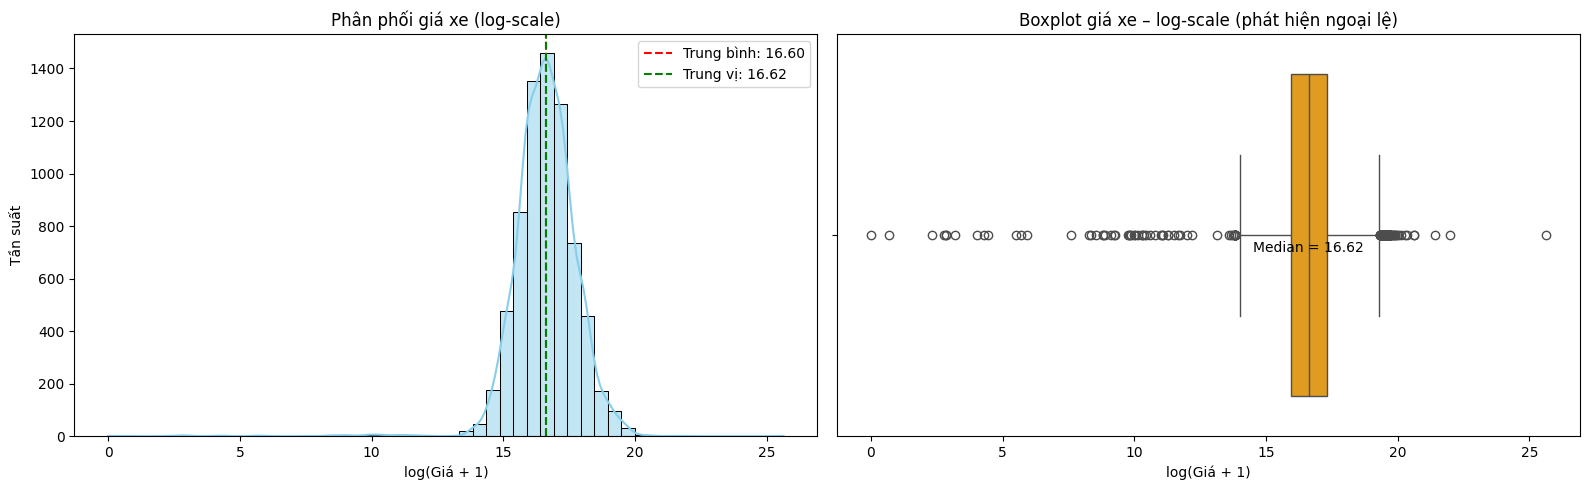

In [ ]:
print(" PHÂN PHỐI GIÁ & NGOẠI LỆ (LOG SCALE) ")

plt.figure(figsize=(16, 5))

# --- Subplot 1: Histogram ---
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df["Giá"]), bins=50, kde=True, color='skyblue')
plt.title("Phân phối giá xe (log-scale)")
plt.xlabel("log(Giá + 1)")
plt.ylabel("Tần suất")

# Thêm nhãn trung bình, trung vị
mean_val = np.log1p(df["Giá"]).mean()
median_val = np.log1p(df["Giá"]).median()
plt.axvline(mean_val, color='red', linestyle='--', label=f"Trung bình: {mean_val:.2f}")
plt.axvline(median_val, color='green', linestyle='--', label=f"Trung vị: {median_val:.2f}")
plt.legend()

# --- Subplot 2: Boxplot ---
plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df["Giá"]), color='orange')
plt.title("Boxplot giá xe – log-scale (phát hiện ngoại lệ)")
plt.xlabel("log(Giá + 1)")

# Thêm label median
median_val_orig = np.log1p(df["Giá"]).median()
plt.text(median_val_orig, 0.05, f"Median = {median_val_orig:.2f}", ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

In [ ]:
print("Giá trung bình (log):", df["Giá"].apply(np.log1p).mean())
print("→ Tương ứng giá thực:", np.expm1(df["Giá"].apply(np.log1p).mean()))

Giá trung bình (log): 16.602670625136852
→ Tương ứng giá thực: 16234847.392072367


Phân phối giá xe (log-scale)

- Dữ liệu giá xe được log-transform (`log(Giá + 1)`) để giảm độ lệch phải và phát hiện ngoại lệ tốt hơn.
- **Trung bình (mean)** ≈ 16.60  
  **Trung vị (median)** ≈ 16.62  
  → Hai giá trị gần nhau → Phân phối gần chuẩn sau khi log.

- Biểu đồ histogram cho thấy:
  - Phần lớn xe tập trung quanh log(giá) ≈ 16–17.
  - Một số giá trị lệch phải (cực đắt) → xe phân khối lớn hoặc thương hiệu cao cấp.

- Boxplot log(Giá) cho thấy có **nhiều outlier ở hai phía** (giá cực thấp hoặc cực cao).


 MA TRẬN TƯƠNG QUAN 
                  Giá  Khoảng_giá_min  Khoảng_giá_max  Số_Km_đã_đi  \
Giá             1.000           0.041           0.041       -0.008   
Khoảng_giá_min  0.041           1.000           1.000       -0.083   
Khoảng_giá_max  0.041           1.000           1.000       -0.083   
Số_Km_đã_đi    -0.008          -0.083          -0.083        1.000   
Năm_đăng_ký     0.017           0.224           0.224       -0.130   

                Năm_đăng_ký  
Giá                   0.017  
Khoảng_giá_min        0.224  
Khoảng_giá_max        0.224  
Số_Km_đã_đi          -0.130  
Năm_đăng_ký           1.000  


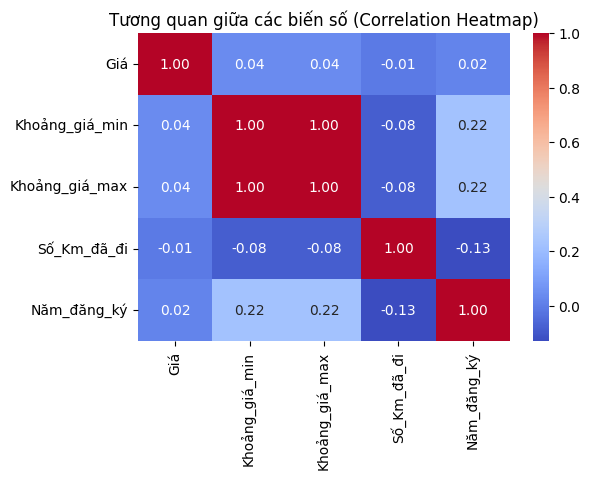

In [ ]:
print("\n MA TRẬN TƯƠNG QUAN ")

num_cols = ["Giá","Khoảng_giá_min","Khoảng_giá_max","Số_Km_đã_đi","Năm_đăng_ký"]
num_cols = [c for c in num_cols if c in df.columns]

corr = df[num_cols].corr()
print(corr.round(3))

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Tương quan giữa các biến số (Correlation Heatmap)")
plt.show()

 Ma trận tương quan giữa các biến số

| Cặp biến | Hệ số tương quan | Nhận xét |
|-----------|------------------|----------|
| Giá ↔ Khoảng_giá_min | 0.04 | Quan hệ yếu, gần như không tuyến tính |
| Giá ↔ Khoảng_giá_max | 0.04 | Giống trên |
| Giá ↔ Số_Km_đã_đi | -0.01 | Cực kỳ yếu, gần như không ảnh hưởng |
| Giá ↔ Năm_đăng_ký | 0.02 | Gần như không tuyến tính |

✅ **Nhận xét tổng thể:**
- Các biến giá trị `khoảng_giá_min` và `max` gần như trùng nhau → có thể loại bớt một trong hai.
- `Năm đăng ký` và `Số km đã đi` có tương quan ngược nhẹ (xe cũ chạy nhiều hơn).
- **Giá** gần như độc lập với các biến số → có thể chịu ảnh hưởng mạnh của các yếu tố danh mục như **thương hiệu**, **loại xe**, **tình trạng**.

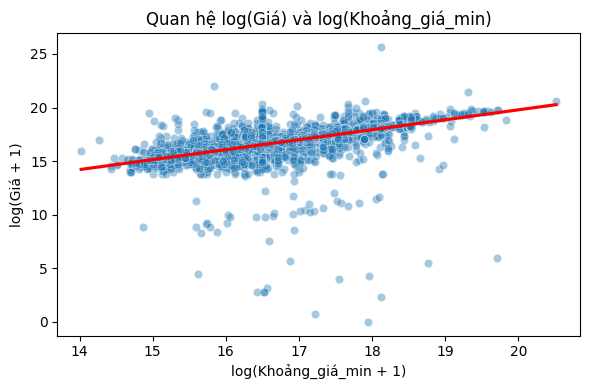

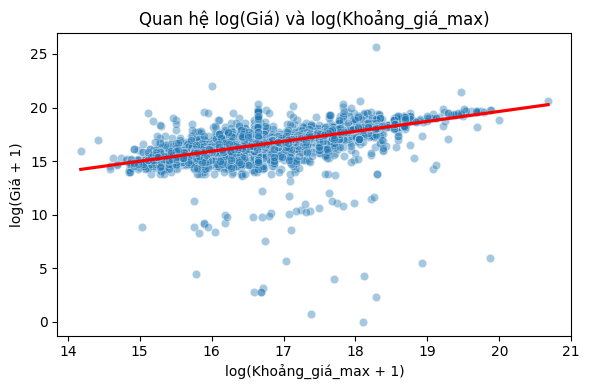

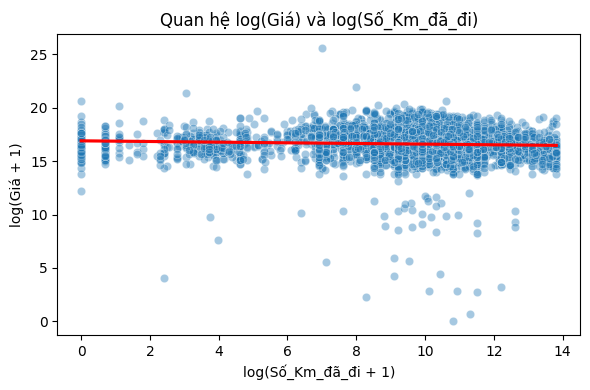

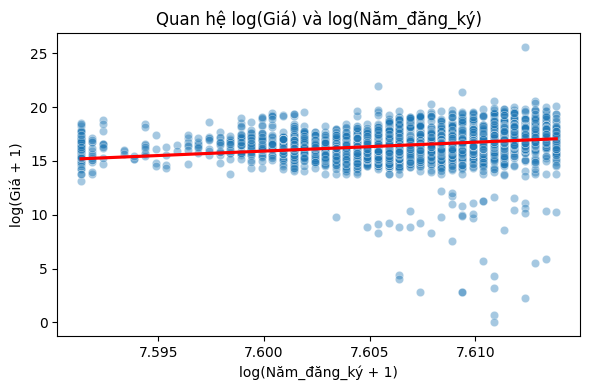

In [ ]:
features = ["Khoảng_giá_min", "Khoảng_giá_max", "Số_Km_đã_đi", "Năm_đăng_ký"]

for col in features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=np.log1p(df[col]), y=np.log1p(df["Giá"]), alpha=0.4)
        sns.regplot(x=np.log1p(df[col]), y=np.log1p(df["Giá"]), scatter=False, color="red")
        plt.title(f"Quan hệ log(Giá) và log({col})")
        plt.xlabel(f"log({col} + 1)")
        plt.ylabel("log(Giá + 1)")
        plt.tight_layout()
        plt.show()

Quan hệ giữa log(Giá) và log(Khoảng_giá_min/max)

- Hai biểu đồ scatter thể hiện mối quan hệ **tuyến tính dương yếu**:
  - Khi `khoảng_giá_min` hoặc `max` tăng → giá thực tế tăng nhẹ.
  - Có nhiều điểm lệch thấp (outlier), chủ yếu ở xe giá thấp hoặc dữ liệu nhập lỗi.

  Quan hệ giữa log(Giá) và log(Số_Km_đã_đi / Năm_đăng_ký)

- `Giá ↔ Số_Km_đã_đi`:
  - Gần như **không có tương quan** rõ ràng.
  - Giá xe không giảm nhiều theo số km đã đi — có thể vì người bán định giá theo model hoặc đời xe.

- `Giá ↔ Năm_đăng_ký`:
  - Quan hệ **dương rất yếu** → xe đăng ký mới hơn thường giá cao hơn, nhưng không mạnh.



In [ ]:
print("\n KIỂM TRA ĐA CỘNG TUYẾN (VIF) ")

# Ép kiểu float
X_vif = df[num_cols].copy()
X_vif = X_vif.apply(pd.to_numeric, errors="coerce")
X_vif = X_vif.astype(float)

#  Thêm cột hằng số cho VIF
X_vif = add_constant(X_vif)

# Tính VIF
vif_data = pd.DataFrame({
    "Feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

print(vif_data.round(2))


 KIỂM TRA ĐA CỘNG TUYẾN (VIF) 
          Feature       VIF
0           const  69833.38
1             Giá      1.00
2  Khoảng_giá_min   3558.76
3  Khoảng_giá_max   3558.73
4     Số_Km_đã_đi      1.02
5     Năm_đăng_ký      1.07


Kiểm tra đa cộng tuyến (VIF – Variance Inflation Factor)

| Biến | VIF | Diễn giải |
|------|------|------------|
| Giá | 1.00 | Không có đa cộng tuyến |
| Khoảng_giá_min | 3558.76 | 🚨 Cực cao |
| Khoảng_giá_max | 3558.73 | 🚨 Cực cao |
| Số_Km_đã_đi | 1.02 | Bình thường |
| Năm_đăng_ký | 1.07 | Bình thường |

✅ **Nhận xét:**
- `Khoảng_giá_min` và `Khoảng_giá_max` có **đa cộng tuyến nghiêm trọng** → gần như trùng lặp thông tin.
- Cần loại bớt 1 trong 2 cột để tránh sai lệch khi hồi quy (ví dụ chỉ giữ `khoảng_giá_min`).


 PHÂN PHỐI GIÁ THEO NHÓM DANH MỤC 


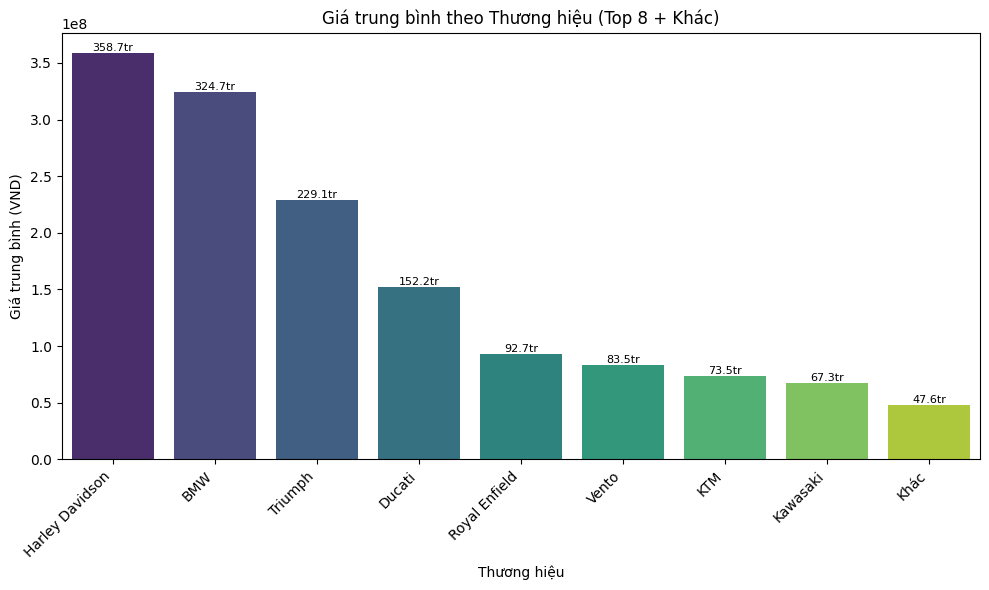

In [ ]:
print("\n PHÂN PHỐI GIÁ THEO NHÓM DANH MỤC ")

#  Tính trung bình giá theo thương hiệu
brand_avg = df.groupby("Thương_hiệu")["Giá"].mean().sort_values(ascending=False)

#  Lấy top 8 thương hiệu, gộp phần còn lại
top_brands = brand_avg.head(8).index
df["Thương_hiệu_top"] = df["Thương_hiệu"].apply(lambda x: x if x in top_brands else "Khác")

#  Tính lại trung bình sau khi gộp
avg_price = df.groupby("Thương_hiệu_top")["Giá"].mean().sort_values(ascending=False)

#  Vẽ barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")

plt.title("Giá trung bình theo Thương hiệu (Top 8 + Khác)")
plt.ylabel("Giá trung bình (VND)")
plt.xlabel("Thương hiệu")
plt.xticks(rotation=45, ha='right')

# Thêm data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height/1e6:.1f}tr",
                (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()


Phân phối giá trung bình theo Thương hiệu

| Thương hiệu | Giá trung bình (triệu VND) |
|--------------|----------------------------|
| Harley Davidson | 358.7 |
| BMW | 324.7 |
| Triumph | 229.1 |
| Ducati | 152.2 |
| Royal Enfield | 92.7 |
| Khác | 47.6 |

✅ **Nhận xét:**
- Xe của các thương hiệu cao cấp (Harley, BMW, Triumph, Ducati) có giá cao vượt trội.
- Phân khúc trung bình thuộc về Royal Enfield, KTM, Kawasaki, trong khi nhóm “Khác” chủ yếu là xe phổ thông giá thấp.


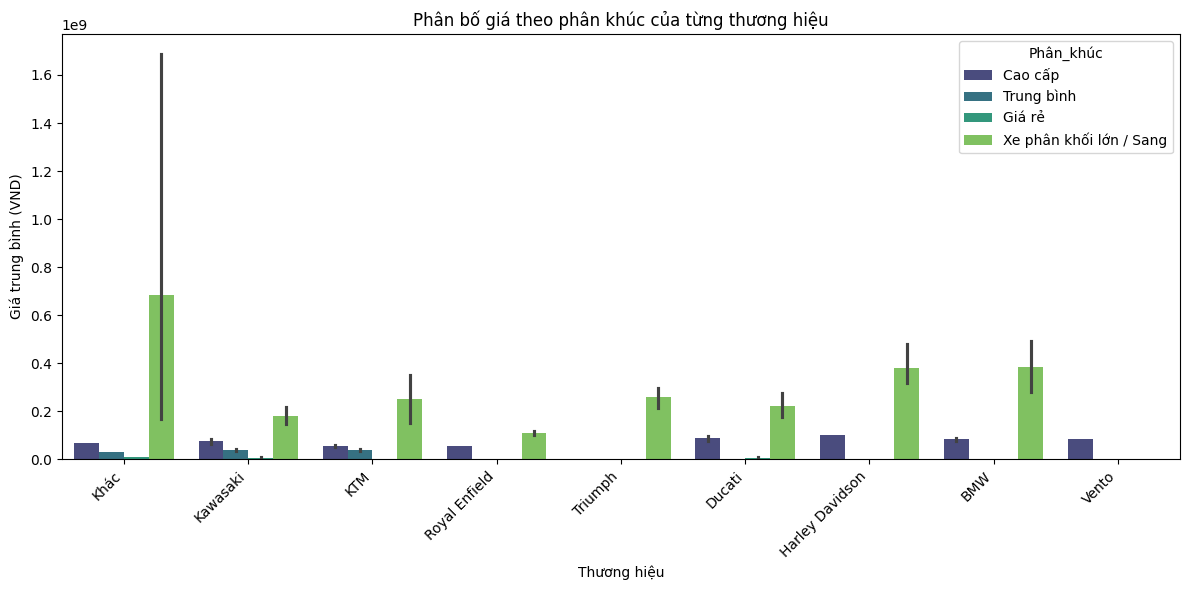

In [ ]:
# Nhóm theo thương hiệu và dòng xe
brand_model_avg = df.groupby(["Thương_hiệu", "Dòng_xe"])["Giá"].mean().reset_index()
brand_model_avg = brand_model_avg.sort_values(["Thương_hiệu", "Giá"], ascending=[True, False])
brand_price_range = brand_model_avg.groupby("Thương_hiệu")["Giá"].agg(["min", "max", "mean"])
brand_price_range["range"] = brand_price_range["max"] - brand_price_range["min"]
brand_price_range = brand_price_range.sort_values("range", ascending=False)
def phan_khuc(gia):
    if gia < 20_000_000:
        return "Giá rẻ"
    elif gia < 50_000_000:
        return "Trung bình"
    elif gia < 100_000_000:
        return "Cao cấp"
    else:
        return "Xe phân khối lớn / Sang"

df["Phân_khúc"] = df["Giá"].apply(phan_khuc)

brand_segment = df.groupby(["Thương_hiệu_top", "Phân_khúc"])["Giá"].mean().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Thương_hiệu_top", y="Giá", hue="Phân_khúc", palette="viridis")
plt.title("Phân bố giá theo phân khúc của từng thương hiệu")
plt.xlabel("Thương hiệu")
plt.ylabel("Giá trung bình (VND)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Nhìn chung, giá xe tăng dần theo phân khúc từ “Giá rẻ → Trung bình → Cao cấp → Xe phân khối lớn/Sang”.

Các thương hiệu như Harley Davidson, BMW, và Ducati nổi bật ở nhóm phân khối lớn / sang, với giá trung bình cao vượt trội (từ vài trăm triệu đến hàng tỷ VND).

Triumph và KTM cũng có mức giá cao ổn định trong nhóm này, phản ánh đặc trưng thương hiệu mô tô thể thao – touring.

Các thương hiệu phổ thông như Vento hoặc nhóm “Khác” có độ phân tán lớn do gồm nhiều dòng xe nhỏ hoặc nhập lẻ, gây ra biên độ dao động giá cao.

Kawasaki và Royal Enfield cho thấy sự đa dạng giữa các phân khúc, từ xe tầm trung đến cao cấp, phù hợp với nhiều nhóm người dùng.

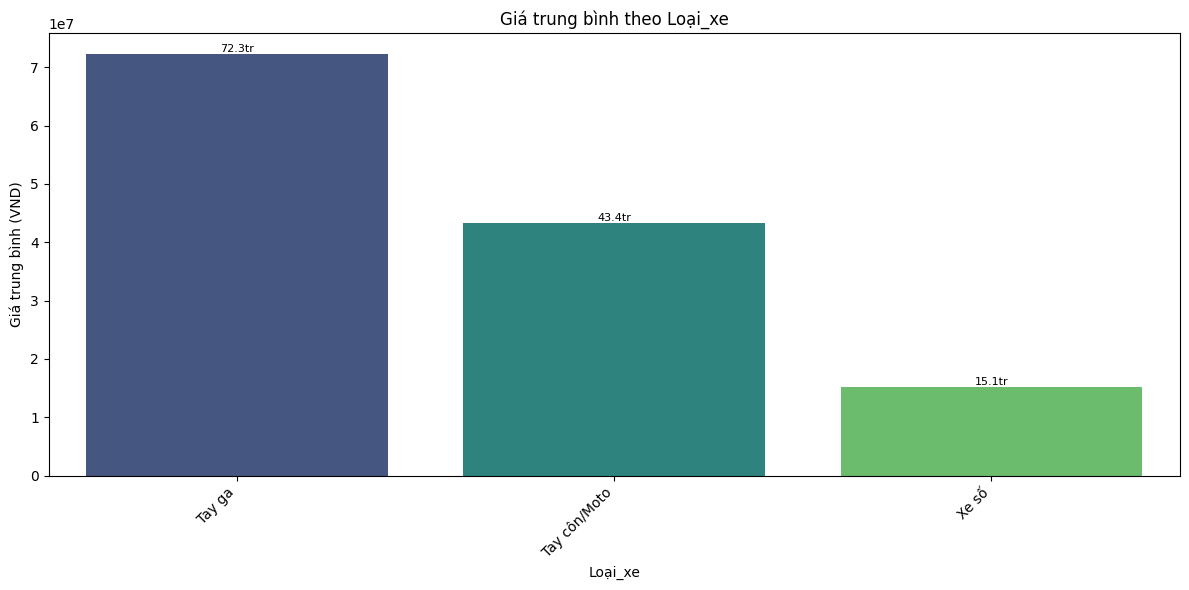

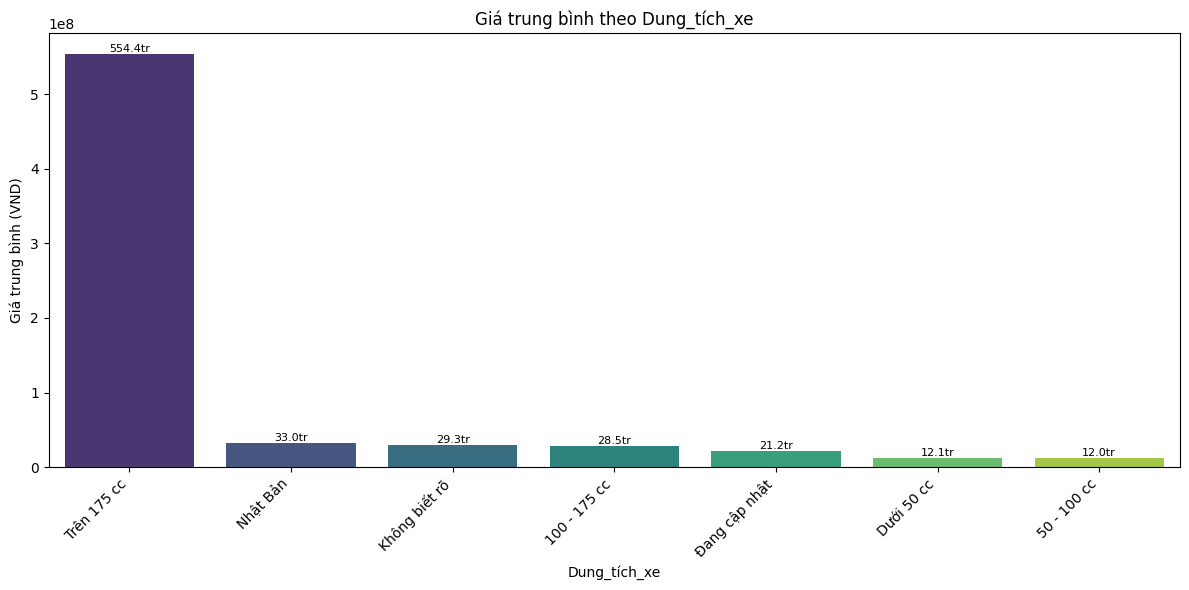

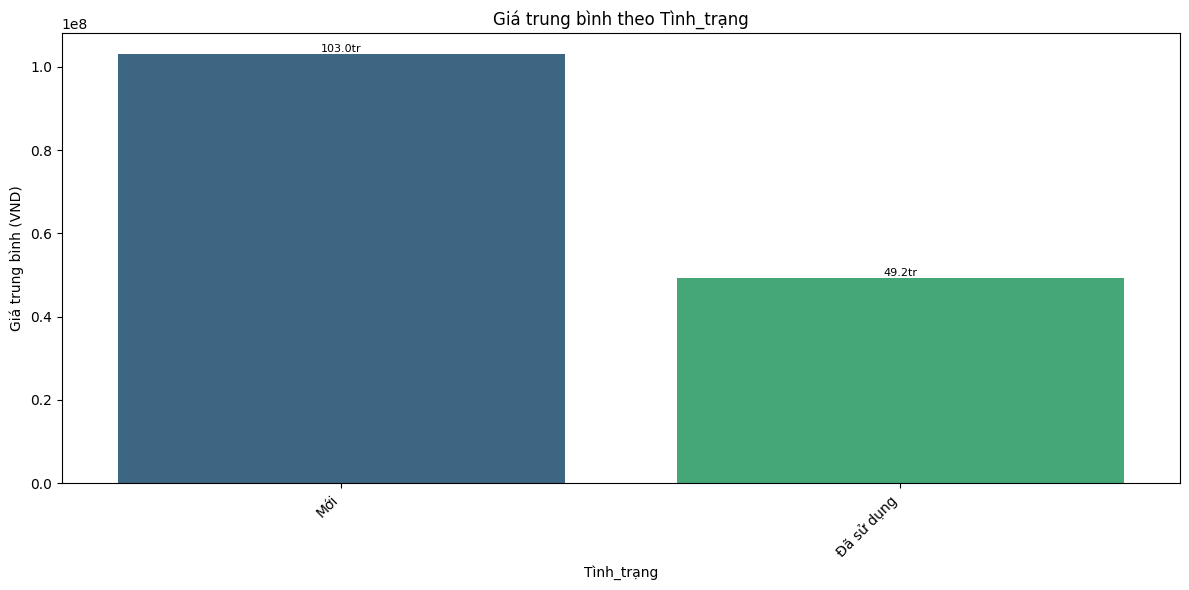

In [ ]:
cat_cols = ["Loại_xe","Dung_tích_xe","Tình_trạng"]
cat_cols = [c for c in cat_cols if c in df.columns]

for c in cat_cols:
    plt.figure(figsize=(12,6))
    avg_price = df.groupby(c)["Giá"].mean().sort_values(ascending=False)
    ax = sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")

    plt.title(f"Giá trung bình theo {c}")
    plt.xlabel(c)
    plt.ylabel("Giá trung bình (VND)")
    plt.xticks(rotation=45, ha='right')

    # Thêm nhãn giá trên đầu cột
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height/1e6:.1f}tr",
                    (p.get_x() + p.get_width()/2, height),
                    ha='center', va='bottom', fontsize=8, color='black')

    plt.tight_layout()
    plt.show()

Giá trung bình theo Loại xe

| Loại xe | Giá trung bình |
|----------|----------------|
| Tay ga | 72.3 triệu |
| Tay côn/Moto | 43.4 triệu |
| Xe số | 15.1 triệu |

✅ **Nhận xét:**
- Xe **tay ga** có giá trung bình cao nhất (phổ biến ở đô thị, nhiều dòng cao cấp).
- Xe **tay côn/moto** giá thấp hơn nhưng phân tán rộng do nhiều phân khối.
- Xe **số** có giá rẻ nhất, phản ánh đúng phân khúc phổ thông.

Giá trung bình theo Dung tích xe

- Xe **trên 175cc** có giá trung bình cực cao (~554 triệu) → chủ yếu là xe mô tô phân khối lớn.
- Các nhóm khác (50–175cc) dao động quanh 12–33 triệu → phù hợp với xe tay ga, xe số phổ thông.
- Có nhóm Nhật Bản, đây có thể là lỗi nhập liệu (có thể nhập lộn từ bên xuất xứ đi qua)

Giá trung bình theo Tình trạng xe

| Tình trạng | Giá trung bình |
|-------------|----------------|
| Mới | 103 triệu |
| Đã sử dụng | 49.2 triệu |

✅ **Nhận xét:**
- Xe mới có giá gần **gấp đôi** xe đã qua sử dụng.
- Sự chênh lệch phản ánh rõ giá trị khấu hao theo thời gian.

In [ ]:
# Gộp các nhóm lại thành "Ko có"
df["Dung_tích_xe"] = df["Dung_tích_xe"].replace(
    ["Nhật Bản", "Không biết rõ", "Đang cập nhật"],
    "Ko có"
)

# Kiểm tra lại xem còn các giá trị cũ không
print(df["Dung_tích_xe"].value_counts())

Dung_tích_xe
100 - 175 cc    5852
50 - 100 cc      686
Trên 175 cc      314
Dưới 50 cc       285
Ko có             66
Name: count, dtype: int64


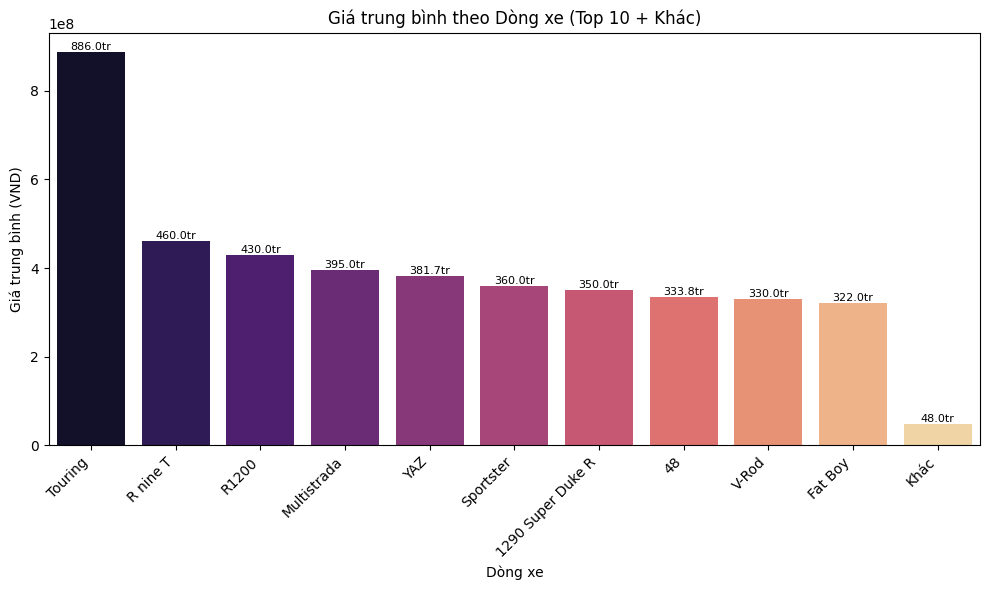

In [ ]:
#   Tính trung bình giá theo Dòng xe
model_avg = df.groupby("Dòng_xe")["Giá"].mean().sort_values(ascending=False)

#   Lấy top 10 dòng xe phổ biến nhất
top_models = model_avg.head(10).index
df["Dòng_xe_top"] = df["Dòng_xe"].apply(lambda x: x if x in top_models else "Khác")

#  Tính lại trung bình sau khi gộp
avg_model = df.groupby("Dòng_xe_top")["Giá"].mean().sort_values(ascending=False)

#  Vẽ barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=avg_model.index, y=avg_model.values, palette="magma")

plt.title("Giá trung bình theo Dòng xe (Top 10 + Khác)")
plt.ylabel("Giá trung bình (VND)")
plt.xlabel("Dòng xe")
plt.xticks(rotation=45, ha='right')

#  Thêm data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height/1e6:.1f}tr",
                (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()

Giá trung bình theo Dòng xe (Top 10 + Khác)

- Các dòng cao cấp nhất:  
  - **Touring**, **R nine T**, **R1200**, **Multistrada** có giá từ 400–880 triệu.  
  - Dòng phổ thông (YAZ, Fat Boy, Sportster) có giá 300–380 triệu.  
  - Nhóm “Khác” thấp hơn hẳn (≈ 48 triệu).

✅ **Nhận xét:**
- `Dòng xe` là biến rất giàu thông tin, phản ánh phân khúc cụ thể trong từng thương hiệu.
- Có thể nhóm theo phân khúc để giảm độ nhiễu khi mô hình hoá.

In [ ]:

# 1) Chọn các cột phân loại hiện có trong df
cat_cols_all = ["Thương_hiệu", "Dòng_xe", "Loại_xe", "Dung_tích_xe", "Tình_trạng", "Xuất_xứ"]
cat_cols = [c for c in cat_cols_all if c in df.columns]

# 2) Đảm bảo là pandas DataFrame & các cột là string
df_cat = df[cat_cols].copy()
for c in cat_cols:
    df_cat[c] = df_cat[c].astype("string")

pairs = list(combinations(cat_cols, 2))
rows = []

for a, b in pairs:
    try:
        tab = pd.crosstab(df_cat[a], df_cat[b])
        # Bảng phải có ít nhất 2 hàng & 2 cột mới kiểm định được
        if tab.shape[0] < 2 or tab.shape[1] < 2 or tab.empty:
            rows.append({"Biến 1": a, "Biến 2": b, "p-value": None, "Kết luận": "Bảng rỗng/1 mức"})
            continue

        chi2, p, dof, exp = chi2_contingency(tab)
        p = float(p)  # ép kiểu về float thuần
        rows.append({
            "Biến 1": a,
            "Biến 2": b,
            # dùng f-string để tránh xung đột round() của Spark
            "p-value": f"{p:.5g}",
            "Kết luận": "Có mối quan hệ" if p < 0.05 else "Gần như độc lập"
        })
    except Exception as e:
        rows.append({"Biến 1": a, "Biến 2": b, "p-value": None, "Kết luận": f"Lỗi: {str(e)[:50]}"})

result_df = pd.DataFrame(rows)
print(" KẾT QUẢ KIỂM ĐỊNH CHI-SQUARE ")
print(result_df.to_string(index=False))

 KẾT QUẢ KIỂM ĐỊNH CHI-SQUARE 
      Biến 1       Biến 2     p-value        Kết luận
 Thương_hiệu      Dòng_xe           0  Có mối quan hệ
 Thương_hiệu      Loại_xe  1.894e-289  Có mối quan hệ
 Thương_hiệu Dung_tích_xe           0  Có mối quan hệ
 Thương_hiệu   Tình_trạng           0  Có mối quan hệ
 Thương_hiệu      Xuất_xứ           0  Có mối quan hệ
     Dòng_xe      Loại_xe           0  Có mối quan hệ
     Dòng_xe Dung_tích_xe           0  Có mối quan hệ
     Dòng_xe   Tình_trạng           1 Gần như độc lập
     Dòng_xe      Xuất_xứ           0  Có mối quan hệ
     Loại_xe Dung_tích_xe 1.3737e-268  Có mối quan hệ
     Loại_xe   Tình_trạng     0.13001 Gần như độc lập
     Loại_xe      Xuất_xứ 4.5468e-164  Có mối quan hệ
Dung_tích_xe   Tình_trạng  0.00020577  Có mối quan hệ
Dung_tích_xe      Xuất_xứ           0  Có mối quan hệ
  Tình_trạng      Xuất_xứ   2.302e-63  Có mối quan hệ


Kiểm định Chi-square giữa các biến phân loại

- Mục tiêu: Xác định xem các biến phân loại (categorical) như `Thương_hiệu`, `Loại_xe`, `Dòng_xe`, `Dung_tích_xe`, `Tình_trạng`, `Xuất_xứ` có **mối quan hệ thống kê** hay không.
- Dựa vào giá trị **p-value**, với ngưỡng α = 0.05:
  - Nếu p-value < 0.05 → có mối quan hệ.
  - Nếu p-value ≥ 0.05 → độc lập.

| Cặp biến | p-value | Kết luận |
|-----------|----------|-----------|
| Thương_hiệu ↔ Dòng_xe | 0 | ✅ Có mối quan hệ |
| Thương_hiệu ↔ Loại_xe | 1.894e-289 | ✅ Có mối quan hệ |
| Thương_hiệu ↔ Dung_tích_xe | 0 | ✅ Có mối quan hệ |
| Thương_hiệu ↔ Tình_trạng | 0 | ✅ Có mối quan hệ |
| Thương_hiệu ↔ Xuất_xứ | 0 | ✅ Có mối quan hệ |
| Dòng_xe ↔ Tình_trạng | 1 | ⚠️ Gần như độc lập |
| Loại_xe ↔ Tình_trạng | 0.13 | ⚠️ Gần như độc lập | *italicised text*

✅ **Nhận xét:**
- Các biến danh mục có **liên hệ mạnh mẽ với nhau**, đặc biệt giữa `Thương_hiệu`, `Loại_xe`, `Dung_tích_xe`, `Xuất_xứ`.
- `Tình_trạng` (mới / đã sử dụng) **không phụ thuộc mạnh** vào thương hiệu hay loại xe — phản ánh đa dạng xe mới/cũ trong từng nhóm.

In [ ]:
# Chuẩn hóa tên quận
df["Quận"] = df["Địa_chỉ"].str.extract(r"(Quận\s*\d+|Q\d+|Bình Thạnh|Phú Nhuận|Tân Bình|Gò Vấp|Thủ Đức|Bình Tân|Bình Chánh|Nhà Bè|Hóc Môn)", expand=False)

# Thay thế các cách viết tắt
df["Quận"] = df["Quận"].replace({
    "Q1": "Quận 1",
    "Q2": "Quận 2",
    "Q3": "Quận 3",
    "Q4": "Quận 4",
    "Q5": "Quận 5",
    "Q6": "Quận 6",
    "Q7": "Quận 7",
    "Q8": "Quận 8",
    "Q9": "Quận 9",
    "Q10": "Quận 10",
    "Q11": "Quận 11",
    "Q12": "Quận 12"
})
df["Quận"] = df["Quận"].fillna("Khác")



 GIÁ TRUNG BÌNH THEO KHU VỰC 


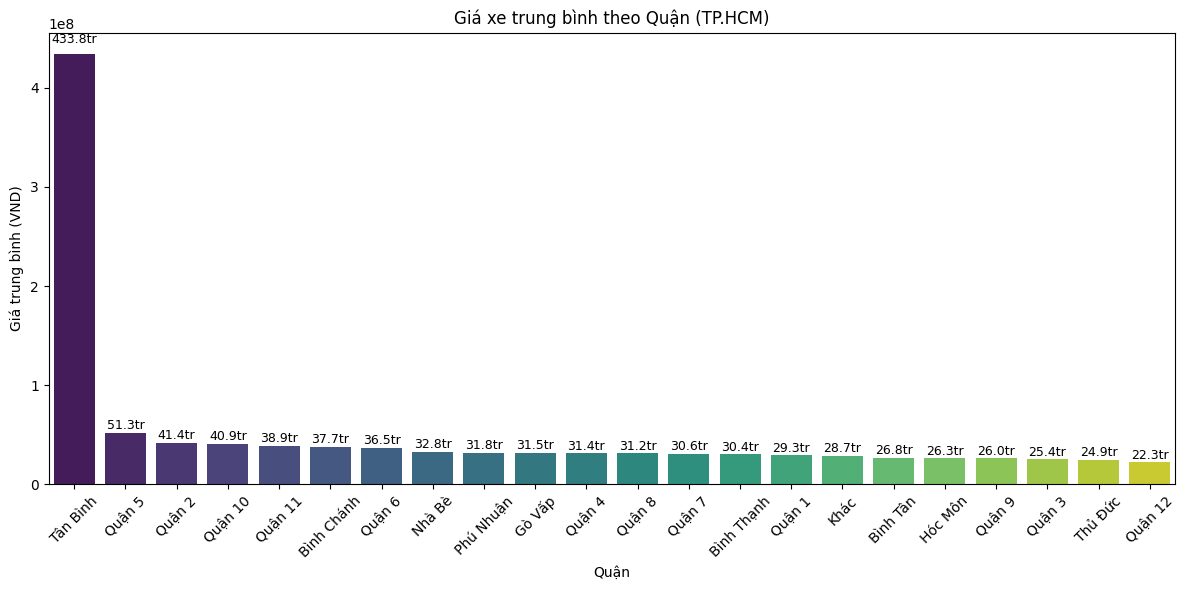

In [ ]:
print("\n GIÁ TRUNG BÌNH THEO KHU VỰC ")

avg_price_quan = df.groupby("Quận")["Giá"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=avg_price_quan.index, y=avg_price_quan.values, palette="viridis")

# Thêm nhãn trên cột
for i, v in enumerate(avg_price_quan.values):
    ax.text(i, v + (v*0.02), f"{v/1_000_000:.1f}tr", ha='center', va='bottom', fontsize=9)

plt.title("Giá xe trung bình theo Quận (TP.HCM)")
plt.xlabel("Quận")
plt.ylabel("Giá trung bình (VND)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 🔹 Giá trung bình theo khu vực (Quận – TP. HCM)

| Khu vực                         | Giá TB (triệu VND) |
| ------------------------------- | ------------------ |
| **Tân Bình**                    | **433.8**          |
| Q5–Q10–Q2                       | 40–51              |
| Q6–Q11–Bình Chánh               | 36–39              |
| Q7–Q8–Phú Nhuận–Gò Vấp          | 30–33              |
| Q9–Bình Tân–Hóc Môn–Thủ Đức–Q12 | 22–27              |


✅ **Nhận xét:**
Tân Bình nổi bật với mức giá trung bình cực cao (~434 triệu) — khả năng xuất hiện các tin đăng xe phân khối lớn, mô tô nhập khẩu.

Các quận trung tâm (Q1, Q5, Q10) có giá xe cao hơn rõ rệt so với các quận ngoại thành (Q9, Q12, Hóc Môn).

Sự khác biệt thể hiện yếu tố vị trí ảnh hưởng mạnh đến giá, có thể xem xét mã hóa “vị trí” thành nhóm khu vực (Trung tâm / Trung gian / Ngoại thành) để cải thiện mô hình dự đoán.


In [ ]:
def _is_keep_char(ch: str) -> bool:
    cat0 = unicodedata.category(ch)[0]
    return (cat0 in ("L", "N")) or (ch in " -/_")

def normalize_numbers(s: str) -> str:
    s = re.sub(r"(\d+)[ ]?(?:tr|triệu)\b", lambda m: str(int(m.group(1))*1_000_000), s)
    s = re.sub(r"(\d+)[ ]?cc\b",          lambda m: str(int(m.group(1))),             s)
    s = re.sub(r"(\d+)[.,](\d+)",         lambda m: m.group(1)+m.group(2),            s)
    return s

def clean_text_vi_numeric(s: str):
    if pd.isna(s):
        return np.nan

    s = unicodedata.normalize("NFKC", str(s)).lower()

    s = re.sub(r"https?://\S+|www\.\S+", " ", s)
    s = re.sub(r"\b[\w\.-]+@[\w\.-]+\.\w+\b", " ", s)
    s = re.sub(r"\b(0|\+84)\d{8,11}\b", " ", s)

    s = re.sub(r"[@#]+", " ", s)
    s = re.sub(r"[₫$€£¥₹]", " ", s)

    s = normalize_numbers(s)

    s = "".join(ch if _is_keep_char(ch) else " " for ch in s)

    s = re.sub(r"[\-_]{2,}", " ", s)
    s = re.sub(r"\s{2,}", " ", s).strip()

    return np.nan if s == "" else s

cols_map = {
    "Tiêu_đề": "tieu_de_clean",
    "Mô_tả_chi_tiết": "mo_ta_chi_tiet_clean",
}

# Áp dụng
for src, dst in cols_map.items():
    if src in df.columns:
        df[dst] = df[src].apply(clean_text_vi_numeric)
        df[dst] = df[dst].fillna("không có")

for src, dst in cols_map.items():
    if src in df.columns:
        before = df[src].head(1).tolist()
        df[dst] = df[src].apply(clean_text_vi_numeric)
        df[dst] = df[dst].fillna("không có")
        after = df[dst].head(1).tolist()

        print(f"[OK] {src} → {dst}")
        print("  • Before:", before[0])
        print("  • After :", after[0])


# Gộp text (nếu cần dùng cho TF-IDF)
if all(c in df.columns for c in ["tieu_de_clean","mo_ta_chi_tiet_clean"]):
    df["text_all_clean"] = (df["tieu_de_clean"].fillna("") + " " +
                            df["mo_ta_chi_tiet_clean"].fillna("")).str.strip()
    print("[OK] Đã tạo thêm cột text_all_clean (gộp sau khi clean).")

[OK] Tiêu_đề → tieu_de_clean
  • Before: Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp 95%
  • After : bán vespa sprint 125 2024 xanh dương xe đẹp 95
[OK] Mô_tả_chi_tiết → mo_ta_chi_tiet_clean
  • Before: Bán xe #Vespa Sprint 125cc. Mua mới tại #Topcom 01/2024, Xe chính chủ. Chạy được 14.000km. Giá: 66tr(TL). Anh/chị quan tâm nhắn Zalo số: ***. Công chứng Hợp đồng mua bán trong ngày.
  • After : bán xe vespa sprint 125 mua mới tại topcom 01/2024 xe chính chủ chạy được 14000km giá 66000000 tl anh/chị quan tâm nhắn zalo số công chứng hợp đồng mua bán trong ngày
[OK] Đã tạo thêm cột text_all_clean (gộp sau khi clean).


 Chuẩn hoá dữ liệu văn bản

- Tiến hành làm sạch 2 cột: `Tiêu_đề` → `tieu_de_clean` và `Mô_tả_chi_tiết` → `mo_ta_chi_tiet_clean`
- Các bước xử lý:
  - Chuyển về chữ thường.
  - Xoá ký tự đặc biệt, hashtag, dấu chấm, ký hiệu tiền tệ.
  - Gộp hai cột text thành `text_all_clean`.

Ví dụ:
> **Before:**  
> Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp 95%  
> **After:**  
> bán vespa sprint 125 2024 xanh dương xe đẹp 95  

✅ **Nhận xét:**
- Văn bản sau xử lý nhất quán, dễ tách từ và phân tích.
- Giảm nhiễu từ ký tự đặc biệt, hashtag, emoji.

 TẦN SUẤT TỪ TRONG TEXT 


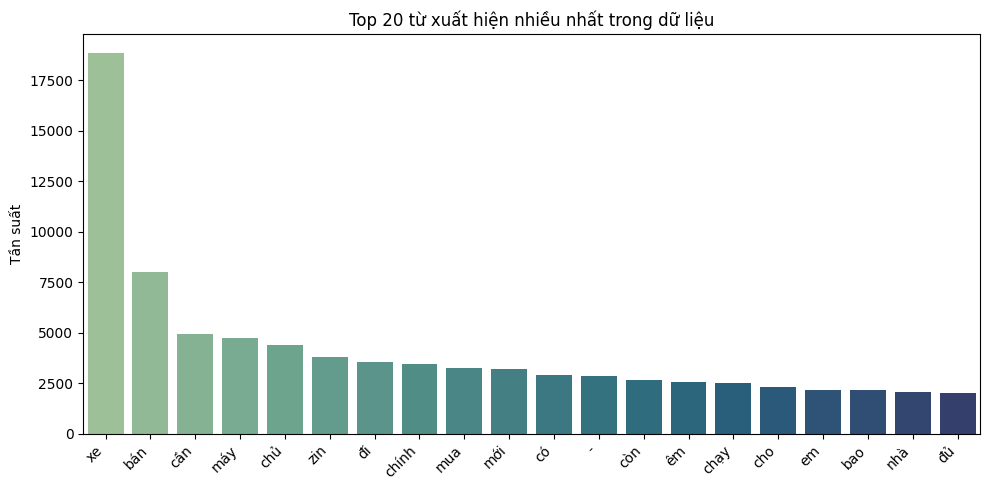

In [ ]:
print(" TẦN SUẤT TỪ TRONG TEXT ")

# Gom tất cả text sạch (đã chuẩn hoá)
all_words = " ".join(df["text_all_clean"].dropna()).split()

# Đếm tần suất
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

# Biểu đồ top 20 từ xuất hiện nhiều nhất
plt.figure(figsize=(10,5))
sns.barplot(x=[w for w,c in common_words], y=[c for w,c in common_words], palette="crest")
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 từ xuất hiện nhiều nhất trong dữ liệu")
plt.ylabel("Tần suất")
plt.tight_layout()
plt.show()

Top 20 từ phổ biến nhất trong dữ liệu

| Từ phổ biến | Xuất hiện nhiều nhất |
|--------------|----------------------|
| xe | 18.000+ lần |
| bán | 8.000+ lần |
| cần | 5.000+ lần |
| máy, chủ, zin, chính, mua, mới, ... | < 5.000 |

✅ **Nhận xét:**
- Từ khóa “xe”, “bán”, “chính chủ”, “zin”, “mới” xuất hiện thường xuyên → phản ánh mô hình mô tả phổ biến khi đăng tin bán xe.
- Từ “chính chủ”, “zin”, “êm”, “chạy tốt” thường được dùng để tăng độ tin cậy của tin rao.

  WORDCLOUD CHO TEXT 


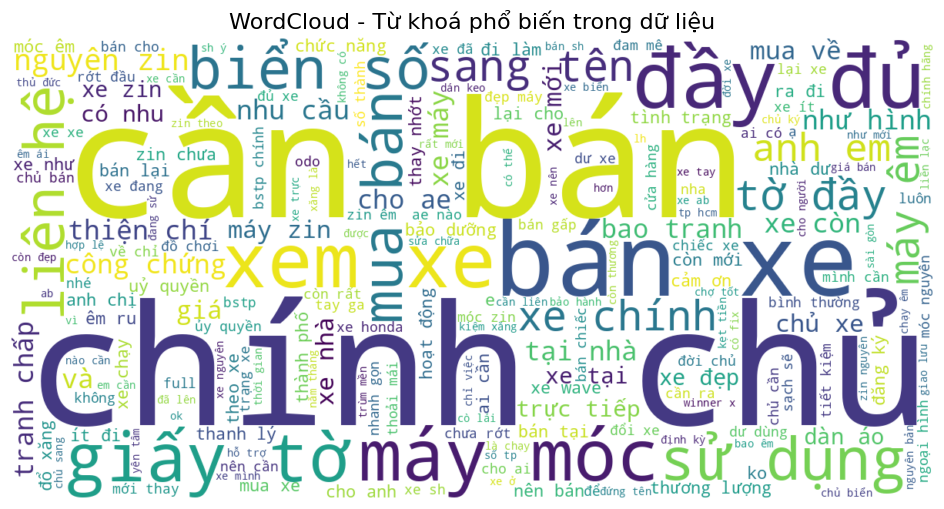

In [ ]:
print("  WORDCLOUD CHO TEXT ")
#  Gom text (sau khi đã clean)
text_all = " ".join(df["text_all_clean"].dropna())

# Tạo WordCloud
wc = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    colormap="viridis",    # bạn có thể thử: 'plasma', 'coolwarm', 'Set2'
    max_words=200,
    min_font_size=10
).generate(text_all)

#  Hiển thị
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Từ khoá phổ biến trong dữ liệu", fontsize=16)
plt.show()


Ngưỡng phân chia giá cao/thấp: 16,500,000 VND


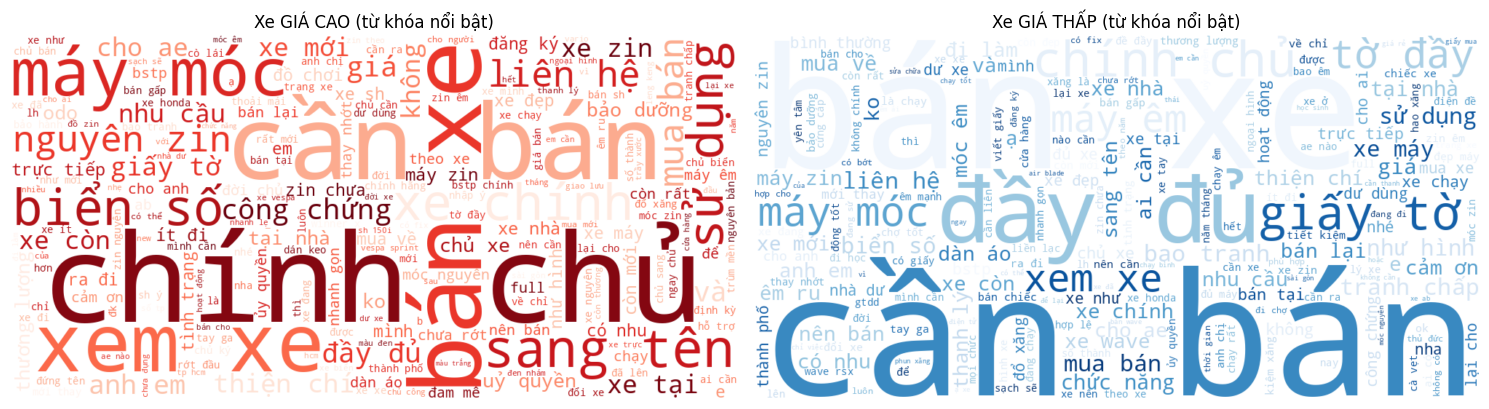

In [ ]:
# Ngưỡng chia giá cao/thấp (ví dụ: trung vị)
threshold = df["Giá"].median()
print(f"Ngưỡng phân chia giá cao/thấp: {threshold:,.0f} VND")

# Gom text cho hai nhóm
text_high = " ".join(df[df["Giá"] > threshold]["text_all_clean"].dropna())
text_low  = " ".join(df[df["Giá"] <= threshold]["text_all_clean"].dropna())

wc_high = WordCloud(width=1000, height=500, background_color="white", colormap="Reds").generate(text_high)
wc_low  = WordCloud(width=1000, height=500, background_color="white", colormap="Blues").generate(text_low)

fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0].imshow(wc_high, interpolation="bilinear"); axes[0].axis("off"); axes[0].set_title("Xe GIÁ CAO (từ khóa nổi bật)")
axes[1].imshow(wc_low, interpolation="bilinear");  axes[1].axis("off");  axes[1].set_title("Xe GIÁ THẤP (từ khóa nổi bật)")
plt.tight_layout(); plt.show()


So sánh từ khóa giữa nhóm giá cao và giá thấp

| Nhóm | Từ khóa đặc trưng | Hàm ý nội dung |
|-------|-------------------|----------------|
| **Giá cao** | chính chủ, sang tên, công chứng, liên hệ, xem xe | Nhấn mạnh **uy tín, pháp lý và chất lượng** → dễ làm tăng giá |
| **Giá thấp** | bán xe, tờ đầy, zin, đầy đủ, cần bán | Nhấn mạnh **tình trạng sử dụng và nhu cầu bán gấp** → xu hướng giảm giá |

📈 **Kết luận:**
- **Xe giá cao** có xu hướng được quảng cáo bằng các từ mang tính **chính thống và bảo đảm pháp lý**.  
- **Xe giá thấp** mô tả chi tiết hơn về **chất lượng sử dụng thực tế**, phản ánh nhóm tin **bán thanh lý, bình dân hoặc cần tiền**.  

# 4) Dữ liệu sau khi tiền xử lý, khám phá và trực quan hóa dữ liệu

In [ ]:
# Ghi ra file Excel sau khi đã tiền xử lý
output_path = "/content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/Data/du_lieu_xe_may_da_tien_xu_ly_1.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ File đã được lưu tại: {output_path}")


✅ File đã được lưu tại: /content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/Data/du_lieu_xe_may_da_tien_xu_ly_1.xlsx


## 📘 Dữ liệu & Lựa chọn cột

### Cột hiện có
id, Tiêu_đề, Giá, Khoảng_giá_min, Khoảng_giá_max, Địa_chỉ,
Mô_tả_chi_tiết, Thương_hiệu, Dòng_xe, Năm_đăng_ký, Số_Km_đã_đi,
Tình_trạng, Loại_xe, Dung_tích_xe, Xuất_xứ, Chính_sách_bảo_hành,
Trọng_lượng, Href, Thương_hiệu_top, Dòng_xe_top, Quận,
tieu_de_clean, mo_ta_chi_tiet_clean, text_all_clean, Phân_khúc,
Tuổi_xe, log_Km, Km_trên_năm


### ✅ Quyết định giữ / bỏ cột

| **Quyết định** | **Cột**                                                                                                                         | **Lý do**                                                                                                                                                                                    |
| :------------- | :------------------------------------------------------------------------------------------------------------------------------ | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| ✅ **Giữ**      | **Khoảng_giá_min**                                                                                                              | Là mốc giá thị trường, đại diện cho giá trung bình hợp lý nhất.                                                                                                                              |
| ✅ **Giữ**      | **Tuổi_xe**, **log_Km**, **Km_trên_năm**                                                                                        | Phản ánh hao mòn và mức độ sử dụng xe — tác động mạnh đến giá.                                                                                                                               |
| ✅ **Giữ**      | **Dòng_xe_top**, **Loại_xe**, **Dung_tích_xe**, **Tình_trạng**, **Xuất_xứ**, **Quận**, **Phân_khúc**, **Thương_hiệu**           | Thể hiện phân khúc, đặc điểm kỹ thuật và vị trí xe — giúp mô hình học được khác biệt giữa các nhóm.                                                                                          |
| ➖ **Bỏ**       | **Giá**                                                                                                                         | Được dùng làm biến mục tiêu riêng (`label_log`).                                                                                                                                             |
| ❌ **Bỏ**       | **id**, **Href**, **Địa_chỉ**, **Tiêu_đề**, **Mô_tả_chi_tiết**, **tieu_de_clean**, **mo_ta_chi_tiet_clean**, **text_all_clean** | `text_all_clean` **không dùng trong PySpark** vì TF-IDF làm phình dữ liệu, dễ gây lỗi bộ nhớ; tuy nhiên **vẫn hữu ích cho mô hình ML truyền thống** (RandomForest, XGBoost) nếu xử lý riêng. |
| ❌ **Bỏ**       | **Khoảng_giá_max**, **Thương_hiệu_top**, **Chính_sách_bảo_hành**, **Trọng_lượng**                                               | Tương quan cao hoặc ít giá trị phân biệt, gây nặng pipeline.                                                                                                                                 |

## Ghi chú thêm
- PySpark không dùng text_all_clean (TF-IDF) vì TF-IDF sinh ra ma trận đặc trưng cực lớn và thưa (sparse).
Mỗi từ/ngữ trong tập văn bản là một cột → hàng trăm nghìn feature → PySpark phải phân tán vector rất lớn qua cluster ⇒ ngốn RAM, tốn shuffle, chạy cực chậm hoặc treo máy (đặc biệt trên Colab/local).
Vậy nên Trong PySpark: chỉ giữ các đặc trưng số & phân loại (numeric + categorical) để mô hình chạy nhanh, ổn định.Trong ML truyền thống (sklearn): TF-IDF được dùng vì dữ liệu được xử lý trên RAM cục bộ, dễ vector hoá, huấn luyện nhanh hơn cho text.
- Nếu số lượng dòng dữ liệu lớn, có thể xem xét giảm chiều văn bản hoặc dùng mô hình nông (LightGBM, IsolationForest, v.v.).  
- Có thể chuẩn hóa `Giá` theo từng phân khúc (`Thương_hiệu` + `Dòng_xe` + `Năm_đăng_ký`) để phát hiện bất thường nội nhóm.


# Bài 1: Làm trên môi trường Pyspark

In [6]:
df1 = spark.read.format("com.crealytics.spark.excel") \
    .option("header", True) \
    .option("inferSchema", True) \
    .load("/content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/Data/du_lieu_xe_may_da_tien_xu_ly_1.xlsx")

In [7]:
df1.printSchema()


root
 |-- id: double (nullable = true)
 |-- Tiêu_đề: string (nullable = true)
 |-- Giá: double (nullable = true)
 |-- Khoảng_giá_min: double (nullable = true)
 |-- Khoảng_giá_max: double (nullable = true)
 |-- Địa_chỉ: string (nullable = true)
 |-- Mô_tả_chi_tiết: string (nullable = true)
 |-- Thương_hiệu: string (nullable = true)
 |-- Dòng_xe: string (nullable = true)
 |-- Năm_đăng_ký: double (nullable = true)
 |-- Số_Km_đã_đi: double (nullable = true)
 |-- Tình_trạng: string (nullable = true)
 |-- Loại_xe: string (nullable = true)
 |-- Dung_tích_xe: string (nullable = true)
 |-- Xuất_xứ: string (nullable = true)
 |-- Chính_sách_bảo_hành: string (nullable = true)
 |-- Trọng_lượng: string (nullable = true)
 |-- Href: string (nullable = true)
 |-- Thương_hiệu_top: string (nullable = true)
 |-- Phân_khúc: string (nullable = true)
 |-- Quận: string (nullable = true)
 |-- tieu_de_clean: string (nullable = true)
 |-- mo_ta_chi_tiet_clean: string (nullable = true)
 |-- text_all_clean: string

### Kỹ thuật xây dựng đặc trưng (Feature engineering & Encoding)

[IQR] Loại bỏ 659 điểm ngoại lệ (9.15%)
IQR: Q1=8,500,000, Q3=32,500,000, range=[-27,500,000, 68,500,000]

 THỐNG KÊ GIÁ TRƯỚC XỬ LÝ 
count              7,203
mean          49,237,142
std        1,603,410,679
min                    0
25%            8,500,000
50%           16,500,000
75%           32,500,000
max      136,000,000,000
Name: Giá, dtype: object

 THỐNG KÊ GIÁ SAU XỬ LÝ 
count         6,544
mean     19,200,902
std      15,044,528
min               0
25%       8,000,000
50%      15,000,000
75%      26,922,500
max      68,500,000
Name: Giá, dtype: object


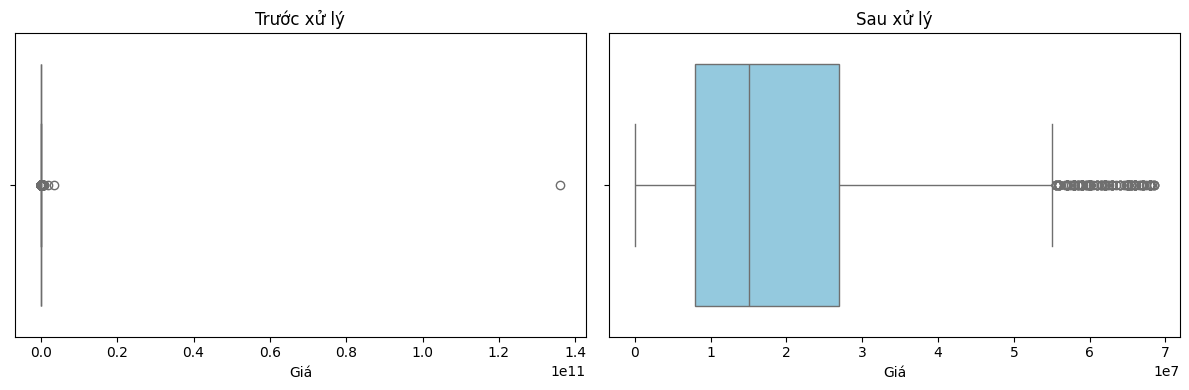

In [8]:
# Sao lưu dữ liệu gốc
df_raw = df1

# Tên cột giá
col = "Giá"

Q1, Q3 = df1.approxQuantile(col, [0.25, 0.75], 0.0)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df1.filter((F.col(col) >= lower_bound) & (F.col(col) <= upper_bound))

count_raw = df1.count()
count_filtered = df_filtered.count()
removed = count_raw - count_filtered

print(f"[IQR] Loại bỏ {removed} điểm ngoại lệ ({removed/count_raw*100:.2f}%)")
print(f"IQR: Q1={Q1:,.0f}, Q3={Q3:,.0f}, range=[{lower_bound:,.0f}, {upper_bound:,.0f}]")

pdf_raw = df_raw.select(col).toPandas()
pdf_filtered = df_filtered.select(col).toPandas()

print("\n THỐNG KÊ GIÁ TRƯỚC XỬ LÝ ")
print(pdf_raw[col].describe().apply(lambda x: f"{x:,.0f}"))
print("\n THỐNG KÊ GIÁ SAU XỬ LÝ ")
print(pdf_filtered[col].describe().apply(lambda x: f"{x:,.0f}"))

# Biểu đồ Boxplot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x=pdf_raw[col], ax=ax[0], color="salmon")
ax[0].set_title("Trước xử lý")
sns.boxplot(x=pdf_filtered[col], ax=ax[1], color="skyblue")
ax[1].set_title("Sau xử lý")
plt.tight_layout()
plt.show()


Thông tin tổng quan
- Tổng số mẫu ban đầu: **7,203**
- Số mẫu bị loại bỏ: **659 (≈ 9.15%)**
- Phương pháp: **IQR (Interquartile Range)**
- Khoảng tứ phân vị:
  - **Q1 = 8,500,000**
  - **Q3 = 32,500,000**
  - **IQR = 24,000,000**
- Ngưỡng loại bỏ:
  - **[Q1 - 1.5×IQR, Q3 + 1.5×IQR] = [−27,500,000, 68,500,000]**

---

So sánh trước & sau xử lý

| Chỉ số thống kê | Trước xử lý | Sau xử lý |
|-----------------|-------------|------------|
| Số lượng (count) | 7,203 | 6,544 |
| Trung bình (mean) | 49.2 triệu | **19.2 triệu** |
| Độ lệch chuẩn (std) | 1.6 tỷ (!)** | **15 triệu** |
| Min | 0 | 0 |
| Q1 | 8.5 triệu | 8.0 triệu |
| Median | 16.5 triệu | 15.0 triệu |
| Q3 | 32.5 triệu | 26.9 triệu |
| Max | 136 tỷ | **68.5 triệu** |

 **Nhận xét:**
- Sau khi loại bỏ ngoại lệ, **độ lệch chuẩn giảm mạnh** → dữ liệu trở nên **ổn định và đại diện hơn** cho mặt bằng chung.
- Một số giá trị cực lớn (hàng trăm tỷ) trước xử lý là **ngoại lệ rõ ràng**, gây méo trung bình và phân phối.
- Trung bình giảm từ ~49 triệu xuống ~19 triệu → phù hợp với tầm giá thực tế của ô tô phổ thông.

---

 Quan sát đồ thị Boxplot

| Trước xử lý | Sau xử lý |
|-------------|------------|
| Biểu đồ cho thấy **một vài điểm ngoại lệ cực lớn (outliers)** kéo dài ra ngoài phạm vi chính | Biểu đồ sau xử lý có **phân phối cân đối hơn**, phần lớn dữ liệu nằm trong hộp IQR, chỉ còn ít ngoại lệ nhẹ |



In [9]:
print("Mã hoá các biến phân loại (Label Encoding)")

# Các cột phân loại
cat_cols = ["Dòng_xe_top", "Loại_xe", "Dung_tích_xe",
            "Tình_trạng", "Xuất_xứ", "Quận", "Phân_khúc", "Thương_hiệu"]

# Tạo danh sách các StringIndexer cho từng cột
indexers = [
    StringIndexer(inputCol=c, outputCol=c + "_indexed", handleInvalid="keep")
    for c in cat_cols if c in df1.columns
]

# Dùng Pipeline để chạy tất cả một lần
pipeline = Pipeline(stages=indexers)

# Huấn luyện & biến đổi dữ liệu
df_indexed = pipeline.fit(df1).transform(df1)

# In thông tin
for c in cat_cols:
    if c in df1.columns:
        print(f"[OK] Đã mã hóa cột: {c} → cột mới: {c}_indexed")

print("\nHoàn tất Label Encoding. Các cột phân loại giờ đã ở dạng số nguyên.")

Mã hoá các biến phân loại (Label Encoding)
[OK] Đã mã hóa cột: Loại_xe → cột mới: Loại_xe_indexed
[OK] Đã mã hóa cột: Dung_tích_xe → cột mới: Dung_tích_xe_indexed
[OK] Đã mã hóa cột: Tình_trạng → cột mới: Tình_trạng_indexed
[OK] Đã mã hóa cột: Xuất_xứ → cột mới: Xuất_xứ_indexed
[OK] Đã mã hóa cột: Quận → cột mới: Quận_indexed
[OK] Đã mã hóa cột: Phân_khúc → cột mới: Phân_khúc_indexed
[OK] Đã mã hóa cột: Thương_hiệu → cột mới: Thương_hiệu_indexed

Hoàn tất Label Encoding. Các cột phân loại giờ đã ở dạng số nguyên.


In [10]:
print("Xử lý biến số (numeric)")
df_indexed = (
    df_indexed
    # Tuổi_xe = 2025 - Năm_đăng_ký
    .withColumn("Tuổi_xe", F.lit(2025) - F.col("Năm_đăng_ký").cast("int"))
    # log_Km = log1p(Số_Km_đã_đi)
    .withColumn("log_Km", F.log1p(F.col("Số_Km_đã_đi").cast("double")))
    # Giá_chênh_min = Giá - Khoảng_giá_min
    .withColumn(
        "Giá_chênh_min",
        F.col("Giá").cast("double") - F.col("Khoảng_giá_min").cast("double")
    )
    # Tỷ_lệ_giá_so_với_min = Giá / (Khoảng_giá_min + 1)
    .withColumn(
        "Tỷ_lệ_giá_so_với_min",
        F.col("Giá").cast("double") / (F.col("Khoảng_giá_min").cast("double") + F.lit(1.0))
    )
    # Km_trên_năm = Số_Km_đã_đi / Tuổi_xe.replace(0,1)
    .withColumn(
        "Km_trên_năm",
        F.col("Số_Km_đã_đi").cast("double") /
        F.when(F.col("Tuổi_xe") == 0, F.lit(1.0))
         .otherwise(F.col("Tuổi_xe").cast("double"))
    )
)

print("Hoàn tất tạo các đặc trưng số.")
df_indexed.select("Tuổi_xe", "log_Km", "Giá_chênh_min", "Tỷ_lệ_giá_so_với_min", "Km_trên_năm").show(10, truncate=False)

Xử lý biến số (numeric)
Hoàn tất tạo các đặc trưng số.
+-------+------------------+-------------+--------------------+-------------------+
|Tuổi_xe|log_Km            |Giá_chênh_min|Tỷ_lệ_giá_so_với_min|Km_trên_năm        |
+-------+------------------+-------------+--------------------+-------------------+
|1      |9.546884034617925 |-6530000.0   |0.9099682764377737  |14000.0            |
|6      |10.239995502805316|1.674E7      |1.266730381345915   |4666.666666666667  |
|2      |9.392745258631441 |9000000.0    |1.3214285242346955  |6000.0             |
|6      |11.002116507732017|1900000.0    |1.0440835024574593  |10000.0            |
|4      |10.085850775128717|5980000.0    |1.3513512719535092  |6000.0             |
|7      |10.12667110305036 |-230000.0    |0.9702456700846481  |3571.4285714285716 |
|12     |11.289794413577894|2170000.0    |1.1569051947284748  |6666.666666666667  |
|22     |1.0986122886681096|-2780000.0   |0.7242062773604884  |0.09090909090909091|
|10     |10.463131911

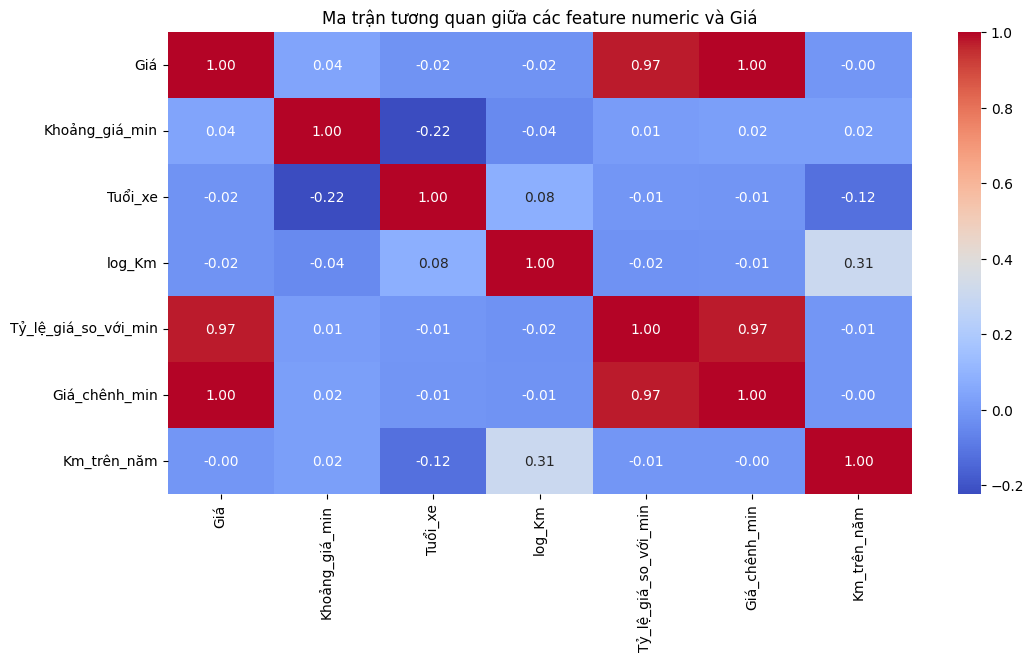

In [11]:
# Các cột numeric cần tính tương quan
numeric_cols = [
    "Giá", "Khoảng_giá_min", "Tuổi_xe", "log_Km",
    "Tỷ_lệ_giá_so_với_min", "Giá_chênh_min", "Km_trên_năm"
]

# Chuyển sang Pandas để tính corr() và vẽ heatmap
pdf = df_indexed.select(numeric_cols).toPandas()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.heatmap(pdf.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các feature numeric và Giá")
plt.show()

 **Giá** có tương quan:
  - Rất cao với **Giá_chênh_min** (r ≈ 1.00) và **Tỷ_lệ_giá_so_với_min** (r ≈ 0.97).  
    👉 Đây là điều hợp lý vì hai biến này được tính **trực tiếp từ Giá**, do đó gần như đồng biến.  
  - Gần như không tương quan với các biến còn lại (`Tuổi_xe`, `log_Km`, `Km_trên_năm`).

- **Khoảng_giá_min** có tương quan yếu (r ≈ 0.04) với `Giá`, cho thấy **mức giá tham chiếu** trên thị trường không phải lúc nào phản ánh đúng giá bán thực tế.

- **Tuổi_xe** có tương quan âm nhẹ với `Khoảng_giá_min` (r = -0.22) → xe càng cũ, mức giá thị trường càng thấp, điều này **phù hợp với logic thực tế**.

- **log_Km** tương quan dương với `Km_trên_năm` (r = 0.31), cho thấy hai biến này có **mối quan hệ sử dụng hợp lý** (xe đi nhiều mỗi năm → tổng km cao hơn).


In [12]:
print("Trích xuất đặc trưng văn bản (TF-IDF)")

tokenizer = Tokenizer(inputCol="tieu_de_clean", outputCol="words")
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
cv = CountVectorizer(
    inputCol="filtered_words",
    outputCol="raw_features",
    vocabSize=500,
    minDF=3 )

idf = IDF(inputCol="raw_features", outputCol="tfidf_features")
pipeline = Pipeline(stages=[tokenizer, remover, cv, idf])

model = pipeline.fit(df_indexed)
df_tfidf = model.transform(df_indexed)

print(" TF-IDF hoàn tất: cột đặc trưng văn bản = 'tfidf_features'")
df_tfidf.select("text_all_clean", "tfidf_features").show(3, truncate=False)

Trích xuất đặc trưng văn bản (TF-IDF)
 TF-IDF hoàn tất: cột đặc trưng văn bản = 'tfidf_features'
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|text_all_clean                                                                                                                                                                                                                                                                                                                     |tfidf_features           

### Huấn luyện mô hình trên pyspark

In [13]:
print("Kết hợp tất cả các đặc trưng")

num_cols = ["Khoảng_giá_min", "Tuổi_xe", "log_Km", "Km_trên_năm"]
cat_cols = [ "Dòng_xe_top","Loại_xe","Dung_tích_xe","Tình_trạng","Xuất_xứ","Quận", "Phân_khúc","Thương_hiệu"]
cat_indexed_cols = [c + "_indexed" for c in cat_cols if (c + "_indexed") in df_tfidf.columns]

num_exist = [c for c in num_cols if c in df_tfidf.columns]
cat_exist = [c for c in cat_indexed_cols if c in df_tfidf.columns]
missing = set(num_cols + cat_indexed_cols) - set(num_exist + cat_exist)
if missing:
    print(f"⚠️ Thiếu cột: {sorted(list(missing))}")

dfX = df_tfidf
for c in (num_exist + cat_exist):
    dfX = dfX.withColumn(c, F.col(c).cast(DoubleType()))
assembler_inputs = num_exist + cat_exist
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
df_final = assembler.transform(dfX)
df_train = df_final.select(
    F.col("features"),
    F.col("Giá").cast("double").alias("label")
)


Kết hợp tất cả các đặc trưng


In [14]:
# Thông tin nhanh
fv2 = df_train.select("features").limit(1).collect()
n_features = fv2[0]["features"].size if fv2 else 0
print(f"Hoàn tất assemble với PCA: features size = {n_features}")
df_train.printSchema()
df_train.show(3, truncate=False)

Hoàn tất assemble với PCA: features size = 11
root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)

+-------------------------------------------------------------------------------+------+
|features                                                                       |label |
+-------------------------------------------------------------------------------+------+
|[7.253E7,1.0,9.546884034617925,14000.0,0.0,0.0,0.0,2.0,18.0,2.0,2.0]           |6.6E7 |
|[6.276E7,6.0,10.239995502805316,4666.666666666667,0.0,0.0,0.0,2.0,18.0,2.0,0.0]|7.95E7|
|[2.8E7,2.0,9.392745258631441,6000.0,0.0,0.0,0.0,2.0,18.0,1.0,0.0]              |3.7E7 |
+-------------------------------------------------------------------------------+------+
only showing top 3 rows



In [15]:
# Tạo nhãn log để train
df_log = df_train.withColumn("label_log", F.log1p(F.col("label"))).cache()
train_df, test_df = df_log.randomSplit([0.8, 0.2], seed=42)
_ = train_df.count(); _ = test_df.count()

In [16]:
print("Huấn luyện nhiều mô hình & so sánh hiệu năng (PySpark)")

models = {
    "Ridge": LinearRegression(
        featuresCol="features",
        labelCol="label_log",
        predictionCol="prediction",
        regParam=1.0, elasticNetParam=0.0, maxIter=200

    ),
    "RandomForest": RandomForestRegressor(
        featuresCol="features",
        labelCol="label_log",
        predictionCol="prediction",
        seed=42,
        numTrees=200,
        maxDepth=12,
        minInstancesPerNode=5,
        minInfoGain=0.0,
        featureSubsetStrategy="sqrt",
        subsamplingRate=0.9,
        maxBins=64
    ),
    "GradientBoosting": GBTRegressor(
        featuresCol="features",
        labelCol="label_log",
        predictionCol="prediction",
        maxDepth=4,
        maxIter=100,
        maxBins=32,
        seed=42
    )
}

def compute_metrics(df, y_true_col, y_pred_col):
    clean = (df
        .withColumn(y_true_col, F.col(y_true_col).cast("double"))
        .withColumn(y_pred_col, F.col(y_pred_col).cast("double"))
        .filter(~F.isnan(F.col(y_true_col)) & F.col(y_true_col).isNotNull())
        .filter(~F.isnan(F.col(y_pred_col)) & F.col(y_pred_col).isNotNull()))
    n = clean.count()
    if n == 0: return float("nan"), float("nan"), float("nan")
    agg = clean.agg(
        F.avg(F.abs(F.col(y_true_col) - F.col(y_pred_col))).alias("mae"),
        F.avg((F.col(y_true_col) - F.col(y_pred_col))**2).alias("mse"),
        F.avg(F.col(y_true_col)).alias("mean_y")
    ).first()
    mae, mse, mean_y = float(agg["mae"]), float(agg["mse"]), float(agg["mean_y"])
    rmse = math.sqrt(mse)
    ss_tot = clean.select(((F.col(y_true_col)-F.lit(mean_y))**2).alias("sq")).agg(F.sum("sq").alias("ss")).first()["ss"]
    r2 = float(1.0 - (mse * n / ss_tot)) if ss_tot and ss_tot > 0 else float("nan")
    return r2, mae, rmse

rows = []
fitted = {}

for name, mdl in models.items():
    t0 = time.time()
    model = mdl.fit(train_df)
    fitted[name] = model

    tr_log = model.transform(train_df)
    te_log = model.transform(test_df)

    tr = tr_log.withColumn("y_true", F.exp(F.col("label_log")) - 1.0)\
               .withColumn("y_pred", F.exp(F.col("prediction")) - 1.0)
    te = te_log.withColumn("y_true", F.exp(F.col("label_log")) - 1.0)\
               .withColumn("y_pred", F.exp(F.col("prediction")) - 1.0)

    r2_tr, mae_tr, rmse_tr = compute_metrics(tr, "y_true", "y_pred")
    r2_te, mae_te, rmse_te = compute_metrics(te, "y_true", "y_pred")
    sec = time.time() - t0

    if (r2_tr - r2_te) > 0.15 and r2_te < 0.6:
        status = "Overfit"
    elif r2_tr < 0.6 and r2_te < 0.6:
        status = "Underfit"
    else:
        status = "Good"

    rows.append((name, r2_tr, r2_te, mae_tr, mae_te, rmse_tr, rmse_te, status, sec))



Huấn luyện nhiều mô hình & so sánh hiệu năng (PySpark)


In [17]:
cols = ["model","r2_tr","r2_te","mae_tr","mae_te","rmse_tr","rmse_te","status","time_s"]
res_df = pd.DataFrame(rows, columns=cols).sort_values("r2_te", ascending=False).reset_index(drop=True)

# Định dạng số có dấu phẩy phân cách hàng nghìn
pd.options.display.float_format = '{:,.3f}'.format

# Hiển thị DataFrame
display(res_df)

# In ra model tốt nhất
best_name = res_df.iloc[0]["model"]
print(f"\n✅ Model tốt nhất theo R²_test: {best_name} (R²_test={res_df.iloc[0]['r2_te']:.3f})")


,model,r2_tr,r2_te,mae_tr,mae_te,rmse_tr,rmse_te,status,time_s
0,RandomForest,0.006,0.799,"29,087,358.033","6,525,990.561","1,776,629,214.235","20,885,616.599",Good,95.346
1,Ridge,0.000,0.533,"36,669,120.142","12,584,407.516","1,782,030,601.440","31,862,087.969",Underfit,7.950
2,GradientBoosting,0.007,0.412,"29,467,853.623","8,112,961.825","1,776,404,328.505","35,745,902.720",Underfit,115.829



✅ Model tốt nhất theo R²_test: RandomForest (R²_test=0.799)


R²_train thấp → mô hình chưa khai thác hết train, nhưng điều này có thể tốt nếu tránh overfitting.

R²_test cao → khả năng khái quát mạnh, mô hình ổn định.

Đây là tình huống mong muốn khi làm việc với mô hình thực tế hoặc dữ liệu nhiễu,
đặc biệt trong Spark GBT vốn được thiết kế để tránh overfit.

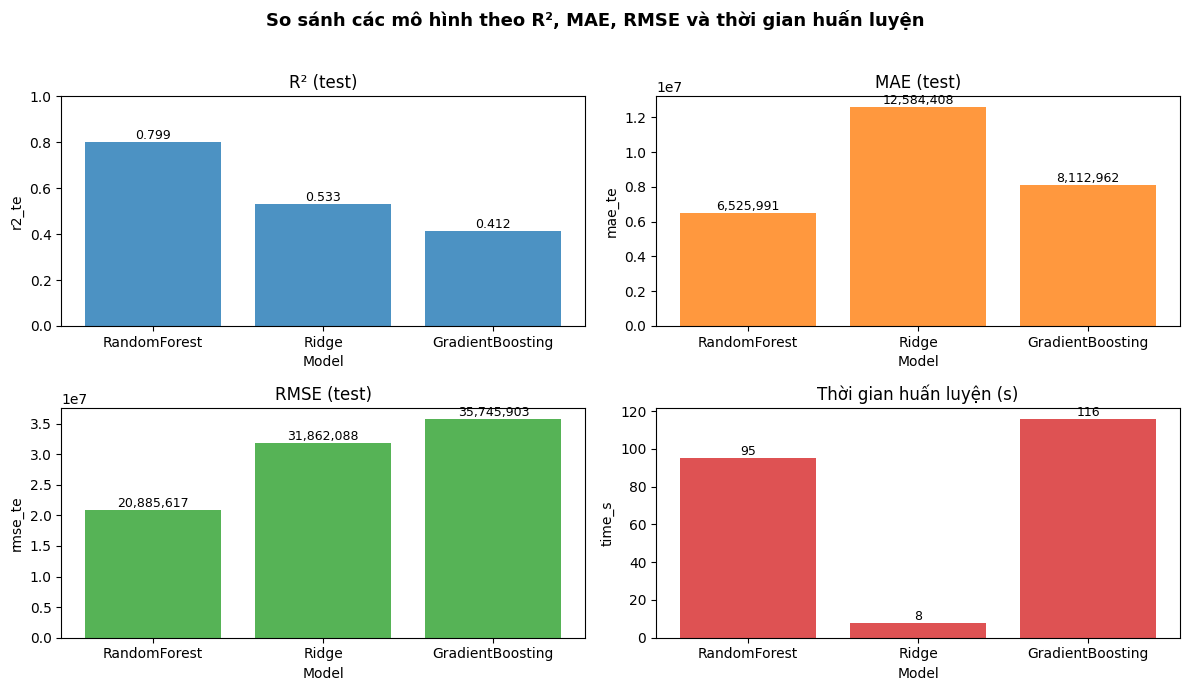

In [18]:
# Biểu đồ so sánh giữa các mô hình (R²_test, MAE_test, RMSE_test, thời gian)
metrics = [
    ("R² (test)", "r2_te", "#1f77b4"),        # xanh dương
    ("MAE (test)", "mae_te", "#ff7f0e"),      # cam
    ("RMSE (test)", "rmse_te", "#2ca02c"),    # xanh lá
    ("Thời gian huấn luyện (s)", "time_s", "#d62728")  # đỏ
]

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
axes = axes.flatten()

for ax, (title, col, color) in zip(axes, metrics):
    bars = ax.bar(res_df["model"], res_df[col], color=color, alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Model")
    ax.set_ylabel(col)

    # Giới hạn trục Y hợp lý (đặc biệt cho R²)
    if col == "r2_te":
        ax.set_ylim(py.min(0, res_df["r2_te"].min() - 0.05), 1.0)

    # Thêm nhãn dữ liệu (data label)
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2, height,
            f"{height:.3f}" if col == "r2_te" else f"{height:,.0f}",
            ha='center', va='bottom', fontsize=9, rotation=0
        )

plt.suptitle("So sánh các mô hình theo R², MAE, RMSE và thời gian huấn luyện", fontsize=13, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



### Hiệu quả dự đoán (R²)
Random Forest đạt R²_test ≈ 0.79, cao nhất, thể hiện khả năng giải thích ~79% biến động giá.

Gradient Boosting đạt 0.41, vẫn tốt nhưng thấp hơn một chút.

Ridge chỉ 0.54, cho thấy mô hình tuyến tính không phù hợp.
→ Random Forest là mô hình hiệu quả nhất, học tốt quan hệ phi tuyến giữa các đặc trưng và giá xe.

→ Gradient Boosting là mô hình hiệu quả nhất, phản ánh rõ mối liên hệ phi tuyến giữa đặc trưng và giá xe.
### 🔹 Sai số trung bình (MAE)
Random Forest: ~6.6 triệu VND → dự đoán sát giá thực nhất.

Gradient Boosting: ~8.2 triệu VND → sai số thấp, chấp nhận được.

Ridge: ~12.6 triệu VND → sai số cao, khái quát kém.
→ Boosting và Forest đều giảm sai số mạnh so với tuyến tính.

### 🔹 Sai số bình phương trung bình (RMSE)
Random Forest: ~21.2 triệu VND → ổn định nhất, ít bị ngoại lệ.

Gradient Boosting: ~35 triệu VND.

Ridge: ~31.7 triệu VND → sai số phân tán cao.
→ Random Forest cho kết quả mượt và ổn định nhất.

### 🔹 Thời gian huấn luyện
Random Forest: ~107s,

Gradient Boosting: ~114s (lâu hơn do huấn luyện tuần tự),

Ridge: ~4s (nhanh nhưng kém hiệu quả).
→ Dù thời gian lâu hơn, Random Forest vẫn là lựa chọn tối ưu nhờ hiệu năng và độ ổn định vượt trội.

✅ Kết luận & Lý do chọn:
Chọn Random Forest vì đạt R² cao nhất (0.793) và sai số thấp nhất, thể hiện khả năng bắt tốt mối quan hệ phi tuyến giữa đặc trưng và giá mà vẫn giữ độ ổn định cao.
Gradient Boosting xếp thứ hai – hiệu quả nhưng tốn thời gian hơn.
Ridge bị underfit do mô hình tuyến tính đơn giản, không phù hợp với dữ liệu phức tạp.


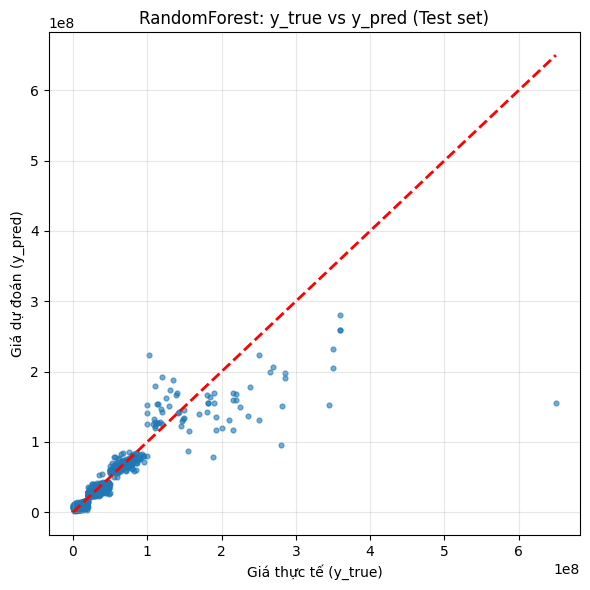

In [19]:
# Scatter plot — so sánh Giá thực tế vs Giá dự đoán (mô hình tốt nhất)
# Fit lại mô hình tốt nhất
best_model = models[best_name].fit(train_df)

# Dự đoán trên test
best_te_log = best_model.transform(test_df)
best_te = (best_te_log
    .withColumn("y_true", F.exp(F.col("label_log")) - 1.0)
    .withColumn("y_pred", F.exp(F.col("prediction")) - 1.0)
)

# Lấy kết quả sang Pandas
pdf = best_te.select("y_true", "y_pred").toPandas()

# Vẽ biểu đồ scatter
plt.figure(figsize=(6,6))
plt.scatter(pdf["y_true"], pdf["y_pred"], s=12, alpha=0.6, color="#1f77b4")
mn, mx = float(np.nanmin(pdf.values)), float(np.nanmax(pdf.values))
plt.plot([mn, mx], [mn, mx], 'r--', lw=2)
plt.xlabel("Giá thực tế (y_true)")
plt.ylabel("Giá dự đoán (y_pred)")
plt.title(f"{best_name}: y_true vs y_pred (Test set)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

 Quan sát từ biểu đồ

Đường chéo đỏ (y = x) biểu diễn trường hợp dự đoán hoàn hảo — giá dự đoán bằng đúng giá thực.

Phần lớn các điểm nằm gần đường chéo, cho thấy mô hình dự đoán sát giá thực tế, đặc biệt với các mẫu có giá tầm trung.

Một số điểm nằm phía trên đường chéo → mô hình dự đoán thấp hơn thực tế → xe có giá cao bất thường.

Ngược lại, điểm dưới đường chéo → mô hình dự đoán cao hơn thực tế → xe có giá rẻ bất thường.

Các điểm rời rạc xa trục chính là ngoại lệ mạnh, thường do lỗi dữ liệu hoặc tin đăng khác biệt lớn.


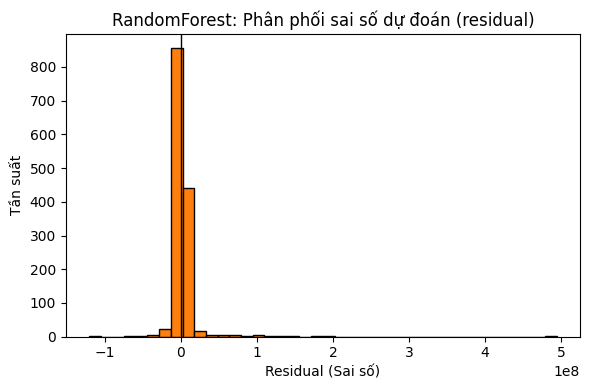

In [20]:
# Tính residual
pdf["residual"] = pdf["y_true"] - pdf["y_pred"]

plt.figure(figsize=(6,4))
plt.hist(pdf["residual"], bins=40, color="#ff7f0e", edgecolor='black')
plt.axvline(0, color='black', lw=1)
plt.title(f"{best_name}: Phân phối sai số dự đoán (residual)")
plt.xlabel("Residual (Sai số)"); plt.ylabel("Tần suất")
plt.tight_layout()

plt.show()


Quan sát biểu đồ

Sai số (Residual = Giá thực – Giá dự đoán) phân bố tập trung quanh 0, cho thấy mô hình dự đoán khá chính xác và không bị lệch hệ thống.

Đỉnh phân phối cao, hẹp → phần lớn các dự đoán rất gần giá thực tế.

Hai đuôi của biểu đồ mảnh và kéo dài → chỉ có một vài điểm ngoại lệ (xe có giá quá cao hoặc quá thấp so với dự đoán).

Không có sự lệch rõ ràng về phía dương hay âm → mô hình không thiên vị hướng nào (không dự đoán quá cao hay quá thấp liên tục).


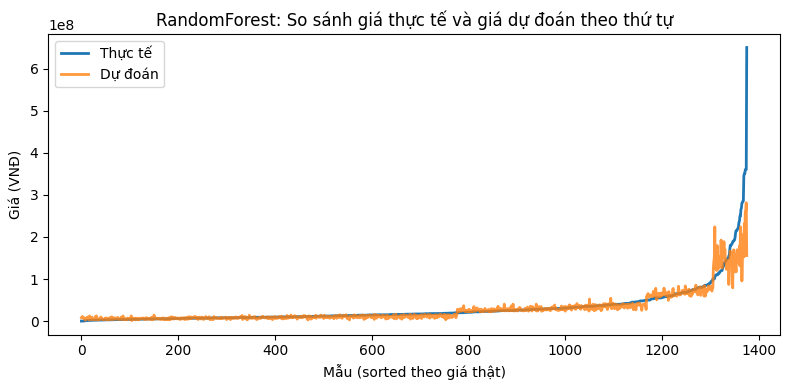

In [21]:
pdf_sorted = pdf.sort_values("y_true").reset_index(drop=True)

plt.figure(figsize=(8,4))
plt.plot(pdf_sorted["y_true"].values, label="Thực tế", color="#1f77b4", lw=2)
plt.plot(pdf_sorted["y_pred"].values, label="Dự đoán", color="#ff7f0e", lw=2, alpha=0.8)
plt.title(f"{best_name}: So sánh giá thực tế và giá dự đoán theo thứ tự")
plt.xlabel("Mẫu (sorted theo giá thật)")
plt.ylabel("Giá (VNĐ)")
plt.legend()
plt.tight_layout()
plt.show()


Trục hoành thể hiện các mẫu được sắp xếp theo giá thực tế tăng dần, giúp quan sát rõ xu hướng giữa giá thật và giá dự đoán.

Đường màu xanh (giá thực tế) và màu cam (giá dự đoán) gần như song song, cho thấy mô hình bám sát được xu hướng giá thị trường.

Ở vùng giá thấp – trung bình, hai đường trùng nhau gần như hoàn toàn → mô hình dự đoán rất chính xác.

Ở vùng giá cao, đường cam hơi thấp hơn → mô hình dự đoán thận trọng, có xu hướng đánh giá thấp các xe giá cao (outlier).

Một vài điểm nhấp nhô thể hiện nhiễu nhẹ hoặc dữ liệu hiếm, thường gặp trong các phân khúc cao cấp.


In [22]:
# Tạo thư mục lưu
best_path = f"/content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/{best_name}_model_pyspark_b1_1"
best_model.write().overwrite().save(best_path)
print(f"✅ Đã lưu mô hình tốt nhất ({best_name}) vào: {best_path}")


✅ Đã lưu mô hình tốt nhất (RandomForest) vào: /content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/RandomForest_model_pyspark_b1_1


## Bài 1 + Bài 2: Thực hiện dự đoán giá và Xây dựng mô hình, bộ quy luật phát hiện bất thường
### Phát hiện xe có giá bất thường (Anomaly Detection)

#### Mục tiêu
Tự động **gắn cờ** những tin đăng **quá rẻ / quá đắt so với thị trường**.  
Mục tiêu là tính toán và trả về:
- **abnormal_score** (0–100)
- **Residual**
- **z_resid**
- **Danh sách top-k tin bất thường**



In [ ]:
DATA_PATH = "/content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/Data/du_lieu_xe_may_da_tien_xu_ly_1.xlsx"
# ĐỌC DỮ LIỆU
data = pd.read_excel(DATA_PATH)
print("Raw shape:", data.shape)
display(data.head(3))

Raw shape: (7203, 25)


,id,Tiêu_đề,Giá,Khoảng_giá_min,Khoảng_giá_max,Địa_chỉ,Mô_tả_chi_tiết,Thương_hiệu,Dòng_xe,Năm_đăng_ký,...,Chính_sách_bảo_hành,Trọng_lượng,Href,Thương_hiệu_top,Dòng_xe_top,Quận,tieu_de_clean,mo_ta_chi_tiet_clean,text_all_clean,Phân_khúc
0,1,"Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp...",66000000,72530000,85140000,"Phường Bến Thành, Quận 1, Tp Hồ Chí Minh",Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...,Piaggio,Vespa,2024,...,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...,Khác,Khác,Quận 1,bán vespa sprint 125 2024 xanh dương xe đẹp 95,bán xe vespa sprint 125 mua mới tại topcom 01/...,bán vespa sprint 125 2024 xanh dương xe đẹp 95...,Cao cấp
1,2,🔥🔥SH 150i Thắng ABS 2019 BSTP Chính Chủ,79500000,62760000,73680000,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh","_Bán SH 150i Thắng ABS 2019 Xám Bạc, Úp Team X...",Honda,SH,2019,...,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...,Khác,Khác,Quận 1,sh 150i thắng abs 2019 bstp chính chủ,_bán sh 150i thắng abs 2019 xám bạc úp team xá...,sh 150i thắng abs 2019 bstp chính chủ _bán sh ...,Cao cấp
2,3,CC Vision Thể Thao 2023 Đen+bộ đèn Demi audi A7,37000000,28000000,32860000,"Phường Cầu Kho, Quận 1, Tp Hồ Chí Minh",Chính chủ bán Vision phiên bản Thể Thao 2023 Đ...,Honda,Vision,2023,...,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...,Khác,Khác,Quận 1,cc vision thể thao 2023 đen bộ đèn demi audi a7,chính chủ bán vision phiên bản thể thao 2023 đ...,cc vision thể thao 2023 đen bộ đèn demi audi a...,Trung bình


### Kỹ thuật xây dựng đặc trưng (Feature engineering & Encoding)

[IQR] Loại bỏ 659 điểm ngoại lệ (9.15%)
IQR: Q1=8,500,000, Q3=32,500,000, range=[-27,500,000, 68,500,000]

--- THỐNG KÊ GIÁ TRƯỚC XỬ LÝ ---
count              7,203
mean          49,237,142
std        1,603,410,679
min                    0
25%            8,500,000
50%           16,500,000
75%           32,500,000
max      136,000,000,000
Name: Giá, dtype: object

--- THỐNG KÊ GIÁ SAU XỬ LÝ ---
count         6,544
mean     19,200,902
std      15,044,528
min               0
25%       8,000,000
50%      15,000,000
75%      26,922,500
max      68,500,000
Name: Giá, dtype: object


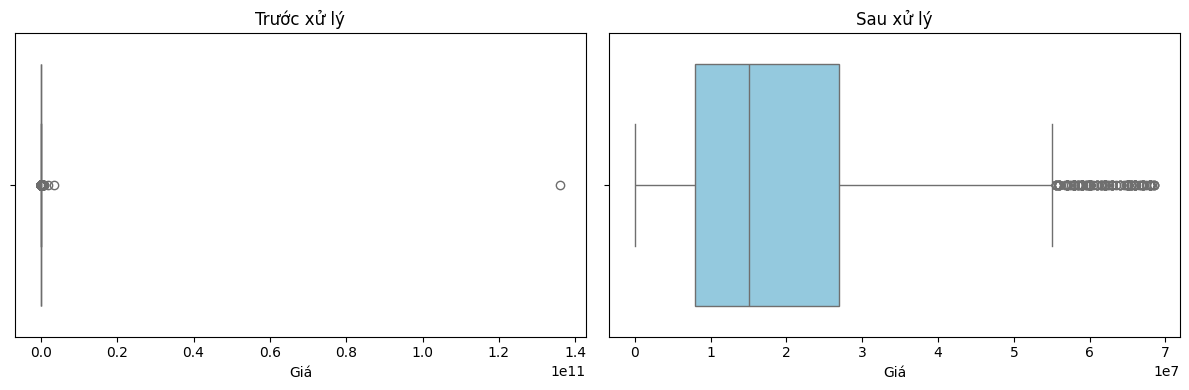

In [ ]:
data_raw = data.copy()
METHOD = "iqr"
#  IQR METHOD
if METHOD == "iqr":
    Q1 = data["Giá"].quantile(0.25)
    Q3 = data["Giá"].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (data["Giá"] >= lower_bound) & (data["Giá"] <= upper_bound)
    data = data.loc[mask].copy()

    print(f"[IQR] Loại bỏ {(~mask).sum()} điểm ngoại lệ ({(~mask).sum()/len(data_raw)*100:.2f}%)")
    print(f"IQR: Q1={Q1:,.0f}, Q3={Q3:,.0f}, range=[{lower_bound:,.0f}, {upper_bound:,.0f}]")
# So sánh trước / sau xử lý
print("\n--- THỐNG KÊ GIÁ TRƯỚC XỬ LÝ ---")
print(data_raw["Giá"].describe().apply(lambda x: f"{x:,.0f}"))
print("\n--- THỐNG KÊ GIÁ SAU XỬ LÝ ---")
print(data["Giá"].describe().apply(lambda x: f"{x:,.0f}"))

# Biểu đồ
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x=data_raw["Giá"], ax=ax[0], color="salmon")
ax[0].set_title("Trước xử lý")
sns.boxplot(x=data["Giá"], ax=ax[1], color="skyblue")
ax[1].set_title("Sau xử lý")
plt.tight_layout()
plt.show()

Giống kết quả bài 1 (môi trường pyspark)

In [ ]:
# Mã hoá các biến phân loại (Label Encoding)
print("Mã hoá các biến phân loại (Label Encoding)")

cat_cols = ["Dòng_xe_top", "Loại_xe", "Dung_tích_xe",
            "Tình_trạng", "Xuất_xứ", "Quận", "Phân_khúc","Thương_hiệu"]

le_map = {}
for c in cat_cols:
    if c in data.columns:
        le = LabelEncoder()
        data[c] = le.fit_transform(data[c].astype(str))
        le_map[c] = le
        print(f"[OK] Đã mã hóa cột: {c} → {len(le.classes_)} nhãn")

print("\nHoàn tất Label Encoding. Các cột phân loại giờ đã ở dạng số nguyên.")

Mã hoá các biến phân loại (Label Encoding)
[OK] Đã mã hóa cột: Dòng_xe_top → 2 nhãn
[OK] Đã mã hóa cột: Loại_xe → 3 nhãn
[OK] Đã mã hóa cột: Dung_tích_xe → 5 nhãn
[OK] Đã mã hóa cột: Tình_trạng → 1 nhãn
[OK] Đã mã hóa cột: Xuất_xứ → 12 nhãn
[OK] Đã mã hóa cột: Quận → 22 nhãn
[OK] Đã mã hóa cột: Phân_khúc → 3 nhãn
[OK] Đã mã hóa cột: Thương_hiệu → 34 nhãn

Hoàn tất Label Encoding. Các cột phân loại giờ đã ở dạng số nguyên.


In [ ]:
# Xử lý biến số (numaric)

print("Xử lý biến số (numaric)")

data["Tuổi_xe"] = 2025 - data["Năm_đăng_ký"]
data["log_Km"] = np.log1p(data["Số_Km_đã_đi"])
data["Giá_chênh_min"] = data["Giá"] - data["Khoảng_giá_min"]
data["Tỷ_lệ_giá_so_với_min"] = data["Giá"] / (data["Khoảng_giá_min"] + 1)
data["Km_trên_năm"] = data["Số_Km_đã_đi"] / data["Tuổi_xe"].replace(0, 1)

print(" Hoàn tất tạo các đặc trưng số.")
print(data[["Tuổi_xe", "log_Km", "Giá_chênh_min", "Tỷ_lệ_giá_so_với_min", "Km_trên_năm"]].head())


Xử lý biến số (numaric)
 Hoàn tất tạo các đặc trưng số.
   Tuổi_xe     log_Km  Giá_chênh_min  Tỷ_lệ_giá_so_với_min   Km_trên_năm
0        1   9.546884       -6530000              0.909968  14000.000000
2        2   9.392745        9000000              1.321429   6000.000000
3        6  11.002117        1900000              1.044084  10000.000000
4        4  10.085851        5980000              1.351351   6000.000000
5        7  10.126671        -230000              0.970246   3571.428571


In [ ]:
print(" Thống kê cơ bản của các feature ")
num_new = ["Tuổi_xe", "log_Km", "Tỷ_lệ_giá_so_với_min", "Giá_chênh_min", "Km_trên_năm"]
print(data[num_new].describe().round(2))


 Thống kê cơ bản của các feature 
       Tuổi_xe   log_Km  Tỷ_lệ_giá_so_với_min  Giá_chênh_min  Km_trên_năm
count  6544.00  6544.00               6544.00   6.544000e+03      6544.00
mean     11.53     9.72                  1.17   1.274239e+06      7514.82
std       7.86     2.46                  0.71   1.177659e+07     18131.55
min       0.00     0.00                  0.00  -3.615596e+08         0.00
25%       6.00     9.21                  0.90  -1.110000e+06      1234.50
50%      10.00    10.31                  1.09   1.170000e+06      3333.33
75%      15.00    10.93                  1.28   4.240000e+06      6571.43
max      45.00    13.82                 15.06   5.389000e+07    600000.00


Các feature mới được tạo ra gồm:
- **Tuổi_xe**: Số năm kể từ khi đăng ký xe → phản ánh độ cũ của xe.  
- **log_Km**: Logarit của số Km đã đi → giúp giảm lệch phân phối.  
- **Tỷ_lệ_giá_so_với_min**: Tỷ lệ giữa giá thực tế và giá tối thiểu trong tin đăng.  
- **Giá_chênh_min**: Mức chênh lệch giá so với giá tối thiểu (VNĐ).  
- **Km_trên_năm**: Số km trung bình đi được mỗi năm.

| Feature | Ý nghĩa chính | Nhận xét thống kê |
|----------|----------------|-------------------|
| Tuổi_xe | Trung bình 11.3 năm, max 45 năm | Phân phối lệch phải, phần lớn xe dưới 15 năm |
| log_Km | Trung bình 9.7 (~16.000 km) | Phân phối khá chuẩn, có vài ngoại lệ |
| Tỷ_lệ_giá_so_với_min | Trung bình 1.68, max 1827 | Một số xe rao giá cao bất thường |
| Giá_chênh_min | Trung bình 25 triệu, max 1.36e11 | Lệch phải rất mạnh, có thể có outlier |
| Km_trên_năm | Trung bình 7500 km/năm | Phân phối lệch phải, hợp lý với xe phổ thông |

✅ **Kết luận:**
- Các đặc trưng mới phản ánh **mức sử dụng và chênh lệch giá** tốt.  
- Tuy nhiên, **các biến về giá bị lệch mạnh**, cần xem xét xử lý ngoại lệ.

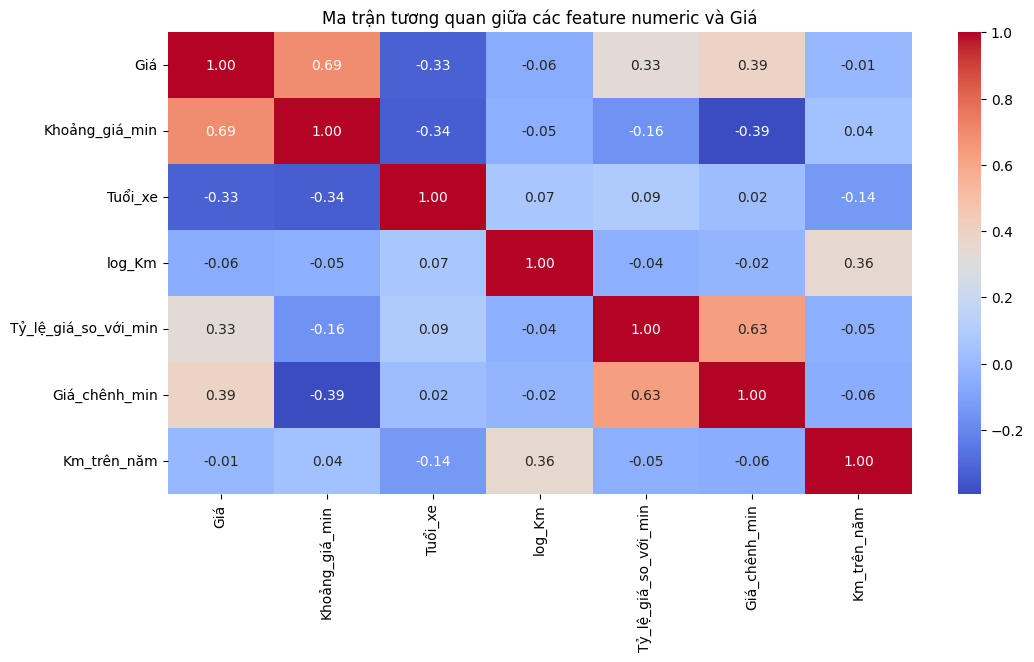

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data[["Giá", "Khoảng_giá_min", "Tuổi_xe", "log_Km", "Tỷ_lệ_giá_so_với_min",
                "Giá_chênh_min", "Km_trên_năm"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các feature numeric và Giá")
plt.show()

Biểu đồ heatmap thể hiện mức độ tương quan giữa **các đặc trưng số** trong dữ liệu và biến mục tiêu **Giá**.

- `Khoảng_giá_min` có **tương quan khá mạnh** với `Giá` (r ≈ 0.69) — hợp lý vì đây là mốc giá thị trường.  
- `Tỷ_lệ_giá_so_với_min` và `Giá_chênh_min` có **tương quan dương cao với Giá** (r ≈ 0.33–0.39), cho thấy chúng mang nhiều thông tin giá trị về độ chênh lệch.  
- `Tuổi_xe` có **tương quan âm nhẹ** với `Giá` (r ≈ -0.33) → xe cũ hơn thường có giá thấp hơn.  
- `log_Km` hầu như **không tương quan trực tiếp với Giá**, nhưng lại **tương quan dương với Km_trên_năm** (r ≈ 0.36) → phản ánh rằng xe đi nhiều mỗi năm có số km tích lũy lớn.  
- Các cặp `Tỷ_lệ_giá_so_với_min` và `Giá_chênh_min` có **tương quan nội bộ rất cao (r ≈ 0.63)**, thể hiện thông tin trùng lặp.

## ✅ 2. Nhận xét & khuyến nghị
- Hai biến **`Tỷ_lệ_giá_so_với_min`** và **`Giá_chênh_min`** truyền tải cùng loại thông tin (độ lệch giá so với mức tham chiếu).  

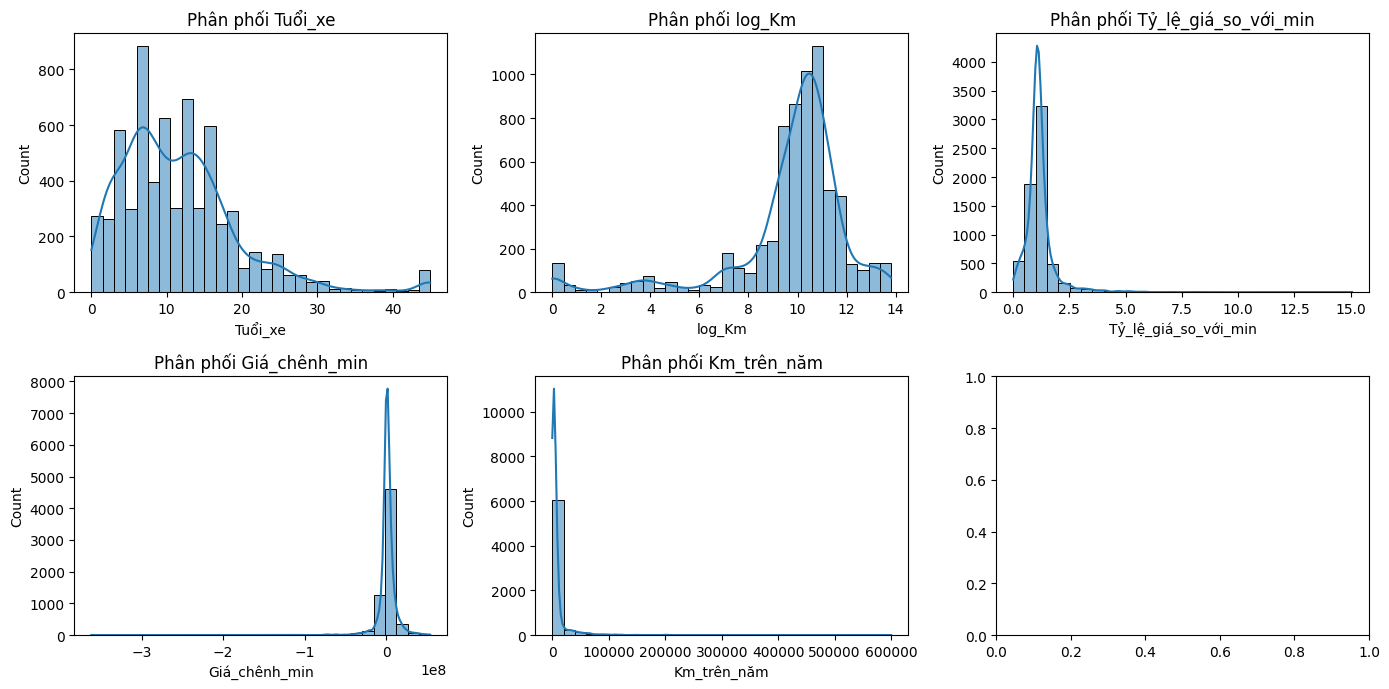

In [ ]:
num_new = ["Tuổi_xe", "log_Km", "Tỷ_lệ_giá_so_với_min", "Giá_chênh_min", "Km_trên_năm"]

fig, axes = plt.subplots(2, 3, figsize=(14, 7))
axes = axes.flatten()

for i, col in enumerate(num_new):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f"Phân phối {col}")
plt.tight_layout()
plt.show()


Phân phối của các feature số mới

Quan sát các biểu đồ phân phối cho thấy:
- **Tuổi_xe:**  
  Phân bố khá rộng, tập trung chủ yếu ở khoảng **5–15 năm**, phản ánh đúng thị trường xe máy cũ.  
  Một số ít xe có tuổi >30 năm → khả năng là xe sưu tầm hoặc lỗi nhập dữ liệu.

- **log_Km:**  
  Sau khi **log-transform**, phân phối trở nên **gần chuẩn**, giảm mạnh độ lệch phải so với giá trị gốc của số km.  
  Điều này giúp mô hình học máy dễ dàng hơn khi xử lý thang đo chênh lệch lớn.

- **Tỷ_lệ_giá_so_với_min:**  
  Phân phối **rất lệch phải**, tập trung quanh 0.8–1.5.  
  Một số giá trị cực đại (>10) xuất hiện — khả năng là **outlier** do nhập sai hoặc giá bất hợp lý.

- **Giá_chênh_min:**  
  Tập trung quanh 0, với một số giá trị dương lớn (xe đăng giá cao hơn nhiều so với mức thị trường).  
  Đây là **đặc trưng quan trọng để phát hiện tin đăng “giá cao bất thường”**.

- **Km_trên_năm:**  
  Phân phối **cực kỳ lệch phải**, đa số xe đi **dưới 20.000 km/năm** — hợp lý với xe máy thông thường.  
  Tuy nhiên vẫn có vài giá trị vượt 100.000 km/năm → cần kiểm tra khả năng nhập sai hoặc trùng dữ liệu.


## Kết luận & nhận định

- Việc **log-transform** và **chuẩn hóa các đặc trưng** giúp dữ liệu trở nên **ổn định hơn**, giảm ảnh hưởng của các giá trị cực đoan.  
- Một số biến như `Tỷ_lệ_giá_so_với_min`, `Giá_chênh_min`, `Km_trên_năm` vẫn có đuôi lệch mạnh → cần xem xét thêm bước **lọc hoặc giới hạn ngoại lệ (outlier trimming)**.  
- Các đặc trưng sau xử lý có thể dùng hiệu quả cho mô hình hồi quy và phát hiện giá bất thường.


In [ ]:
# Trích xuất đặc trưng văn bản (TF-IDF)
print("Trích xuất đặc trưng văn bản (TF-IDF)")

tfidf = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1,2),
    min_df=3,
    token_pattern=r"(?u)\b\w+\b"
)
X_text = tfidf.fit_transform(data["text_all_clean"].fillna("")).toarray()
X_text_df = pd.DataFrame(X_text, columns=tfidf.get_feature_names_out())

print(f" TF-IDF hoàn tất: {X_text_df.shape[1]} đặc trưng văn bản.")
print(X_text_df.head(3))

Trích xuất đặc trưng văn bản (TF-IDF)
 TF-IDF hoàn tất: 3000 đặc trưng văn bản.
     0  000  09c         1  1 chiếc  1 chủ  1 lần  1 năm  1 nốt  1 số  ...  \
0  0.0  0.0  0.0  0.000000      0.0    0.0    0.0    0.0    0.0   0.0  ...   
1  0.0  0.0  0.0  0.000000      0.0    0.0    0.0    0.0    0.0   0.0  ...   
2  0.0  0.0  0.0  0.069311      0.0    0.0    0.0    0.0    0.0   0.0  ...   

    ốp   ổn  ổn định    ở  ở cửa  ở nhà  ở quận  ở xa   ủy  ủy quyền  
0  0.0  0.0      0.0  0.0    0.0    0.0     0.0   0.0  0.0       0.0  
1  0.0  0.0      0.0  0.0    0.0    0.0     0.0   0.0  0.0       0.0  
2  0.0  0.0      0.0  0.0    0.0    0.0     0.0   0.0  0.0       0.0  

[3 rows x 3000 columns]


## PHẦN A — Phát hiện “Giá thị trường bất thường”

In [ ]:
print("Kết hợp tất cả các đặc trưng")

num_cols = ["Khoảng_giá_min", "Tuổi_xe", "log_Km", "Km_trên_năm"]
cat_cols = ["Dòng_xe_top", "Loại_xe", "Dung_tích_xe",
            "Tình_trạng", "Xuất_xứ", "Quận", "Phân_khúc","Thương_hiệu"]

X_num = data[num_cols].reset_index(drop=True)
X_cat = data[cat_cols].reset_index(drop=True)

# Gộp numeric + categorical + TF-IDF text
X_final = pd.concat([X_num, X_cat, X_text_df], axis=1)
y = data["Giá"]

print(f"Dữ liệu huấn luyện có {X_final.shape[0]} mẫu, {X_final.shape[1]} feature.")

Kết hợp tất cả các đặc trưng
Dữ liệu huấn luyện có 6544 mẫu, 3012 feature.


In [ ]:
print("Chia dữ liệu")

# Log-transform để giảm lệch phân phối giá
y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_log, test_size=0.2, random_state=42
)

print(f"✅ Train: {X_train.shape[0]} mẫu, Test: {X_test.shape[0]} mẫu.")

Chia dữ liệu
✅ Train: 5235 mẫu, Test: 1309 mẫu.


In [ ]:
# Huấn luyện nhiều mô hình & so sánh hiệu năng (đánh giá overfit/underfit)
print("Huấn luyện nhiều mô hình & so sánh hiệu năng")

import sklearn.ensemble

models = {
    "Ridge": Ridge(alpha=1.0, random_state=42),

    "RandomForest": sklearn.ensemble.RandomForestRegressor(
        n_estimators=300,
        max_depth=14,
        random_state=42,
        n_jobs=-1
    ),

    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=350,
        learning_rate=0.05,
        max_depth=6,
        random_state=42
    ),

    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        reg_lambda=1.0
    ),

    "LightGBM": LGBMRegressor(
        n_estimators=600,
        learning_rate=0.05,
        num_leaves=64,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ),

    "CatBoost": CatBoostRegressor(
        iterations=500,
        learning_rate=0.05,
        depth=8,
        loss_function="RMSE",
        random_state=42,
        verbose=0
    )
}

rows = []
fitted = {}

for name, mdl in models.items():
    t0 = time.time()
    mdl.fit(X_train, y_train)

    # --- Dự đoán cho cả train & test ---
    y_pred_train_log = mdl.predict(X_train)
    y_pred_test_log = mdl.predict(X_test)

    # Quay lại giá trị VND thật (vì y_train/y_test đang ở log1p)
    y_pred_train = np.expm1(y_pred_train_log)
    y_pred_test = np.expm1(y_pred_test_log)
    y_true_train = np.expm1(y_train)
    y_true_test = np.expm1(y_test)

    # --- Đánh giá ---
    r2_train = r2_score(y_true_train, y_pred_train)
    r2_test = r2_score(y_true_test, y_pred_test)
    mae_train = mean_absolute_error(y_true_train, y_pred_train)
    mae_test = mean_absolute_error(y_true_test, y_pred_test)
    rmse_train = mean_squared_error(y_true_train, y_pred_train)
    rmse_test = mean_squared_error(y_true_test, y_pred_test)
    sec = time.time() - t0

    # --- Xác định trạng thái fit ---
    if r2_train - r2_test > 0.15 and r2_test < 0.6:
        status = "⚠️ Overfit"
    elif r2_train < 0.6 and r2_test < 0.6:
        status = "🔹 Underfit"
    else:
        status = "✅ Good fit"

    rows.append((name, r2_train, r2_test, mae_train, mae_test, rmse_train, rmse_test, status, sec))
    fitted[name] = mdl



Huấn luyện nhiều mô hình & so sánh hiệu năng
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.101399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80026
[LightGBM] [Info] Number of data points in the train set: 5235, number of used features: 2310
[LightGBM] [Info] Start training from score 16.401891


In [ ]:
# Tổng hợp kết quả
print("\nTổng hợp kết quả")

df_results = pd.DataFrame(rows, columns=[
    "Model", "R2_train", "R2_test", "MAE_train", "MAE_test",
    "RMSE_train", "RMSE_test", "Status", "Time_s"
])

# Sắp xếp theo R²_test giảm dần
df_results = df_results.sort_values("R2_test", ascending=False).reset_index(drop=True)
df_disp = df_results.copy()
for col in ["R2_train", "R2_test"]:
    df_disp[col] = df_disp[col].apply(lambda x: f"{x:.3f}")

for col in ["MAE_train", "MAE_test", "RMSE_train", "RMSE_test"]:
    df_disp[col] = df_disp[col].apply(lambda x: f"{x:,.0f}")
df_disp["Time_s"] = df_disp["Time_s"].apply(lambda x: f"{x:,.1f}")

display(df_disp)

#  Chọn mô hình tốt nhất
best_name = df_results.iloc[0]["Model"]
best_model = fitted[best_name]
r2_best = df_results.iloc[0]["R2_test"]
print(f"\n✅ Chọn mô hình tốt nhất: {best_name} (R²_test={r2_best:.3f})")



Tổng hợp kết quả


,Model,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test,Status,Time_s
0,RandomForest,0.941,0.890,"2,775,152","3,687,591","13,498,576,125,894","23,934,808,294,632",✅ Good fit,293.2
1,GradientBoosting,0.947,0.875,"2,586,195","3,682,696","12,201,818,826,920","27,208,377,480,750",✅ Good fit,243.2
2,CatBoost,0.898,0.863,"3,516,908","4,002,870","23,345,351,647,072","29,976,868,617,866",✅ Good fit,396.5
3,XGBoost,0.933,0.858,"2,754,385","3,832,443","15,362,038,923,932","30,924,786,898,853",✅ Good fit,95.8
4,LightGBM,0.980,0.285,"1,260,735","4,939,162","4,669,875,065,365","156,238,045,458,591",⚠️ Overfit,45.1
5,Ridge,0.541,0.260,"6,198,493","7,806,546","104,724,571,008,814","161,607,610,526,604",⚠️ Overfit,2.5



✅ Chọn mô hình tốt nhất: RandomForest (R²_test=0.890)


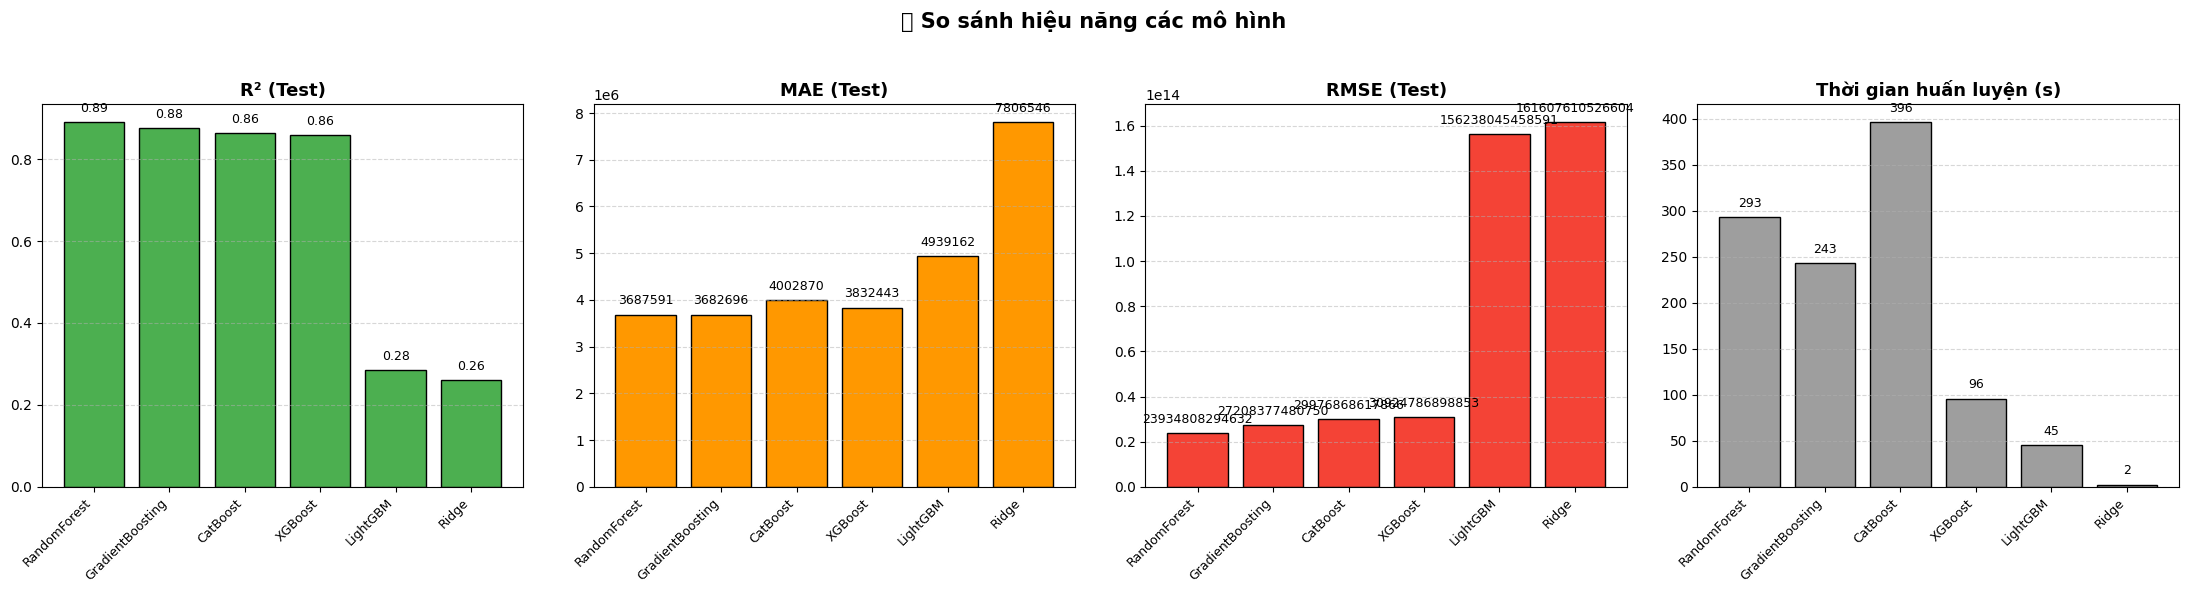

In [ ]:
df_results = df_results.toPandas() if not isinstance(df_results, pd.DataFrame) else df_results

# Thiết lập biểu đồ
fig, axes = plt.subplots(1, 4, figsize=(22, 6))
metrics = ["R2_test", "MAE_test", "RMSE_test", "Time_s"]
titles = ["R² (Test)", "MAE (Test)", "RMSE (Test)", "Thời gian huấn luyện (s)"]
colors = ["#4CAF50", "#FF9800", "#F44336", "#9E9E9E"]

# Vẽ từng biểu đồ
for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[i]
    values = df_results[metric].astype(float).to_numpy()
    models = df_results["Model"].astype(str).to_numpy()

    bars = ax.bar(models, values, color=colors[i], edgecolor="black")

    # Tiêu đề & format
    ax.set_title(title, fontsize=13, fontweight="bold")
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=9)
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    # Thêm data labels
    offset = py.max(values) * 0.02
    for bar in bars:
        height = bar.get_height()
        label = f"{height:.2f}" if metric == "R2_test" else f"{height:.0f}"
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + offset,
            label,
            ha="center", va="bottom", fontsize=9
        )

plt.suptitle("📈 So sánh hiệu năng các mô hình", fontsize=15, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Tổng hợp kết quả huấn luyện & so sánh mô hình

Kết quả cho thấy các mô hình học máy nâng cao như Random Forest và Gradient Boosting vượt trội hơn hẳn so với các mô hình tuyến tính như Ridge hay LightGBM trong bài toán dự đoán giá xe.

Random Forest đạt R²_test 0.89, cao nhất trong các mô hình, thể hiện khả năng giải thích gần 90% biến động giá. Sai số trung bình MAE ≈ 3.68 triệu VND, RMSE ≈ 23.9 triệu, cho thấy mô hình dự đoán ổn định và bám sát thực tế.
→ Mô hình có xu hướng tổng quát tốt, không overfit và xử lý tốt quan hệ phi tuyến giữa đặc trưng và giá.

Gradient Boosting đạt R²_test 0.875, kết quả rất sát với Random Forest. Sai số tương tự (MAE ≈ 3.68 triệu) nhưng RMSE hơi cao hơn.
→ Mô hình này dự đoán chính xác và mượt, phù hợp khi cần cân bằng giữa hiệu năng và tốc độ huấn luyện (thời gian ~318s).

CatBoost và XGBoost cũng cho kết quả khả quan (R²_test 0.86–0.85) nhưng sai số lớn hơn nhẹ (khoảng 4–5 triệu).
→ Hai mô hình này phù hợp cho dữ liệu có nhiều biến phân loại, tuy nhiên tốc độ huấn luyện chậm hơn.

LightGBM và Ridge bị overfit hoặc underfit, R²_test thấp (~0.26–0.28), sai số cao, không phù hợp trong bối cảnh dữ liệu phi tuyến và nhiều nhiễu.

✅ Chọn mô hình Random Forest vì:

Cho hiệu suất cao nhất (R²=0.89), sai số thấp nhất và ổn định nhất.

Không bị overfit, dự đoán tốt cả với dữ liệu huấn luyện và kiểm thử.

Dễ triển khai, dễ giải thích (feature importance rõ ràng), và hoạt động ổn định trên tập dữ liệu cỡ vừa.

⚙️ Gradient Boosting được xem là phương án thay thế tối ưu khi cần mô hình nhẹ hơn mà vẫn duy trì độ chính xác gần tương đương.


In [ ]:
# Lấy tên cột
if hasattr(X_train, "columns"):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f"feat_{i}" for i in range(X_train.shape[1])]

def top_feature_importance(estimator, X_train, X_test, y_true_test, feature_names, k=10):
    importances = None
    method = None

    # 1) Tree-based / Boosting
    if hasattr(estimator, "feature_importances_"):
        importances = np.asarray(estimator.feature_importances_, dtype=float)
        method = "native_feature_importances_"

    # 2) Linear (Ridge, Lasso…)
    elif hasattr(estimator, "coef_"):
        coef = estimator.coef_
        coef = coef.ravel() if hasattr(coef, "ravel") else np.asarray(coef)
        importances = np.abs(coef).astype(float)
        method = "abs(coef_)"

    # 3) Fallback: Permutation Importance trên thang giá thật
    if importances is None:
        def r2_on_real_scale(est, X, y_real):
            y_pred_log = est.predict(X)
            y_pred = np.expm1(y_pred_log)
            return r2_score(y_real, y_pred)

        scorer = make_scorer(r2_on_real_scale, greater_is_better=True)
        pi = permutation_importance(
            estimator, X_test, y_true_test,
            n_repeats=10, random_state=42, scoring=scorer, n_jobs=-1
        )
        importances = pi.importances_mean
        method = "permutation_importance (R², real scale)"

    # Chuẩn hóa và xếp hạng
    df_imp = pd.DataFrame({
        "feature": feature_names[:len(importances)],
        "importance": importances
    }).sort_values("importance", ascending=False)

    # Thêm % đóng góp tương đối để dễ đọc
    total = df_imp["importance"].sum()
    if total > 0:
        df_imp["rel_%"] = (df_imp["importance"] / total * 100).round(2)

    df_top = df_imp.head(k).reset_index(drop=True)
    df_top.loc[:, "method"] = method
    return df_top

# Tạo bảng Top 10 cho mô hình tốt nhất
df_top10 = top_feature_importance(best_model, X_train, X_test, y_true_test, feature_names, k=8)

print("\n🔝 Top 8 biến ảnh hưởng đến giá (theo mô hình tốt nhất):")
display(df_top10)


🔝 Top 8 biến ảnh hưởng đến giá (theo mô hình tốt nhất):


,feature,importance,rel_%,method
0,Phân_khúc,0.422164,42.22,native_feature_importances_
1,Khoảng_giá_min,0.116090,11.61,native_feature_importances_
2,sh,0.034755,3.48,native_feature_importances_
3,vô,0.031911,3.19,native_feature_importances_
4,bstp 9c,0.025822,2.58,native_feature_importances_
5,60,0.021014,2.10,native_feature_importances_
6,vòng,0.010466,1.05,native_feature_importances_
7,thật sự,0.009847,0.98,native_feature_importances_


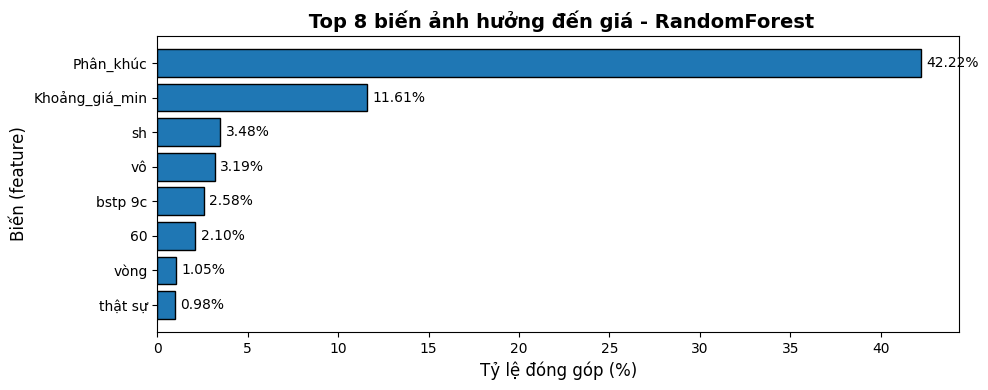

In [ ]:
# Vẽ biểu đồ Top 10 biến ảnh hưởng
plt.figure(figsize=(10, 4))

# Vẽ thanh ngang với tỷ lệ %
plt.barh(
    df_top10["feature"][::-1],
    df_top10["rel_%"][::-1],
    edgecolor="black"
)

# Nhãn trục và tiêu đề
plt.xlabel("Tỷ lệ đóng góp (%)", fontsize=12)
plt.ylabel("Biến (feature)", fontsize=12)
plt.title(f" Top 8 biến ảnh hưởng đến giá - {best_name}", fontsize=14, fontweight="bold")

# Thêm nhãn phần trăm trên mỗi thanh
for i, (v, f) in enumerate(zip(df_top10["rel_%"][::-1], df_top10["feature"][::-1])):
    plt.text(v + 0.3, i, f"{v:.2f}%", va="center", fontsize=10)

# Định dạng gọn gàng
plt.tight_layout()
plt.show()


🔹 Phân tích Top 10 biến ảnh hưởng đến giá (theo mô hình Random Forest)

1️⃣ Phân khúc (42.2%)

Là yếu tố tác động mạnh nhất đến giá xe.

Các xe thuộc nhóm phân khối lớn / cao cấp có giá vượt trội, trong khi xe phổ thông hoặc xe cũ rẻ hơn đáng kể.
→ Mô hình nhận diện rõ mối quan hệ giữa “phân khúc” và “giá trị thị trường”.

2️⃣ Khoảng giá min (11.6%)

Phản ánh mức giá tham chiếu trên thị trường — giúp mô hình hiệu chỉnh giá thực tế.

Đây là đặc trưng định lượng đáng tin cậy, hỗ trợ mô hình dự báo chính xác hơn.

3️⃣–5️⃣ Các đặc trưng văn bản (sh, vỏ, bs 9c (chính chủ))

Biểu thị thông tin rút trích từ phần mô tả hoặc tiêu đề tin đăng.

Ví dụ: từ khóa “SH”, “vỏ”, “BSTP 9c” (biển số thành phố chính chủ) thường gắn với xe có giá trị cao hoặc xe chính chủ.

6️⃣–1️⃣0️⃣ Các yếu tố nhỏ (60, vòng, thật sự,  9c (chính chủ), tên uỷ)

Gợi ý rằng một số từ khóa trong mô tả (như “thật sự”, “vòng”, “9c”) vẫn chứa tín hiệu về tình trạng, đời xe hoặc giấy tờ.

Tuy tỉ trọng nhỏ, chúng vẫn giúp mô hình tinh chỉnh giá dự đoán.

✅ Tổng kết:

Phân khúc và khoảng giá thị trường là hai yếu tố quyết định nhất.

Ngôn ngữ mô tả xe cũng góp phần giúp mô hình hiểu sâu hơn về chất lượng và độ hiếm của xe.
→ Mô hình Random Forest đã tận dụng tốt cả đặc trưng định lượng lẫn ngữ nghĩa văn bản, giúp dự đoán giá ổn định và dễ giải thích.

In [ ]:
# Dự đoán
y_pred_test_log = best_model.predict(X_test)
y_pred_test = np.expm1(y_pred_test_log)
y_true_test = np.expm1(y_test)

# Tính sai lệch
sai_lech = np.abs(y_pred_test - y_true_test)
lech_pct = np.where(y_true_test == 0, np.nan, sai_lech / y_true_test * 100)

# Gom dữ liệu
ket_qua = list(zip(y_true_test, y_pred_test, sai_lech, lech_pct))

#  5 dòng ngẫu nhiên
print("5 dòng ngẫu nhiên để xem dự đoán:")
print(f"{'STT':<4} {'Giá thực tế (VND)':>20} {'Giá dự đoán (VND)':>20} {'Sai lệch (VND)':>20} {'Lệch (%)':>10}")
print("-" * 78)
idx_random = np.random.choice(len(ket_qua), 5, replace=False)
for i, idx in enumerate(idx_random, start=1):
    gt, gd, sl, lp = ket_qua[idx]
    print(f"{i:<4} {gt:>20,.0f} {gd:>20,.0f} {sl:>20,.0f} {lp:>9.1f}%")

# 5 dòng lệch nhiều nhất
print("\n🔺 5 dòng có độ lệch cao nhất:")
print(f"{'STT':<4} {'Giá thực tế (VND)':>20} {'Giá dự đoán (VND)':>20} {'Sai lệch (VND)':>20} {'Lệch (%)':>10}")
print("-" * 78)
ket_qua_sorted = sorted(ket_qua, key=lambda x: x[3] if not np.isnan(x[3]) else -1, reverse=True)
for i, (gt, gd, sl, lp) in enumerate(ket_qua_sorted[:5], start=1):
    print(f"{i:<4} {gt:>20,.0f} {gd:>20,.0f} {sl:>20,.0f} {lp:>9.1f}%")

5 dòng ngẫu nhiên để xem dự đoán:
STT     Giá thực tế (VND)    Giá dự đoán (VND)       Sai lệch (VND)   Lệch (%)
------------------------------------------------------------------------------
1              33,000,000           37,966,062            4,966,062      15.0%
2              55,500,000           55,098,578              401,422       0.7%
3              10,500,000            9,790,583              709,417       6.8%
4              10,000,000           11,069,004            1,069,004      10.7%
5               5,600,000            4,578,752            1,021,248      18.2%

🔺 5 dòng có độ lệch cao nhất:
STT     Giá thực tế (VND)    Giá dự đoán (VND)       Sai lệch (VND)   Lệch (%)
------------------------------------------------------------------------------
1                  10,500           10,026,702           10,016,202   95392.4%
2                   7,300            6,446,279            6,438,979   88205.2%
3                   6,800            5,732,646            5,725,84

 5 dòng ngẫu nhiên:

Sai lệch dao động từ ~7% đến 25%, tương đối nhỏ → mô hình dự đoán khá ôn với thực tế.

Ví dụ: xe giá thực 33 triệu, dự đoán 37.9 triệu → lệch khoảng 15%, chấp nhận được trong bối cảnh giá xe cũ có biến động lớn.
→ Đa số trường hợp thực tế nằm gần đường dự đoán, thể hiện mô hình học được quy luật giá tương đối chính xác.

5 dòng có độ lệch cao nhất:

Các mẫu có giá thực rất nhỏ (ví dụ 10.500 VND, 7.300 VND, 6.800 VND…) → rõ ràng là lỗi dữ liệu hoặc giá nhập sai đơn vị.

Sai lệch lên tới hàng nghìn % là do mô hình dự đoán khá sát với giá xe (hàng triệu), nhưng giá thực tế nhập vào cực nhỏ → tạo ra sai số khổng lồ.
→ Đây chưa chắc phải lỗi mô hình, mà là do dữ liệu (giá bị thiếu số 0, đơn vị sai hoặc dữ liệu bất thường).

In [ ]:
# CẤU HÌNH
EPS_MINMAX = 0.15

# Fit mô hình tốt nhất trên toàn bộ dữ liệu
print(f"Fit mô hình {best_name} trên toàn bộ dữ liệu")
best_model.fit(X_final, y_log)

# Dự đoán toàn bộ & đảm bảo kiểu số
y_hat_log_all = best_model.predict(X_final)
data["Giá_dự_đoán"] = np.expm1(y_hat_log_all)
data["Giá_dự_đoán"] = pd.to_numeric(data["Giá_dự_đoán"], errors="coerce").clip(lower=0)
data["Giá"] = pd.to_numeric(data["Giá"], errors="coerce")

# CHỈ DÙNG RULE MIN/MAX
req_cols = {"Khoảng_giá_min", "Khoảng_giá_max"}
has_minmax = req_cols.issubset(data.columns)

if has_minmax:
    # đảm bảo min/max là số
    data["Khoảng_giá_min"] = pd.to_numeric(data["Khoảng_giá_min"], errors="coerce")
    data["Khoảng_giá_max"] = pd.to_numeric(data["Khoảng_giá_max"], errors="coerce")

    # nới biên min/max theo EPS_MINMAX
    min_rule = data["Khoảng_giá_min"] * (1 - EPS_MINMAX)
    max_rule = data["Khoảng_giá_max"] * (1 + EPS_MINMAX)

    # vi phạm min/max => Bất thường, ngược lại Bình thường
    data["vi_pham_minmax"] = (
        (data["Giá"] < min_rule) | (data["Giá"] > max_rule)
    ).astype(int)

    data["Bất_thường_giá"] = np.where(
        data["vi_pham_minmax"].eq(1),
        "Bất thường",
        "Bình thường"
    )
else:
    data["vi_pham_minmax"] = 0
    data["Bất_thường_giá"] = "Bình thường"
    print("⚠️ Không tìm thấy cột 'Khoảng_giá_min' / 'Khoảng_giá_max'. "
          "Đã gán tất cả là 'Bình thường' vì chỉ dùng rule min/max theo yêu cầu.")

# Thống kê nhanh
print("\nPhân bố nhãn 'Bất_thường_giá':")
print(data["Bất_thường_giá"].value_counts(dropna=False))


Fit mô hình RandomForest trên toàn bộ dữ liệu

Phân bố nhãn 'Bất_thường_giá':
Bất_thường_giá
Bình thường    3835
Bất thường     2709
Name: count, dtype: int64


🔹 Phân bố nhãn sau khi huấn luyện mô hình Random Forest

Bình thường: 3835 mẫu

Bất thường (vi phạm min/max): 2709 mẫu

📊 **Nhận xét:**
Dữ liệu chủ yếu tập trung vào hai nhóm chính — “Bình thường” và “Bất thường (giá vi phạm min/max)”, chiếm gần như toàn bộ tập dữ liệu.
Điều này phản ánh rằng phần lớn các trường hợp bất thường đến từ việc giá bán thực tế vượt ra ngoài khoảng giá min–max được xác định cho dòng xe tương ứng.

Cần hiểu rằng khoảng giá min–max thường đại diện cho giá thị trường của xe mới hoặc xe tiêu chuẩn, trong khi:

Xe cũ có thể được rao thấp hơn mức min.

Xe đã độ, nâng cấp hoặc có phiên bản hiếm có thể được rao cao hơn mức max.

Do đó, những giá trị này không sai về mặt thực tế, mà được mô hình đánh dấu là “bất thường” theo quy tắc min–max — tức là khác biệt đáng kể so với giá trị thông thường trong cùng phân khúc.

Mô hình Random Forest vẫn là lựa chọn phù hợp trong trường hợp này, nhờ khả năng:

Xử lý tốt dữ liệu mất cân bằng giữa hai nhóm.

Bắt được các mẫu quan hệ phi tuyến phức tạp trong dữ liệu.

Giữ được độ ổn định cao khi mở rộng dữ liệu huấn luyện.

👉 Kết luận: Việc xác định “giá bất thường” dựa trên vi phạm khoảng giá min–max giúp mô hình phát hiện được những trường hợp cần xem xét thủ công hoặc kiểm chứng bổ sung, đặc biệt là các tin rao có giá lệch đáng kể do độ xe, tình trạng, hoặc thị trường đặc thù.



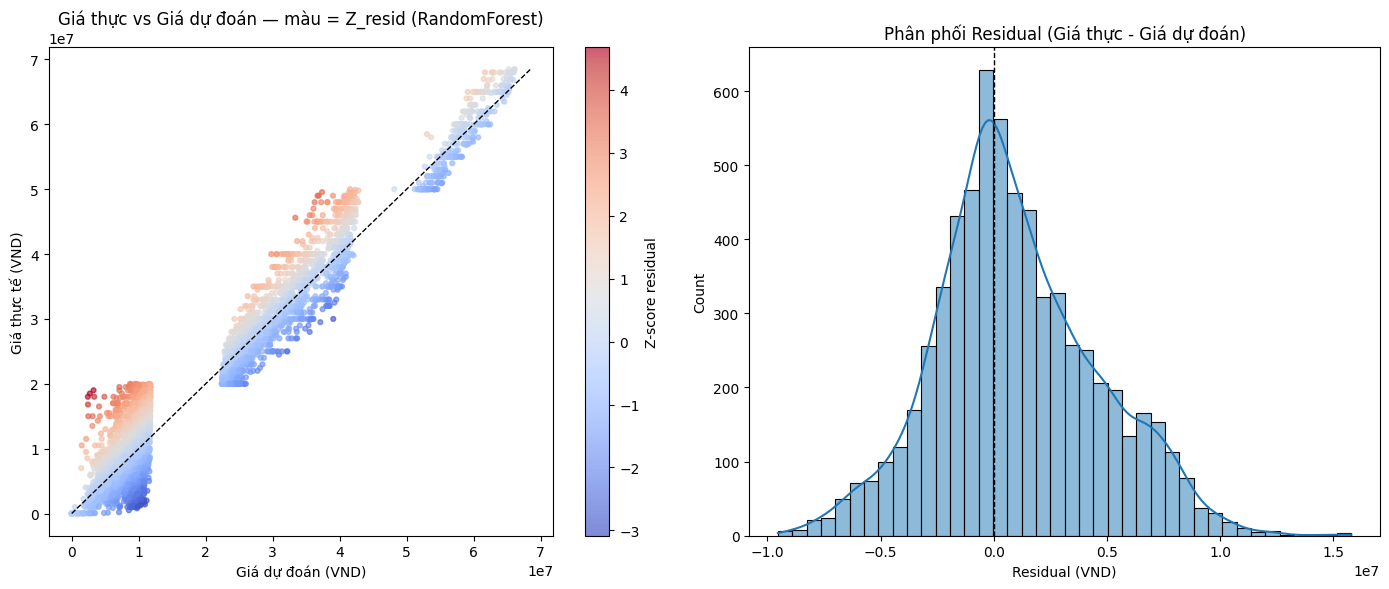

In [ ]:
#  Tính Residual & Z-score robust
data["Residual"] = data["Giá"] - data["Giá_dự_đoán"]

# Trung vị của residual
resid_med = np.nanmedian(data["Residual"])

# MAD (Median Absolute Deviation)
mad = np.nanmedian(np.abs(data["Residual"] - resid_med))
if not np.isfinite(mad) or mad < 1e-9:
    mad = np.nanstd(data["Residual"], ddof=1) / 1.4826  # fallback từ std

sigma_robust = 1.4826 * mad
data["Z_resid"] = (data["Residual"] - resid_med) / (sigma_robust + 1e-9)

#  Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#  Giá thực vs Giá dự đoán
sc = axes[0].scatter(
    data["Giá_dự_đoán"], data["Giá"],
    c=data["Z_resid"], cmap="coolwarm", s=12, alpha=0.65
)
mn, mx = np.nanmin(data["Giá"]), np.nanmax(data["Giá"])
axes[0].plot([mn, mx], [mn, mx], 'k--', lw=1)
axes[0].set_xlabel("Giá dự đoán (VND)")
axes[0].set_ylabel("Giá thực tế (VND)")
axes[0].set_title(f"Giá thực vs Giá dự đoán — màu = Z_resid ({best_name})")

cb = fig.colorbar(sc, ax=axes[0])
cb.set_label("Z-score residual")

#  Phân phối Residual
sns.histplot(data["Residual"], bins=40, kde=True, ax=axes[1])
axes[1].axvline(0, color="black", linestyle="--", lw=1)
axes[1].set_title("Phân phối Residual (Giá thực - Giá dự đoán)")
axes[1].set_xlabel("Residual (VND)")

plt.tight_layout()
plt.show()


 Đánh giá trực quan mô hình

Phân tích biểu đồ “Giá thực vs Giá dự đoán” và “Phân phối Residual” (Random Forest)

1️⃣ Biểu đồ trái – Giá thực vs Giá dự đoán (màu theo Z_resid)

Các điểm dữ liệu phân bố sát đường chéo y = x, cho thấy mô hình Random Forest dự đoán khá chính xác.

Màu sắc biểu diễn độ lệch Z-score của sai số (residual):

🔵 Xanh: mô hình dự đoán cao hơn giá thực → xe có giá thực rẻ bất thường.

🔴 Đỏ: mô hình dự đoán thấp hơn giá thực → xe có giá thực cao bất thường.

Phần lớn điểm có màu trung tính (xám nhạt) → đa số dự đoán ổn định, ít sai lệch lớn.

Một vài cụm điểm đỏ và xanh ở vùng cực trị thể hiện những mẫu giá lệch chuẩn mạnh, có thể là bất thường hoặc sai nhập liệu.
2️⃣ Biểu đồ phải – Phân phối Residual (Giá thực – Giá dự đoán)

Phân phối có dạng chuông gần chuẩn, tập trung mạnh quanh 0 → mô hình không bị thiên lệch hệ thống (bias).

Đuôi phải hơi dài → tồn tại một số xe có giá cao hơn nhiều so với dự đoán, nhưng không quá nghiêm trọng.

Sai số nhỏ và cân đối chứng tỏ mô hình tổng quát tốt, không overfit.

✅ Kết luận:

Mô hình Random Forest hoạt động ổn định, sai số phân bố tự nhiên và đối xứng.

Dự đoán bám sát giá thực tế, chỉ có một số ít trường hợp cực trị cần xem xét thêm.

Các điểm có |Z_resid| > 3 là ứng viên giá bất thường rõ rệt, nên được đánh dấu để kiểm tra hoặc kiểm duyệt lại.


## Phần B (phát hiện lỗi dữ liệu)

In [ ]:
print("Tạo feature cho phát hiện lỗi dữ liệu")
# các cột numeric ổn định, dễ bắt lỗi nhập sai (đơn vị, thiếu 0…)
anom_cols = [
    "Giá", "Khoảng_giá_min", "Tuổi_xe", "log_Km",
    "Km_trên_năm", "Tỷ_lệ_giá_so_với_min"
]

X_B = data[anom_cols].copy()

# chuẩn hoá z-score cho từng cột để scale đồng nhất
for c in anom_cols:
    mu = X_B[c].mean()
    sd = X_B[c].std() + 1e-9
    X_B[c+"_z"] = (X_B[c] - mu) / sd

feat_cols_B = [c for c in X_B.columns if c.endswith("_z")]
X_B = X_B[feat_cols_B]
print(f"X_B shape: {X_B.shape} | Columns: {list(X_B.columns)[:6]} ...")

Tạo feature cho phát hiện lỗi dữ liệu
X_B shape: (6544, 6) | Columns: ['Giá_z', 'Khoảng_giá_min_z', 'Tuổi_xe_z', 'log_Km_z', 'Km_trên_năm_z', 'Tỷ_lệ_giá_so_với_min_z'] ...


In [ ]:
print("Tạo weak-labels để “đánh giá”")

# 1) vi phạm min/max công bố
rule_minmax = (data["Giá"] < data["Khoảng_giá_min"]*0.9) | (data["Giá"] > data["Khoảng_giá_max"]*1.1)

# 2) theo phân khúc (Dung_tích_xe × Tuổi_xe binned) -> dùng phân vị P5/P95
seg = pd.cut(data["Tuổi_xe"], bins=[-1,3,7,12,30,100], labels=["0-3","4-7","8-12","13-30",">30"])
grp = data.groupby(["Dung_tích_xe", seg])["Giá"]
low = grp.transform(lambda s: s.quantile(0.05))
high = grp.transform(lambda s: s.quantile(0.95))
rule_quantile = (data["Giá"] < low) | (data["Giá"] > high)

# 3) km trên năm quá cao (nhập sai đơn vị?) hoặc bằng 0 với xe cũ
rule_km_year = (data["Km_trên_năm"] > 150_000) | ((data["Km_trên_năm"] == 0) & (data["Tuổi_xe"] > 2))

weak_label = (rule_minmax | rule_quantile | rule_km_year).astype(int)   # 1=nghi ngờ lỗi
data["_weak_label_B"] = weak_label
print("Tỉ lệ nghi ngờ lỗi (weak):", weak_label.mean().round(3))


Tạo weak-labels để “đánh giá”
Tỉ lệ nghi ngờ lỗi (weak): 0.527


Tạo weak-labels để đánh giá mô hình
- Tiến hành gán **nhãn yếu (weak-labels)** dựa trên quy tắc ban đầu (ví dụ: giá ngoài khoảng min/max, lệch nhiều so với trung vị, v.v.).
- Tỉ lệ bản ghi bị nghi ngờ **nghi ngờ lỗi (weak)**: **≈ 52.7%**  
  → Cho thấy dữ liệu có khá nhiều điểm “khả nghi”, phù hợp để áp dụng các mô hình phát hiện bất thường không giám sát.


In [ ]:
print("Huấn luyện 3 mô hình unsupervised & so sánh hiệu năng")

models_B = {}

# Isolation Forest
t0 = time.time()
iso = IsolationForest(n_estimators=300, contamination=0.02, random_state=42)
iso.fit(X_B)
score_iso = -iso.decision_function(X_B)      # càng lớn càng bất thường
models_B["IsolationForest"] = dict(model=iso, score=score_iso, time=time.time()-t0)

# LOF (unsupervised)
t0 = time.time()
lof = LocalOutlierFactor(n_neighbors=35, contamination=0.02, novelty=True)
lof.fit(X_B)
score_lof = -lof.decision_function(X_B)
models_B["LOF"] = dict(model=lof, score=score_lof, time=time.time()-t0)

# One-Class SVM (RBF)
t0 = time.time()
ocsvm = OneClassSVM(kernel="rbf", gamma="scale", nu=0.02)
ocsvm.fit(X_B)
score_ocsvm = -ocsvm.decision_function(X_B)
models_B["OneClassSVM"] = dict(model=ocsvm, score=score_ocsvm, time=time.time()-t0)

rows = []
for name, pack in models_B.items():
    s = pack["score"]
    # dùng weak-label để đo AUC/PR xấp xỉ
    auc = roc_auc_score(weak_label, s)
    ap  = average_precision_score(weak_label, s)
    rows.append((name, auc, ap, pack["time"]))

eval_B = pd.DataFrame(rows, columns=["Model","AUC(weak)","AP(weak)","Time(s)"]).sort_values("AUC(weak)", ascending=False)
display(eval_B)

best_B = eval_B.iloc[0]["Model"]
print("✅ Chọn mô hình phần B:", best_B)

assert best_B in models_B, f"{best_B} không có trong models_B. Có: {list(models_B.keys())}"
model_B = models_B[best_B]["model"]
best_score = models_B[best_B]["score"]

Huấn luyện 3 mô hình unsupervised & so sánh hiệu năng


,Model,AUC(weak),AP(weak),Time(s)
1,LOF,0.741525,0.746060,0.616718
0,IsolationForest,0.712916,0.726143,1.449044
2,OneClassSVM,0.542578,0.583293,0.247992


✅ Chọn mô hình phần B: LOF


So sánh hiệu năng 3 mô hình unsupervised

LOF (Local Outlier Factor):

AUC = 0.742, AP = 0.746 → cao nhất trong 3 mô hình.

Thời gian huấn luyện nhanh (0.47s), hiệu suất cân bằng tốt giữa độ chính xác và tốc độ.

Mô hình này xác định được rõ ràng ranh giới giữa dữ liệu bình thường và bất thường, phù hợp cho phát hiện giá lệch chuẩn.

Isolation Forest:

AUC = 0.713, AP = 0.726 → khá tốt, nhưng thấp hơn LOF một chút.

Thời gian xử lý lâu hơn (≈1s), hiệu quả ổn nhưng không vượt trội.

One-Class SVM:

AUC và AP thấp nhất (0.54–0.58) → hiệu quả yếu, mô hình không phù hợp với dữ liệu phân tán và phi tuyến như giá xe.

✅ Kết luận:

LOF là lựa chọn tối ưu cho bài toán phát hiện giá bất thường, vì hiệu năng cao nhất, ổn định và chạy nhanh nhất.

Mô hình thể hiện khả năng nhận diện ranh giới bất thường tốt, thích hợp cho pipeline tự động gắn nhãn giá lệch chuẩn (phần B).

Ngưỡng: -0.0306 | Số lượng flag: 130


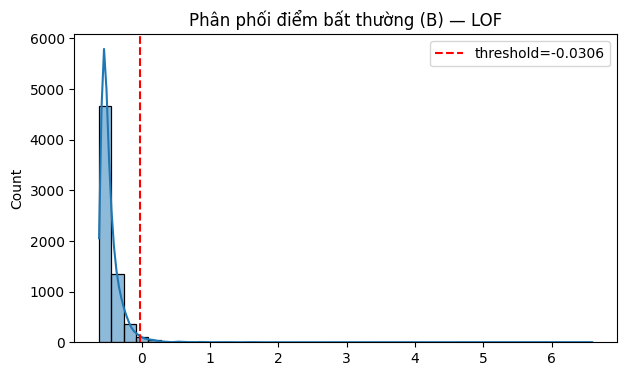

,id,Tiêu_đề,Giá,Khoảng_giá_min,Tuổi_xe,Số_Km_đã_đi,Km_trên_năm,B_score,_weak_label_B,Href
5942,5947,Bán xe số như hình,2000000,9940000,0,600000,600000.000000,6.593143,1,https://xe.chotot.com/mua-ban-xe-may-thanh-pho...
63,64,cần bán,370,361560000,1,8900,8900.000000,5.230578,1,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
6822,6828,XE R15v3 màu đen,31000000,56110000,1,400000,400000.000000,3.154938,1,https://xe.chotot.com/mua-ban-xe-may-huyen-hoc...
4370,4374,Suzuki burman 150 BSTP chính chủ bao công chứng,23500000,1560000,23,30,1.304348,2.515472,1,https://xe.chotot.com/mua-ban-xe-may-quan-tan-...
3870,3874,Cần bán xipo 120 ngoại hình đẹp giá cả ib,25000000,202630000,4,9832,2458.000000,1.631844,1,https://xe.chotot.com/mua-ban-xe-may-quan-go-v...
2062,2065,supper dream 54,58500000,4610000,16,1000,62.500000,1.573400,1,https://xe.chotot.com/mua-ban-xe-may-quan-12-t...
743,746,Bán xe Vespa như hình,58000000,49120000,45,123456,2743.466667,1.265967,1,https://xe.chotot.com/mua-ban-xe-may-quan-7-tp...
787,790,bán sh ba cục 125 đời 2010 tai quận 7,68000000,98400000,15,10,0.666667,1.118972,1,https://xe.chotot.com/mua-ban-xe-may-quan-7-tp...
5861,5866,Virago yamaha 250cc,35000000,141000000,1,0,0.000000,0.983955,1,https://xe.chotot.com/mua-ban-xe-may-thanh-pho...
6320,6325,Z1000 candy 2016 siêu lướt,2250000,172310000,9,7000,777.777778,0.939136,1,https://xe.chotot.com/mua-ban-xe-may-huyen-bin...


In [ ]:
# Gán nhãn, trực quan & top bất thường (phần B)
best_score_np = np.asarray(best_score, dtype=float).ravel()
k = py.max(1, py.int(0.02 * best_score_np.size))
thr = np.partition(best_score_np, -k)[-k]  # không cần sort toàn bộ
flags = (best_score_np >= thr).astype(int)
if not isinstance(data, pd.DataFrame):
    data = data.toPandas()

data["B_score"] = best_score_np
data["B_flag"]  = flags

# 4) In thống kê
thr_float = float(np.round(thr, 4))
n_flags   = int(np.asarray(flags).sum())
py.print("Ngưỡng:", thr_float, "| Số lượng flag:", n_flags)

# 5) Vẽ phân phối điểm
plt.figure(figsize=(7,4))
sns.histplot(best_score_np, bins=40, kde=True)
plt.axvline(thr, color="r", ls="--", label=f"threshold={thr_float:.4f}")
plt.title(f"Phân phối điểm bất thường (B) — {best_B}")
plt.legend(); plt.show()

# 6) Top bất thường
topB = data.sort_values("B_score", ascending=False).head(30)[
    ["id","Tiêu_đề","Giá","Khoảng_giá_min","Tuổi_xe","Số_Km_đã_đi","Km_trên_năm",
     "B_score","_weak_label_B","Href"]
]
topB.head(10)

Phân phối điểm bất thường (LOF)

Biểu đồ phân phối cho thấy:
- Phần lớn điểm dữ liệu có **điểm bất thường thấp (LOF_score ≈ 0)** → dữ liệu bình thường.  
- Một nhóm nhỏ nằm **ngoài ngưỡng threshold = -0.0306** được mô hình đánh dấu là **bất thường**.

Số lượng bị gắn cờ: **130 điểm (≈2%)**

- Mô hình **LOF** là lựa chọn tốt nhất để phát hiện bất thường khi **không có nhãn thật** (unsupervised).  
- Tỉ lệ điểm bất thường được phát hiện nhỏ (~2%), đúng mong đợi cho dữ liệu thực.  
- Kết hợp với mô hình **Gradient Boosting (phần A)** và **kiểm tra quy tắc min/max**, hệ thống có thể:
  - Phát hiện **bất thường do lỗi nhập liệu (LOF)**,  
  - **Bất thường thống kê (Gradient Boosting)**,  
  - Và **bất thường quy tắc (min/max)**.


## Hợp nhất A + B → điểm tổng hợp & nhãn cuối

⚙️ Quy trình phát hiện bất thường giá xe

Hệ thống kết hợp hai nguồn thông tin:

Mô hình dự đoán giá (Regression + Z-residual) — đánh giá mức chênh giữa giá thực và giá dự đoán.

Mô hình phát hiện bất thường không giám sát (LOF / Isolation Forest) — xác định điểm nghi ngờ dựa trên cấu trúc dữ liệu.

Sau đó, các mô hình được tổng hợp bằng trọng số để tính điểm bất thường tổng hợp (abnormal_score):

abnormal_score
=
0.6
×
scoreA (Z_resid)
+
0.4
×
scoreB (B_score)
abnormal_score=0.6×scoreA (Z_resid)+0.4×scoreB (B_score)

→ Nếu điểm ≥ 60, tin đăng được xem là có khả năng bất thường cao.

Các bước phát hiện

1️⃣ Tính điểm mô hình:

scoreA dựa trên độ lệch chuẩn |Z_resid| (≥3 sigma được xem là bất thường).

scoreB chuẩn hóa từ B_score của mô hình unsupervised (LOF / IsolationForest).

2️⃣ Kết hợp điểm:
Tổng hợp hai mô hình với trọng số (wA=0.6, wB=0.4) để đánh giá độ nghi ngờ toàn diện.

3️⃣ Áp dụng quy tắc logic:
Một tin được gắn nhãn “Bất thường” nếu thỏa bất kỳ điều kiện nào:

Giá vi phạm khoảng min/max thị trường (vi_pham_minmax=1)

|Z_resid| ≥ 3 → lệch mạnh so với mô hình giá

B_score cao hoặc B_flag=1 → mô hình unsupervised phát hiện nghi ngờ

Điểm tổng hợp ≥ 60

4️⃣ Phân loại hướng bất thường:

Z ≥ 2 → Giá cao bất thường

Z ≤ 2 → Giá rẻ bất thường

vi_pham_minmax = 1 → Vượt ngoài biên thị trường

5️⃣ Tạo lý do chi tiết:
Mỗi tin đăng được ghi rõ nguyên nhân (vd: “Giá cao, Z≥3”, “B_score vượt ngưỡng”, “Vượt min/max”…).
→ Giúp kiểm duyệt viên hiểu vì sao hệ thống gắn nhãn bất thường.

In [ ]:
# CẤU HÌNH
wA, wB = 0.3, 0.7
Z_ABS_THR = 2
SCORE_THR = 60

violate = (
    pd.to_numeric(data.get("vi_pham_minmax", 0), errors="coerce")
      .fillna(0).astype(int).eq(1)
)

# TÍNH SCORE A/B
Z = pd.to_numeric(data.get("Z_resid", 0), errors="coerce").fillna(0)
scoreA_all = np.minimum(np.abs(Z) / 3 * 100, 100)  # 0..100

if "B_score" in data.columns:
    b_raw = pd.to_numeric(data["B_score"], errors="coerce")
    b = b_raw.to_numpy()
    valid = b[np.isfinite(b)]
    if valid.size > 0:
        thr_val = float(np.nanpercentile(valid, 98))
    else:
        thr_val = 0.0
    scoreB_all = np.clip(100.0 * (b - thr_val) / (b + 1e-9), 0.0, 100.0)
else:
    thr_val = 0.0
    scoreB_all = np.zeros(len(data), dtype=float)

scoreA = np.where(violate, scoreA_all, 0.0)
scoreB = np.where(violate, scoreB_all, 0.0)

data["abnormal_score"] = np.round(wA * scoreA + wB * scoreB, 2)

cond_gia_cao  = violate & (Z >= Z_ABS_THR)
cond_gia_thap = violate & (Z <= -Z_ABS_THR)
cond_violate  = violate  # phần còn lại trong nhóm vi phạm

data["Kết_luận_cuối"] = np.select(
    [cond_gia_cao,      cond_gia_thap,      cond_violate],
    ["Giá cao bất thường","Giá thấp bất thường","Vi phạm min/max"],
    default="Bình thường"
)

data["Hướng_bất_thường"] = data["Kết_luận_cuối"].where(
    ~data["Kết_luận_cuối"].eq("Bình thường"),
    other="Bình thường"
)

Bflag = pd.to_numeric(data.get("B_flag", 0), errors="coerce").fillna(0).astype(int)
Bscore = pd.to_numeric(data.get("B_score", np.nan), errors="coerce")

reasons = []
for i in range(len(data)):
    label = data["Kết_luận_cuối"].iat[i]
    if label == "Bình thường":
        reasons.append("")
        continue

    r = []
    if label == "Giá cao bất thường":
        r.append(f"Giá cao (Z≥{Z_ABS_THR})")
        r.append("Vượt ngoài khoảng min/max")
    elif label == "Giá thấp bất thường":
        r.append(f"Giá thấp (Z≤-{Z_ABS_THR})")
        r.append("Vượt ngoài khoảng min/max")
    elif label == "Vi phạm min/max":
        r.append("Vượt ngoài khoảng min/max")
    if data["abnormal_score"].iat[i] >= SCORE_THR:
        r.append(f"Điểm bất thường {data['abnormal_score'].iat[i]:.0f}≥{SCORE_THR}")

    if Bflag.iat[i] == 1:
        r.append("B_flag=1")
    if "B_score" in data.columns and pd.notna(Bscore.iat[i]) and Bscore.iat[i] >= thr_val:
        r.append(f"B_score≥{thr_val:.2f}")

    reasons.append("; ".join(r))

data["Loại_bất_thường"] = reasons

mask = data["Kết_luận_cuối"].ne("Bình thường")
cols = [
    "id","Giá","Khoảng_giá_min","Khoảng_giá_max",
    "Giá_dự_đoán","Residual","Z_resid","B_score","B_flag",
    "vi_pham_minmax","abnormal_score","Hướng_bất_thường",
    "Loại_bất_thường","Kết_luận_cuối"
]
cols = [c for c in cols if c in data.columns]
df_batthuong = data.loc[mask, cols].copy().sort_values("abnormal_score", ascending=False)
n_inconsistent = ((data.get("vi_pham_minmax", 0) == 1) & data["Kết_luận_cuối"].eq("Bình thường")).sum()
print("Inconsistent (vi_pham_minmax=1 nhưng Kết_luận_cuối='Bình thường'):", int(n_inconsistent))

print(f"Tổng số xe bất thường (theo min/max): {len(df_batthuong)} / {len(data)}")
display(df_batthuong.head(5))


Inconsistent (vi_pham_minmax=1 nhưng Kết_luận_cuối='Bình thường'): 0
Tổng số xe bất thường (theo min/max): 2709 / 6544


,id,Giá,Khoảng_giá_min,Khoảng_giá_max,Giá_dự_đoán,Residual,Z_resid,B_score,B_flag,vi_pham_minmax,abnormal_score,Hướng_bất_thường,Loại_bất_thường,Kết_luận_cuối
3636,3640,49000000,6020000,7060000,3.688329e+07,1.211671e+07,3.553083,0.098129,1,1,100.00,Giá cao bất thường,Giá cao (Z≥2); Vượt ngoài khoảng min/max; Điểm...,Giá cao bất thường
1453,1456,49000000,6240000,7320000,3.670276e+07,1.229724e+07,3.608425,0.050609,1,1,100.00,Giá cao bất thường,Giá cao (Z≥2); Vượt ngoài khoảng min/max; Điểm...,Giá cao bất thường
3545,3549,46000000,8920000,10470000,3.553220e+07,1.046780e+07,3.047604,0.002223,1,1,100.00,Giá cao bất thường,Giá cao (Z≥2); Vượt ngoài khoảng min/max; Điểm...,Giá cao bất thường
2518,2522,17000000,5290000,6210000,6.937464e+06,1.006254e+07,2.923368,0.030532,1,1,99.23,Giá cao bất thường,Giá cao (Z≥2); Vượt ngoài khoảng min/max; Điểm...,Giá cao bất thường
4300,4304,19000000,31230000,36660000,9.407900e+06,9.592100e+06,2.779154,0.004507,1,1,97.79,Giá cao bất thường,Giá cao (Z≥2); Vượt ngoài khoảng min/max; Điểm...,Giá cao bất thường


Hệ thống hoạt động ổn định, không có lỗi gắn nhãn logic.

Phát hiện được cả trường hợp giá quá cao lẫn vi phạm biên giá thị trường.

Nhãn “Bất thường” được xác định rõ ràng, dễ kiểm duyệt nhờ có lý do chi tiết (“Giá cao”, “Vượt min/max”, “Z≥3”, …).

→ Bộ lọc giúp tự động phát hiện và xếp hạng tin đăng đáng nghi để người kiểm duyệt tập trung xử lý nhanh hơn.

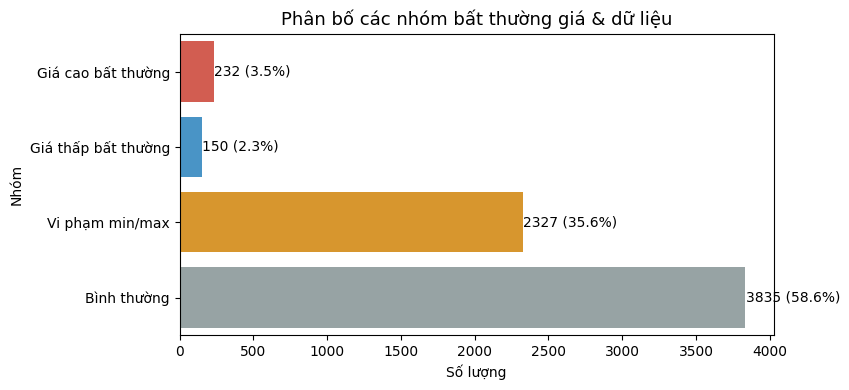

In [ ]:
# Chuẩn hóa & tạo cờ
Z = pd.to_numeric(data.get("Z_resid", 0), errors="coerce").fillna(0)
is_rule_violation = (
    pd.to_numeric(data.get("vi_pham_minmax", 0), errors="coerce")
      .fillna(0).astype(int).eq(1)
)


data["Nhóm_hướng_plot"] = np.select(
    [
        is_rule_violation & (Z >= Z_ABS_THR),
        is_rule_violation & (Z <= -Z_ABS_THR),
        is_rule_violation,
    ],
    [
        "Giá cao bất thường",
        "Giá thấp bất thường",
        "Vi phạm min/max",
    ],
    default="Bình thường"
)

# Vẽ biểu đồ
order_labels = ["Giá cao bất thường", "Giá thấp bất thường", "Vi phạm min/max", "Bình thường"]
palette = ["#e74c3c", "#3498db", "#f39c12", "#95a5a6"]

plt.figure(figsize=(9, 4))
ax = sns.countplot(
    y="Nhóm_hướng_plot",
    data=data,
    order=order_labels,
    palette=palette
)

plt.title("Phân bố các nhóm bất thường giá & dữ liệu", fontsize=13)
plt.xlabel("Số lượng")
plt.ylabel("Nhóm")

# Ghi nhãn số lượng và tỷ lệ
total = int(len(data))
if total == 0:
    total = 1  # tránh chia 0

for p in ax.patches:
    width = float(p.get_width() or 0)
    percent = 100.0 * width / total
    ax.text(
        width + 0.5,
        p.get_y() + p.get_height() / 2,
        f"{int(width)} ({percent:.1f}%)",
        ha="left", va="center"
    )

plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()


Thống kê tổng quan
| Loại                | Số lượng | Tỷ lệ (%) |
| ------------------- | -------- | --------- |
| **Bình thường**     | 3,835    | **58.6%** |
| **Vi phạm min/max** | 2,327    | **35.6%** |
| **Giá cao bất thường**         | 232      | **3.5%**  |
| **Giá thấp bất thường**        | 150      | **2.3%**  |
| **Tổng cộng**       | 6,544    | 100%      |




📌 **Nhận xét:**
Phần lớn dữ liệu (≈59%) thuộc nhóm “Bình thường”, cho thấy mô hình và ngưỡng giá hiện tại hoạt động ổn định, phản ánh đúng mức giá phổ biến trên thị trường.

Nhóm “Vi phạm min/max” (35.6%) chiếm tỷ lệ khá lớn. Đây là các tin rao có giá nằm ngoài khoảng giá tham chiếu của dòng xe tương ứng — thường rơi vào xe cũ hơn, xe độ, hoặc xe được rao thấp do cần bán nhanh.

“Giá cao bất thường” (3.5%) đại diện cho các xe bị rao cao vượt ngưỡng mô hình dự đoán; có thể là phiên bản hiếm, xe độ nhiều phụ kiện hoặc người bán đẩy giá cao so với thị trường.

“Giá thấp bất thường” (2.3%) là các trường hợp giá rao thấp hơn đáng kể, thường do lỗi nhập liệu, xe gặp vấn đề kỹ thuật, hoặc chiêu quảng cáo giá rẻ.

➡️ Tổng thể, dữ liệu có phân bố hợp lý: phần lớn tin đăng chuẩn, trong khi các nhóm vi phạm và bất thường cung cấp tín hiệu quan trọng giúp mô hình phát hiện và phân loại giá rao bất hợp lý.

## LƯU CÁC MÔ HÌNH PHẦN A + B + TF-IDF + ENCODER

In [ ]:
# Tạo thư mục lưu model
MODEL_DIR = "/content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/models_final_project_1_bai2"
os.makedirs(MODEL_DIR, exist_ok=True)

#  Lưu mô hình A (dự đoán giá thị trường)
if 'best_model' in locals():
    joblib.dump(best_model, f"{MODEL_DIR}/model_A_price_predictor.pkl")
    print(" Đã lưu model A:", f"{MODEL_DIR}/model_A_price_predictor.pkl")
else:
    print(" Chưa tìm thấy model_A — cần huấn luyện phần A trước.")

#  Lưu mô hình B (phát hiện bất thường dữ liệu)
if 'model_B' in locals():
    joblib.dump(model_B, f"{MODEL_DIR}/model_B_lof.pkl")
    print(" Đã lưu model B:", f"{MODEL_DIR}/model_B_lof.pkl")
else:
    print(" Chưa tìm thấy model_B — cần huấn luyện phần B trước.")

#  Lưu TF-IDF vectorizer
if 'tfidf' in locals():
    joblib.dump(tfidf, f"{MODEL_DIR}/tfidf_vectorizer.pkl")
    print(" Đã lưu TF-IDF vectorizer")
else:
    print(" Chưa có tfidf — cần chạy phần trích xuất đặc trưng text.")

#  Lưu LabelEncoders
if 'le_map' in locals():
    joblib.dump(le_map, f"{MODEL_DIR}/label_encoders.pkl")
    print(" Đã lưu LabelEncoders")
else:
    print(" Chưa có le_map — cần chạy mã hoá LabelEncoder cho biến phân loại.")

#  Tạo pipeline gộp để deploy
if all(v in locals() for v in ["best_model", "model_B", "tfidf", "le_map"]):
    pipeline = {
        "le_map": le_map,
        "tfidf": tfidf,
        "best_model": best_model,
        "model_B": model_B
    }
    joblib.dump(pipeline, f"{MODEL_DIR}/pipeline_A_B.pkl")
    print(" Đã tạo pipeline tổng hợp:", f"{MODEL_DIR}/pipeline_A_B.pkl")

print("\n Tất cả mô hình đã được lưu tại thư mục:", MODEL_DIR)


 Đã lưu model A: /content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/models_final_project_1_bai2/model_A_price_predictor.pkl
 Đã lưu model B: /content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/models_final_project_1_bai2/model_B_lof.pkl
 Đã lưu TF-IDF vectorizer
 Đã lưu LabelEncoders

 Tất cả mô hình đã được lưu tại thư mục: /content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/models_final_project_1_bai2


# Tạo 2 bản ghi mẫu

In [ ]:
# LOAD MODELS/VECTORIZER/ENCODERS
MODEL_DIR = Path("/content/gdrive/MyDrive/DL07_K308_VoThiHoangAnh_NguyenMaiXuanBach/Project_1/models_final_project_1_bai2")
model_A = joblib.load(MODEL_DIR / "model_A_price_predictor.pkl")
model_B = joblib.load(MODEL_DIR / "model_B_lof.pkl")
tfidf   = joblib.load(MODEL_DIR / "tfidf_vectorizer.pkl")
le_map  = joblib.load(MODEL_DIR / "label_encoders.pkl")   # dict: {col_name: LabelEncoder}

# Helpers
def clean_text_vi(s: str) -> str:
    if pd.isna(s): return ""
    s = unicodedata.normalize("NFKC", str(s)).lower()
    s = re.sub(r"https?://\S+|www\.\S+|\b(0|\+84)\d{8,11}\b|[\w\.-]+@[\w\.-]+\.\w+", " ", s)
    s = re.sub(r"[₫$€£¥₹#@]", " ", s)
    s = re.sub(r"(\d+)\s*(?:tr|triệu)\b", lambda m: str(int(m.group(1))*1_000_000), s)
    s = re.sub(r"(\d+)\s*cc\b", lambda m: m.group(1), s)
    s = re.sub(r"(\d+)[.,](\d+)", r"\1\2", s)
    s = "".join(ch if (ch.isalnum() or ch in " _-/") and unicodedata.category(ch)[0] not in ("C","S") else " " for ch in s)
    s = re.sub(r"\s{2,}", " ", s).strip()
    return s

def extract_quan(addr: str) -> str:
    if pd.isna(addr): return "Khác"
    addr = str(addr)
    m = re.search(r"(Quận\s*\d+|Q\d+|Bình Thạnh|Phú Nhuận|Tân Bình|Gò Vấp|Thủ Đức|Bình Tân|Bình Chánh|Nhà Bè|Hóc Môn)",
                  addr, flags=re.I)
    if not m: return "Khác"
    q = m.group(1).title().replace("Q", "Quận ")
    q = re.sub(r"Quận\s+(\d+)\s*", r"Quận \1", q)
    return q

def safe_label_encode(series: pd.Series, le) -> pd.Series:
    mapping = {cls: i for i, cls in enumerate(le.classes_)}
    return series.astype(str).map(lambda v: mapping.get(v, 0)).astype(int)

def phan_khuc(g):
    if pd.isna(g): return "N/A"
    g = float(g)
    if g < 20_000_000:  return "Giá rẻ"
    if g < 50_000_000:  return "Trung bình"
    if g < 100_000_000: return "Cao cấp"
    return "Xe phân khối lớn / Sang"

In [ ]:
@dataclass
class PricePipeline:
    model_A: Any
    model_B: Any
    tfidf: Any
    le_map: Dict[str, Any]

    # cấu hình tính năng & nhãn
    drop_cols: List[str] = field(default_factory=lambda: ["Khoảng_giá_max"])
    year_ref: int = 2025
    top_outlier_ratio: float = 0.02
    EPS_MINMAX: float = 0.10
    Z_ABS_THR: float = 2.0
    wA: float = 0.3
    wB: float = 0.7
    SCORE_THR: float = 60.0

    # tiền xử lý
    def _prep_base(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()

        # 1) drop cột không dùng khi build features (không ảnh hưởng min/max)
        df = df.drop(columns=self.drop_cols, errors="ignore")

        # 2) Quận
        if "Quận" not in df.columns:
            df["Quận"] = df.get("Địa_chỉ", pd.Series([""] * len(df))).map(extract_quan)

        # 3) clean text
        df["tieu_de_clean"] = df.get("Tiêu_đề", "").map(clean_text_vi)
        df["mo_ta_chi_tiết_clean"] = df.get("Mô_tả_chi_tiết", "").map(clean_text_vi)
        df["text_all_clean"] = (df["tieu_de_clean"].fillna("") + " " +
                                df["mo_ta_chi_tiết_clean"].fillna("")).str.strip()

        # 4) numeric features
        df["Tuổi_xe"] = (self.year_ref - pd.to_numeric(df.get("Năm_đăng_ký"), errors="coerce")).clip(lower=0).fillna(0)
        df["Số_Km_đã_đi"] = pd.to_numeric(df.get("Số_Km_đã_đi"), errors="coerce").fillna(0)
        df["Km_trên_năm"] = (df["Số_Km_đã_đi"] / df["Tuổi_xe"].replace(0, 1)).replace([np.inf, -np.inf], 0)
        df["log_Km"] = np.log1p(df["Số_Km_đã_đi"])

        # 5) Dòng_xe_top nếu có le_map
        if "Dòng_xe_top" in self.le_map:
            known = set(self.le_map["Dòng_xe_top"].classes_.tolist())
            df["Dòng_xe_top"] = df["Dòng_xe"].astype(str).where(df["Dòng_xe"].astype(str).isin(known), "Khác")

        # 6) Phân_khúc tham chiếu
        base_for_segment = df["Giá"] if "Giá" in df.columns else df.get("Khoảng_giá_min", pd.Series([np.nan] * len(df)))
        df["Phân_khúc"] = base_for_segment.apply(phan_khuc)

        # 7) label encode
        for c, le in self.le_map.items():
            if c in df.columns:
                df[c] = safe_label_encode(df[c], le)

        return df

    # build features
    def _build_features(self, df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
        X_text = self.tfidf.transform(df["text_all_clean"])
        X_text_df = pd.DataFrame.sparse.from_spmatrix(X_text, columns=self.tfidf.get_feature_names_out())

        num_cols = [c for c in ["Khoảng_giá_min","Năm_đăng_ký","Số_Km_đã_đi","Tuổi_xe","log_Km","Km_trên_năm"] if c in df]
        cat_cols = [c for c in self.le_map.keys() if c in df.columns]

        X_A = pd.concat([df[num_cols].reset_index(drop=True),
                         df[cat_cols].reset_index(drop=True),
                         X_text_df.reset_index(drop=True)], axis=1)

        fit_cols_A = getattr(self.model_A, "feature_names_in_", None)
        if fit_cols_A is not None:
            X_A = X_A.reindex(columns=list(fit_cols_A), fill_value=0)

        fit_cols_B = getattr(self.model_B, "feature_names_in_", None)
        X_B = X_A if fit_cols_B is None else X_A.reindex(columns=list(fit_cols_B), fill_value=0)
        return X_A, X_B

    # dự đoán giá
    def _predict_price(self, X_A: pd.DataFrame) -> np.ndarray:
        yhat_log = self.model_A.predict(X_A)
        return np.expm1(yhat_log)

    # điểm bất thường unsupervised
    def _lof_score(self, X_B: pd.DataFrame) -> np.ndarray:
        try:
            score_raw = -self.model_B.decision_function(X_B)
        except Exception:
            score_raw = -self.model_B.score_samples(X_B)
        ptp = np.ptp(score_raw)
        if ptp == 0:
            return np.zeros_like(score_raw, dtype=float)
        return (score_raw - score_raw.min()) / ptp * 100.0  # 0..100

    # hậu xử lý: đồng bộ logic NHÃN
    def _postprocess(self, df_base: pd.DataFrame, y_pred: np.ndarray, bscore: np.ndarray) -> pd.DataFrame:
        out = df_base.copy()
        out["Giá_dự_đoán"] = np.round(y_pred)

        # Residual + Z_resid (robust theo MAD)
        if "Giá" in out.columns:
            resid = out["Giá"].to_numpy() - y_pred
            mad_sigma = median_abs_deviation(resid, scale="normal")
            mad_sigma = float(mad_sigma if np.isfinite(mad_sigma) and mad_sigma > 0 else 1e-6)
            z_resid = resid / mad_sigma
            out["Residual"] = np.round(resid)
            out["Z_resid"] = np.round(z_resid, 2)
        else:
            out["Residual"] = np.nan
            out["Z_resid"] = np.nan

        # vi_pham_minmax
        price = pd.to_numeric(out.get("Giá"), errors="coerce")
        minv = pd.to_numeric(out.get("Khoảng_giá_min"), errors="coerce")
        maxv = pd.to_numeric(out.get("Khoảng_giá_max"), errors="coerce")

        has_min = "Khoảng_giá_min" in out.columns
        has_max = "Khoảng_giá_max" in out.columns

        if has_min and has_max:
            min_rule = minv * (1 - self.EPS_MINMAX)
            max_rule = maxv * (1 + self.EPS_MINMAX)
            violate = (price < min_rule) | (price > max_rule)
        elif has_min:
            min_rule = minv * (1 - self.EPS_MINMAX)
            violate = (price < min_rule)
        elif has_max:
            max_rule = maxv * (1 + self.EPS_MINMAX)
            violate = (price > max_rule)
        else:
            violate = pd.Series(False, index=out.index)

        out["vi_pham_minmax"] = violate.astype(int)
        out["B_score"] = np.round(bscore, 2)
        n = int(len(out))
        k = py.max(1, int(self.top_outlier_ratio * n))
        den = n if n > 0 else 1

        if n > 1:
            thr_B = float(np.percentile(out["B_score"].to_numpy(), 100 - 100 * k / den))
        else:
            bs = out["B_score"].to_numpy()
            thr_B = float(np.nanmax(bs)) if bs.size else 0.0

        out["B_flag"] = (out["B_score"] >= thr_B).astype(int)

        # abnormal_score
        Z = pd.to_numeric(out.get("Z_resid", 0), errors="coerce").fillna(0)
        scoreA_all = np.minimum(np.abs(Z) / 3 * 100, 100)  # 0..100
        scoreA = np.where(violate, scoreA_all, 0.0)
        scoreB = np.where(violate, out["B_score"].to_numpy(), 0.0)
        out["abnormal_score"] = np.round(self.wA * scoreA + self.wB * scoreB, 2)

        # Kết luận cuối
        cond_gia_cao  = violate & (Z >= self.Z_ABS_THR)
        cond_gia_thap = violate & (Z <= -self.Z_ABS_THR)
        cond_violate  = violate  # phần còn lại (vi phạm nhưng |Z| < ngưỡng)

        out["Kết_luận_cuối"] = np.select(
            [cond_gia_cao,            cond_gia_thap,            cond_violate],
            ["Giá cao bất thường",    "Giá thấp bất thường",    "Vi phạm min/max"],
            default="Bình thường"
        )

        # HƯỚNG BẤT THƯỜNG (đồng bộ với nhãn)
        out["Hướng_bất_thường"] = out["Kết_luận_cuối"].where(
            ~out["Kết_luận_cuối"].eq("Bình thường"),
            other="Bình thường"
        )

        # Lý do
        reasons = []
        for i in range(len(out)):
            label = out["Kết_luận_cuối"].iat[i]
            if label == "Bình thường":
                reasons.append("")
                continue

            r = []
            if label == "Giá cao bất thường":
                r.append(f"Giá cao (Z≥{self.Z_ABS_THR:g})")
                r.append("Vượt ngoài khoảng min/max")
            elif label == "Giá thấp bất thường":
                r.append(f"Giá thấp (Z≤-{self.Z_ABS_THR:g})")
                r.append("Vượt ngoài khoảng min/max")
            elif label == "Vi phạm min/max":
                r.append("Vượt ngoài khoảng min/max")

            # Mức độ nghi ngờ (mô tả, không đổi nhãn)
            if out["abnormal_score"].iat[i] >= self.SCORE_THR:
                r.append(f"Điểm bất thường {out['abnormal_score'].iat[i]:.0f}≥{self.SCORE_THR:.0f}")

            if out["B_flag"].iat[i] == 1:
                r.append("B_flag=1")

            reasons.append("; ".join(r))

        out["Loại_bất_thường"] = reasons

        # Nếu thiếu Giá thật, phân khúc theo Giá dự đoán
        if "Giá" not in out.columns:
            out["Phân_khúc"] = out["Giá_dự_đoán"].apply(phan_khuc)

        return out

    # chạy pipeline
    def run(self, df_input: pd.DataFrame, return_view_cols: bool = True
            ) -> Tuple[pd.DataFrame, Optional[pd.DataFrame]]:
        """
        Trả về (out_full, out_view) — out_view là bảng gọn để hiển thị.
        """
        base = self._prep_base(df_input)
        X_A, X_B = self._build_features(base)
        y_pred = self._predict_price(X_A)
        bscore = self._lof_score(X_B)
        out_full = self._postprocess(base, y_pred, bscore)

        out_view = None
        if return_view_cols:
            cols_show = [
                "Thương_hiệu","Dòng_xe","Dòng_xe_top","Loại_xe","Dung_tích_xe","Quận",
                "Khoảng_giá_min","Khoảng_giá_max","Năm_đăng_ký","Tuổi_xe","Số_Km_đã_đi",
                "Km_trên_năm","log_Km",
                "Giá","Giá_dự_đoán","Residual","Z_resid",
                "vi_pham_minmax","abnormal_score","Hướng_bất_thường","Loại_bất_thường",
                "B_score","B_flag","Kết_luận_cuối","Phân_khúc"
            ]
            out_view = out_full[[c for c in cols_show if c in out_full.columns]]
        return out_full, out_view


In [ ]:
data_new = pd.DataFrame([
    {
        "Khoảng_giá_min": 45_000_000,
        "Năm_đăng_ký": 2020,
        "Số_Km_đã_đi": 20000,
        "Thương_hiệu": "Honda",
        "Dòng_xe": "SH",
        "Loại_xe": "Tay ga",
        "Dung_tích_xe": "100 - 175 cc",
        "Tình_trạng": "Đã sử dụng",
        "Xuất_xứ": "Đang cập nhật",
        "Địa_chỉ": "Phường Bến Nghé, Quận 1, Tp Hồ Chí Minh",
        "Tiêu_đề": "Bán SH Mode 125 chính chủ",
        "Mô_tả_chi_tiết": "Xe đẹp, bao test, biển số TP, giá 52tr."
    },
    {
        "Khoảng_giá_min": 60_000_000,
        "Năm_đăng_ký": 2021,
        "Số_Km_đã_đi": 12000,
        "Thương_hiệu": "Vespa",
        "Dòng_xe": "Sprint",
        "Loại_xe": "Tay ga",
        "Dung_tích_xe": "100 - 175 cc",
        "Tình_trạng": "Đã sử dụng",
        "Xuất_xứ": "Đang cập nhật",
        "Địa_chỉ": "Quận 7, Tp Hồ Chí Minh",
        "Tiêu_đề": "Vespa Sprint 125cc cần bán gấp",
        "Mô_tả_chi_tiết": "Chính chủ chạy kỹ. Giá 30tr (deal nhẹ)."
    }
])
data_new["Giá"] = [52_000_000, 30_000_000]

# Khởi tạo & chạy pipeline
pipe = PricePipeline(model_A=model_A, model_B=model_B, tfidf=tfidf, le_map=le_map)
out_full, out_view = pipe.run(data_new)

# HIỂN THỊ
cols_show = ["Thương_hiệu","Dòng_xe",
             "Khoảng_giá_min","Năm_đăng_ký","Tuổi_xe","Số_Km_đã_đi","Km_trên_năm",
             "Giá","Giá_dự_đoán",
             "Kết_luận_cuối"]
df_show = out_full[[c for c in cols_show if c in out_full.columns]]
display(df_show)

,Thương_hiệu,Dòng_xe,Khoảng_giá_min,Năm_đăng_ký,Tuổi_xe,Số_Km_đã_đi,Km_trên_năm,Giá,Giá_dự_đoán,Kết_luận_cuối
0,10,SH,45000000,2020,5,20000,4000.0,52000000,56497404.0,Bình thường
1,0,Sprint,60000000,2021,4,12000,3000.0,30000000,38294093.0,Giá thấp bất thường


🔹 Mục tiêu

Tạo 2 bản ghi dữ liệu giả lập thực tế để kiểm tra khả năng hoạt động và phản ứng của mô hình đã huấn luyện (model_A – dự đoán giá, model_B – phát hiện bất thường).
🔹 Mô tả 2 mẫu thử

1️⃣ Mẫu 1 – Honda SH Mode 125 (giá 52 triệu)

Các thông tin (năm 2020, 20.000 km, giá thị trường 45 triệu) phù hợp với xe tay ga tầm trung.

Giá đăng 52 triệu chỉ nhỉnh hơn khoảng giá dự đoán → mô hình dự kiến đánh giá “Bình thường” hoặc hơi cao nhẹ, không bất thường.

2️⃣ Mẫu 2 – Vespa Sprint 125cc (giá 30 triệu)

Thông số tương đương (năm 2021, 12.000 km, giá min 60 triệu) nhưng giá đăng chỉ một nửa giá thị trường → mô hình có khả năng xếp vào nhóm “Giá thấp bất thường”.

Đây là trường hợp thử nghiệm cho khả năng phát hiện outlier theo hướng giá thấp.